# Pre procssing before plotting

In [2]:
# Importing packages
import matplotlib.pyplot as plt # seams to be the most used
#plt.style.use('ggplot')
import seaborn as sns
sns.set(style='whitegrid')
#sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.lines as mlines
import matplotlib.ticker
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates
#import plotnine as p9 # Same as ggplot
import pandas as pd
import numpy as np
from scipy.signal import medfilt
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import glob
import re
import os
import shutil

# To get untruncated output from pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# # Setting global font size for small cumulative plots
# small_size = 8
# medium_size = 8
# large_size = 8
# plt.rc('axes', titlesize=small_size)     # fontsize of the axes title
# plt.rc('axes', labelsize=medium_size)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=small_size)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=small_size)    # fontsize of the tick labels
# plt.rcParams['axes.grid'] = False

# Normal Setting global font size for plots
plt.rcParams['font.sans-serif'] = 'Arial'
small_size = 12
medium_size = 14
large_size = 16
plt.rc('axes', titlesize=large_size)     # fontsize of the axes title
plt.rc('axes', labelsize=large_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=medium_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=medium_size)    # fontsize of the tick labels
plt.rc('legend',fontsize=medium_size)      # fontsize of the legend'
plt.rcParams['axes.xmargin'] = 0         # get rid of margins befor and after data along x-axis
# plt.rcParams["axes.grid"] = False     # remove grid of plots

# remove grid but keep tick marks for the axes
color = 'black'
plt.rc('axes', grid=False, edgecolor=color)
plt.rc('xtick', bottom=True, top=False, color=color)  # Show bottom ticks and hide top ticks for all plots
plt.rc('ytick', left=True, right=False, color=color)  # Show left ticks and hide right ticks for all plots
plt.rc('xtick', labelcolor=color)  # Set x tick label color to black
plt.rc('ytick', labelcolor=color)


# # POSTER Setting global font size for plots
# medium_size = 26
# large_size = 30
# plt.rc('axes', titlesize=large_size)     # fontsize of the axes title
# plt.rc('axes', labelsize=large_size)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=medium_size)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=medium_size)    # fontsize of the tick labels
# plt.rc('legend',fontsize=medium_size)      # fontsize of the legend'
# plt.rcParams['axes.xmargin'] = 0         # get rid of margins befor and after data along x-axis

## Loading datasets

In [3]:
### JETTAN ###
path = 'processed_data\\'  # set folder related to script location
jett_gnss = pd.read_csv(path + 'GNSS_12H.csv', sep='\t', parse_dates=['time']) # GNSS
# jett_ext = pd.read_csv(path + 'EXT.csv', sep='\t', parse_dates=['time']) # EXT
# jett_las = pd.read_csv(path + 'LAS.csv', sep='\t', parse_dates=['time']) # LAS
jett_temp = pd.read_csv(path + 'Temp.csv', sep='\t', parse_dates=['datetime']) # Temp
jett_precip = pd.read_csv(path + 'Precip.csv', sep='\t', parse_dates=['datetime']) # Temp
jett_snow = pd.read_csv(path + 'Snow.csv', sep='\t', parse_dates=['datetime']) # Snow
JTT1Disp = pd.read_csv(path + 'JTT1_disp.csv', sep='\t', parse_dates=['Date:']) # JETT1
JTT1Wp = pd.read_csv(path + 'JTT1_wp.csv', sep='\t', parse_dates=['Date:'])
JTT2Disp = pd.read_csv(path + 'JTT2_disp.csv', sep='\t', parse_dates=['Date:']) # JETT2
JTT2Wp = pd.read_csv(path + 'JTT2_wp.csv', sep='\t', parse_dates=['Date:'])
JTT3Disp = pd.read_csv(path + 'JTT3_disp.csv', sep='\t', parse_dates=['Date:']) # JETT3
JTT3Wp = pd.read_csv(path + 'JTT3_wp.csv', sep='\t', parse_dates=['Date:'])

### GAMANJUNNI ###
path = '..\\Gamanjunni\\processed_data\\'  # set folder related to script location
gam_gnss = pd.read_csv(path + 'GNSS_12H.csv', sep='\t', parse_dates=['time']) # GNSS
# gam_ext = pd.read_csv(path + 'EXT.csv', sep='\t', parse_dates=['time']) # EXT
# gam_las = pd.read_csv(path + 'LAS.csv', sep='\t', parse_dates=['time']) # LAS
gam_temp = pd.read_csv(path + 'Temp.csv', sep='\t', parse_dates=['datetime']) # Temp
gam_precip = pd.read_csv(path + 'Precip.csv', sep='\t', parse_dates=['datetime']) # Precip
gam_snow = pd.read_csv(path + 'Snow.csv', sep='\t', parse_dates=['datetime']) # Snow


# I think I will just import directly from Åknes folder when plotting..

# ### Åknes ###
# path = '..\\Åknes\\processed_data_april_24\\'  # set folder related to script location

# # # might need to do same with boreholes for Åknes as for Jettan with north and east dir to combine vector. There was not much difference so do not bother?
# # KH0217Disp = pd.read_csv(path + 'KH0217_Displacment.csv', sep='\t', parse_dates=['Date:']) # KH0217
# # KH0112Disp = pd.read_csv(path + 'KH0217_Displacment.csv', sep='\t', parse_dates=['Date:']) # KH0112
# # KH0118Disp = pd.read_csv(path + 'KH0118_Displacment.csv', sep='\t', parse_dates=['Date:']) # KH0112

# ak_gnss = pd.read_csv(path + 'GNSS_12H.csv', sep='\t', parse_dates=['time']) # GNSS
# ak_temp = pd.read_csv(path + 'temp.csv', sep='\t', parse_dates=['datetime']) # Temp
# ak_snow = pd.read_csv(path + 'snow.csv', sep='\t', parse_dates=['datetime']) # Snow
# ak_rain = pd.read_csv(path + 'precip.csv', sep='\t', parse_dates=['datetime']) # rain
# ak_snowrain_melt = pd.read_csv(path + 'snowrain_melt.csv', sep='\t', parse_dates=['datetime']) # total water avaialable

## Functions

In [5]:
# SUBSAMPLING DF's          OLD
def sub_sample_df_old(df, moduleMask): # insert dataframe and mask for dataframe
    modules = df[moduleMask]
    if 'Displacement [mm]:' in df.columns:
        subSample = modules[['Date:', 'Displacement [mm]:', 'Azimuth', 'North_disp', 'East_disp']]
    if 'Water table [m bgl]:' in df.columns:
        subSample = modules[['Date:', 'Module ID:', 'Water table [m bgl]:']]
    subSample = subSample.set_index('Date:')
    return subSample

# SUBSAMPLING DF's       NEW
def sub_sample_df(df, modules, interval='1h'): # insert dataframe and mask for dataframe
    khlist = []
    modules = modules
    for i in modules:
        file = df
        module = i
        moduleMask = file['Module ID:'].isin([module])
        file = file[moduleMask]
        file.set_index('Date:', inplace=True)
        file = file.resample(interval).median()    
        khlist.append(file) # adding modules to list
    df = pd.concat(khlist, axis=1)
    
    # inclinometers
    if 'Displacement [mm]:' in df.columns:
        subSample = df[['Displacement [mm]:','Azimuth']]
    
    # piezometers
    if 'Water table [m bgl]:' in df.columns:
        subSample = df[['Water table [m bgl]:','Temperature [°C]:']]
    
    return subSample

def name_columns(df, modules, name_water='Water table [m bgl]:'):
    cols = []
    for i in range(len(df.columns)):
        if 'Displacement [mm]:' in df.columns:
            cols.append(f'Mod{modules[i]}_Displacement [mm]:')
            continue
            cols.append(i)
        if 'Water table [m bgl]:' in df.columns:
            cols.append(f'Mod{modules[i]}_{name_water}')
            continue
            cols.append(i)
        if 'Temperature [°C]:' in df.columns:
            cols.append(f'Mod{modules[i]}_{name_water}')
            continue
            cols.append(i)
    df.columns = cols

def search_col(df, string):
    int_col = [col for col in df.columns if string in col]
    return int_col

# Statsmodel, linear regression over n hours defined by window_hours
from statsmodels.formula.api import ols
def linearfit(volume, window_days=0.5, results = False, gps=False): # added gps= to get rows that fit gps days velocity
    volume = volume.to_frame()
    df = volume.copy()
    df = df.reset_index(drop=True) # due to LinearRgression is not able to calculate with dateformat as x-axis
    if gps is True:
        window_hours = 2*window_days
    else:
        window_hours = 24*window_days 
    cutoff_start = df.index.values[0]
    cutoff_end = cutoff_start + window_hours
    reg_res = []
    data_left = True # starts loop

    # Slicing timeseries by window_hours calculating linear regression with slope, intercept and r^2                                                                           
    while data_left:
        if cutoff_end > df.index.values[-1]:
            data_left = False # stops loop
            cutoff_end = df.index.values[-1]
            break   
        start = df.index.values >= cutoff_start
        end = df.index.values <= cutoff_end
        current_data = df[start & end]
        current_data = current_data.squeeze()
        # added part so no need of interpolation, but perhaps for boreholes?
        if max(current_data.isnull().astype(int).groupby(current_data.notnull().astype(int).cumsum()).cumsum()) > window_hours/4: # True if more than consecutive nans
            current_data = current_data.dropna(axis=0) # deletes nan so df is to small to get true in next if statement
        
        if len(current_data) > window_hours-1:
            mod = ols(formula = 'current_data.values ~ current_data.index', data = current_data) # model
            fit = mod.fit() # model fit
            if results is True:
                reg_res += [(cutoff_start+window_hours//2, fit.params.iloc[1], fit.params.iloc[0], fit.rsquared)]  # returns intercept and r^2 in addition to index and slope
            else:
                reg_res += [(cutoff_start+window_hours//2, fit.params.iloc[1])]  # returns index and slope
        cutoff_start += 1
        cutoff_end = cutoff_start + window_hours

    # Merging df and reg_res to obtain correct index and storing output from linear regression and calculating error of fit
    df.index.name = 'index'
    df[volume.index.name] = volume.index
    slopedf = pd.DataFrame(reg_res)
    if results is True:
        slopedf.columns = ['index',f'{window_days}_days_velocity', 'intercept', 'r^2'] # NB velocity is the slope of the fit
        slopedf['y_fit'] = slopedf[f'{window_days}_days_velocity']*slopedf.index+slopedf['intercept']
        df_merged = pd.merge_asof(df,slopedf, on=df.index.name, tolerance=0)
        df_merged.set_index(volume.index.name,inplace=True, drop=True)
        df_merged['residuals'] = (df_merged.iloc[:,[1]].values-df_merged.iloc[:,[5]].values) # y-y_hat = resuduals
        df_merged['error_of_fit'] = ((np.mean(df_merged['residuals']**2))**(1/2))
        df_merged.drop(df_merged.columns[[0,1]], axis=1, inplace=True)
#         return df_merged.dropna() # this might be a problem in the future.. But I will comment it and get data with nans
        return df_merged
    else:
        slopedf.columns = ['index',f'{window_days}_days_velocity']
        df_merged = pd.merge_asof(df,slopedf, on=df.index.name, tolerance=0)
        df_merged.set_index(volume.index.name,inplace=True, drop=True)
        df_merged.drop(df_merged.columns[[0,1]], axis=1, inplace=True)
#         return df_merged.dropna() # this might be a problem in the future.. But I will comment it and get data with nans
        return df_merged

# BUTTERFILTER
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, order):
    data = data.values # values to filter
    nyq = 0.5 * fs # Nyquist Frequency, assumes regular time intervals
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low')
    y = filtfilt(b, a, data)
    return y


# STA/LTA FILTER WITH CREEP BURST THRESHOLD 
def sta_lta(df, col_name, STA=2, LTA=60, detrigg_on=True, trigg=2, detrigg=1, threshold_dynamic=True):
    df = pd.merge_asof(df, linearfit(df[f'{col_name}'], window_days=LTA), on=df.index.name, tolerance=pd.Timedelta(hours=0))
    
    # add STA if it is not in the df
    if not f'{STA}_days_velocity' in df.columns:
        df.set_index(df.columns[0], drop=True, inplace=True)
        df = pd.merge_asof(df, linearfit(df[f'{col_name}'], window_days=STA), on=df.index.name, tolerance=pd.Timedelta(hours=0))
    
    # setting STA and LTA 
    df['sta'] = df[f'{STA}_days_velocity'].values # use 1_day or 2_days ?
    df['lta'] = df[f'{LTA}_days_velocity'].values
#     df.loc[:, 'lta'] = df[f'{LTA}_days_velocity'].shift(LTA*24//2) # shifts lta to start at end of window, not middle. This was used in seismology but did not seam to work as well on our time series
    df['sta-lta'] = df['sta']-df['lta'] # changed from sta/lta to sta-lta as that worked better for the detection
    
    # creep burst threshold
    df['trigger'] = np.nan
    df['detrigger'] = np.nan
    
    if threshold_dynamic is True:
        # dynamic threshold
        window_length = LTA*24 # the start of mean calculation
        for i,d in enumerate(df['sta-lta'][window_length+window_length//2:-window_length//2]):
            # window from start to end of sta/lta
            window = df.loc[i+window_length:i+window_length*2, 'sta-lta']
            sigma = np.sqrt((np.sum(np.square(window-np.mean(window))))/len(window-1))
            # inserting mean + sigma in center of window
            df.loc[i+window_length+window_length//2, 'trigger'] = np.mean(window)+sigma*trigg # 2 x SD centered 
            df.loc[i+window_length+window_length//2, 'detrigger'] = np.mean(window)+sigma*detrigg # 1 x SD centered
    else:
        # static threshold
        sigma = np.sqrt((np.sum(np.square(df['sta-lta']-np.mean(df['sta-lta']))))/len(df['sta-lta']-1))
        df['trigger'] = np.mean(df['sta-lta'])+sigma*trigg
        df['detrigger'] = np.mean(df['sta-lta'])+sigma*detrigg
    
    # selecting creep bursts
    df['nBursts'] = 0
    prev_d = 0
    prev_burst_idx = 0
    indexes = []
    above_trigg = False
    
    if detrigg_on is True:
        for i, d in enumerate(df['sta-lta']):
            # trigger threshold
            if d > df.loc[i, 'detrigger']:
                indexes += [i]
                if d > df.loc[i, 'trigger']:
                    above_trigg = True
            else:
                if above_trigg:
                    df.loc[indexes, 'nBursts'] = 1
                indexes = []
                above_trigg = False
    df.set_index(df.columns[0], drop=True, inplace=True)
    return df

def velocity(df, col_name, window_days=4, results=True):
    df =  pd.merge_asof(df, linearfit(df[f'{col_name}'], window_days=window_days, results=results), on=df.index.name, tolerance=pd.Timedelta(hours=0)) #results=True to get additional results
    df.set_index(df.columns[0], drop=True, inplace=True) # reinsetting the datetime index
    return df

def reindexing(df, frequency='1h'):
    idx = pd.date_range(start=df.index[0],end=df.index[-1],freq=frequency)
    df = df.reindex(idx)
    return df

## Testing if calculated azimuth is better than one azimuth

In [ ]:
JTT1Disp_sub = JTT1Disp.copy()
JTT1Disp_ne_sub = JTT1Disp_ne.copy()

modules = [74]  
JTT1Disp_sub = sub_sample_df(JTT1Disp_sub , modules) 
JTT1Disp_sub['Disp_summed [mm]:']= JTT1Disp_sub.sum(axis=1, min_count=1) # so that nans show and not get 0 values
JTT1Disp_sub = JTT1Disp_sub[['Disp_summed [mm]:']] # comment to look at the cumulated modules

modules = [74] 
JTT1Disp_ne_sub = sub_sample_df(JTT1Disp_ne_sub , modules) 
JTT1Disp_ne_sub['Disp_summed [mm]:']= JTT1Disp_ne_sub.sum(axis=1, min_count=1) # so that nans show and not get 0 values
JTT1Disp_ne_sub = JTT1Disp_ne_sub[['Disp_summed [mm]:']] # comment to look at the cumulated modules

In [ ]:
# plotting calculated vs same azimuth for all modules
fig, ax = plt.subplots(figsize=(10,5), sharey=True)
sns.lineplot(x=JTT1Disp_ne_sub.index, y=JTT1Disp_ne_sub.iloc[:,0], color='red', ax = ax)
sns.lineplot(x=JTT1Disp_sub.index, y=JTT1Disp_sub.iloc[:,0], color='blue', ax = ax)
plt.show()

# This works well! Show exact same displacement

## Data cleaning

### Seismicity 

In [ ]:
# Surface geophone network
ss_seismicity = seismicity.copy()
ss_seismicity = ss_seismicity[['Date', 'Type', 'Amplitude']]  

# slice data from 2010
#ss_seismicity_mask = ss_seismicity.loc[(ss_seismicity['Type'] == 'Slope_LF') or (ss_seismicity['Type'] == 'Slope_HF')]
ss_seismicity_mask = ss_seismicity['Type'].isin(['Slope_HF', 'Slope_LF', 'Slope_Tremor', 'Slope_Multi'])
ss_seismicity = ss_seismicity[ss_seismicity_mask]

ss_seismicity['nEvents'] = 1 # give every event a number so I can sum how many events per hour

re_ss_seismicity = ss_seismicity.copy()

# this is old version 
# def func(x):
#     x = ''.join(x.values)
#     if 'Slope_LF' in x:
#         return 'Slope_LF'
#     elif 'Slope_HF' in x:
#         return 'Slope_HF'
#     else:
#         return 'Slope_Tremor'

# # what if one of these happen in the same hour? That is actually a problem I have to fix!

# re_ss_seismicity = re_ss_seismicity.groupby(pd.Grouper(key='Date', freq='60Min')).agg({'Amplitude': 'mean', 'nEvents': 'sum', 'Type': func }).dropna()
# re_ss_seismicity['cum_nEvents'] = re_ss_seismicity.groupby('Type')['nEvents'].cumsum()
# re_ss_seismicity['cum_Amplitude'] = re_ss_seismicity.groupby('Type')['Amplitude'].cumsum()
# re_ss_seismicity['cum_nEvents_tot'] = re_ss_seismicity['nEvents'].cumsum() # the cumulated number of events
# re_ss_seismicity['cum_amplitude_tot'] = re_ss_seismicity['Amplitude'].cumsum()

# NEW VERSION 08-11-2022 to get all events, previously had some been excluded as they happened within the same hour
re_ss_seismicity = []
seismicity_list = []

for i in ss_seismicity['Type'].unique():
    df = ss_seismicity.copy()
    df = df[df['Type'].isin([i])] # mask for type
    df = df.groupby(pd.Grouper(key='Date', freq='60Min')).agg({'Amplitude': 'median', 'nEvents': 'sum'}).dropna()
    df[f'{i}_cum_nEvents'] = df['nEvents'].cumsum()
    df[f'{i}_cum_Amplitude'] = df['Amplitude'].cumsum()
    df.rename(columns={'Amplitude' : f'{i}_Amplitude', 'nEvents' : f'{i}_nEvents'}, inplace=True)
    seismicity_list.append(df)
re_ss_seismicity = pd.concat(seismicity_list, axis=1)

re_ss_seismicity['nEvents_tot'] = re_ss_seismicity[['Slope_LF_nEvents', 'Slope_Tremor_nEvents', 'Slope_HF_nEvents', 'Slope_Multi_nEvents']].sum(axis=1, min_count=1)
re_ss_seismicity['cum_nEvents_tot'] = re_ss_seismicity['nEvents_tot'].cumsum()
re_ss_seismicity['Amplitude_tot'] = re_ss_seismicity[['Slope_LF_Amplitude', 'Slope_Tremor_Amplitude', 'Slope_HF_Amplitude', 'Slope_Multi_Amplitude']].sum(axis=1, min_count=1)
re_ss_seismicity['cum_amplitude_tot'] = re_ss_seismicity['Amplitude_tot'].cumsum()

# adding column to plot seasonality
re_ss_seismicity = re_ss_seismicity.reset_index()
re_ss_seismicity['year'] = re_ss_seismicity['Date'].dt.year
re_ss_seismicity['month'] = re_ss_seismicity['Date'].dt.month
re_ss_seismicity = re_ss_seismicity.set_index('Date')

re_ss_seismicity.to_pickle('pre_plotting/seismicity.pkl')

In [ ]:
# Quality controlled events from surface geophone network by Nadege 16.12.22
ss_seismicity_qc = seismicity_qc.copy()
ss_seismicity_qc = ss_seismicity_qc[['Datetime', 'Type', 'Amplitude']]
mask = ss_seismicity_qc['Type'].isin(['Slope_HF', 'Slope_LF', 'Slope_Tremor', 'Slope_Multi']) # only events that matter to understand the rockslide
ss_seismicity_qc = ss_seismicity_qc[mask]
ss_seismicity_qc['nEvents'] = 1 # give every event a number so I can sum how many events per hour

re_ss_seismicity_qc = []
seismicity_list = []

for i in ss_seismicity_qc['Type'].unique():
    df = ss_seismicity_qc.copy()
    df = df[df['Type'].isin([i])] # mask for type
    df = df.groupby(pd.Grouper(key='Datetime', freq='60Min')).agg({'Amplitude': 'median', 'nEvents': 'sum'}).dropna()
    df[f'{i}_cum_nEvents'] = df['nEvents'].cumsum()
    df[f'{i}_cum_Amplitude'] = df['Amplitude'].cumsum()
    df.rename(columns={'Amplitude' : f'{i}_Amplitude', 'nEvents' : f'{i}_nEvents'}, inplace=True)
    seismicity_list.append(df)
re_ss_seismicity_qc = pd.concat(seismicity_list, axis=1)

re_ss_seismicity_qc['nEvents_tot'] = re_ss_seismicity_qc[['Slope_LF_nEvents', 'Slope_Tremor_nEvents', 'Slope_HF_nEvents', 'Slope_Multi_nEvents']].sum(axis=1, min_count=1)
re_ss_seismicity_qc['cum_nEvents_tot'] = re_ss_seismicity_qc['nEvents_tot'].cumsum()
re_ss_seismicity_qc['Amplitude_tot'] = re_ss_seismicity_qc[['Slope_LF_Amplitude', 'Slope_Tremor_Amplitude', 'Slope_HF_Amplitude', 'Slope_Multi_Amplitude']].sum(axis=1, min_count=1)
re_ss_seismicity_qc['cum_amplitude_tot'] = re_ss_seismicity_qc['Amplitude_tot'].cumsum()

# adding column to plot seasonality
re_ss_seismicity_qc = re_ss_seismicity_qc.reset_index()
re_ss_seismicity_qc['year'] = re_ss_seismicity_qc['Datetime'].dt.year
re_ss_seismicity_qc['month'] = re_ss_seismicity_qc['Datetime'].dt.month
re_ss_seismicity_qc = re_ss_seismicity_qc.set_index('Datetime')

re_ss_seismicity_qc.to_pickle('pre_plotting/seismicity_qcd.pkl')

In [ ]:
# Geophone borehole

# Nadege's version, she is very good!

df = seismicity_bh.copy()
# test to see only classified events
# mask1 = (df['Class'] == 'Unknown') & (df['meanSNR'] >= 10)
# mask2 = (df['Class'] != 'Unknown') & ~df['Class'].isin(['Earthquake','Noise','Helicopter','SnowAvalanche','Rockfall'])
# df = df[mask1 | mask2]

# only HF*
mask = (df['Class'].isin(['HF_1', 'HF_2', 'HF_3', 'HF_4', 'HF_5', 'HF_6', 'HF_7', 'HF_8']))
df = df[mask]

df.set_index('Time', inplace=True)
# Resample to 1 day
dff = df.resample('1h').count()
N = dff.values[:,0] # number of detections per day (independently of the classification)

list_class = np.unique(df.Class)
dfnew = df.reindex(columns=list_class)
for CL in list_class:
    dfnew[CL] = np.zeros(len(dfnew), dtype=int)
    dfnew.loc[df.Class==CL, CL] = 1
dfnew = dfnew.resample('1h').sum() # number of events per day and per class
dfnew.to_pickle('pre_plotting/seismicity_bh_clasifiedevents.pkl')

In [ ]:
# # Geophone borehole
# ss_seismicity_bh = seismicity_bh.copy()
# # test to see only classified events
# mask1 = (ss_seismicity_bh['Class'] == 'Unknown') & (seismicity_bh['meanSNR'] >= 10)
# mask2 = (ss_seismicity_bh['Class'] != 'Unknown') & ~ss_seismicity_bh['Class'].isin(['Earthquake','Noise','Helicopter','SnowAvalanche','Rockfall'])
# ss_seismicity_bh = ss_seismicity_bh[mask1 | mask2]

# ss_seismicity_bh['nEvents'] = 1
# ss_seismicity_bh['maxBor'] = ss_seismicity_bh['maxBor'].astype(str) # to destinguish the levels in bh by func 

# # # same problem as above with overlapping events within an hour..

# # # number of seismometers (8 in total)
# # def func(x):
# #     x = ''.join(x.values)
# #     if '1' in x:
# #         return '1'
# #     elif '2' in x:
# #         return '2'
# #     elif '3' in x:
# #         return '3'
# #     elif '4' in x:
# #         return '4'
# #     elif '5' in x:
# #         return '5'
# #     elif '6' in x:
# #         return '6'
# #     elif '7' in x:
# #         return '7'
# #     else:
# #         '8'

# # ss_seismicity_bh = ss_seismicity_bh.groupby(pd.Grouper(key='Time', freq='60Min')).agg({'maxBor':func, 'nEvents':'sum', 'N':'median', 'meanSNR':'median'}).dropna()
# # ss_seismicity_bh['cum_nEvents'] = ss_seismicity_bh.groupby('maxBor')['nEvents'].cumsum() # cumulating events on each seismometer

# # NEW VERSION 08-11-2022 to get all events, previously had some been excluded as they happened within the same hour
# re_ss_seismicity_bh = []
# seismicity_list = []

# for i in np.sort(ss_seismicity_bh['maxBor'].unique()):
#     df = ss_seismicity_bh.copy()
#     df = df[df['maxBor'].isin([i])] # mask for type
#     df = df.groupby(pd.Grouper(key='Time', freq='60Min')).agg({'nEvents':'sum', 'meanSNR':'median'}).dropna() #  'N':'median' I do not know what this is
#     df[f'{i}_cum_nEvents'] = df['nEvents'].cumsum()
#     df.rename(columns={'nEvents' : f'{i}_nEvents', 'meanSNR' : f'{i}_meanSNR'}, inplace=True) # 'N' : f'{i}_N' I do not know what this is
#     seismicity_list.append(df)
# re_ss_seismicity_bh = pd.concat(seismicity_list, axis=1)
# re_ss_seismicity_bh['nEvents_tot'] = re_ss_seismicity_bh[['1_nEvents', '2_nEvents', '3_nEvents','4_nEvents', '5_nEvents', '6_nEvents','7_nEvents', '8_nEvents']].sum(axis=1, min_count=1)
# re_ss_seismicity_bh['cum_nEvents_tot'] = re_ss_seismicity_bh['nEvents_tot'].cumsum()

# # re_ss_seismicity_bh.to_pickle('pre_plotting/seismicity_bh_clasifiedevents.pkl')

# re_ss_seismicity_bh.to_pickle('pre_plotting/seismicity_bh_clasifiedevents_wUnknown.pkl')

In [ ]:
# seismic energy from the geophone borehole

ss_seismic_energy = seismic_energy.copy()
ss_seismic_energy.set_index('Time', inplace=True)

# resampled to 1 hour, but can also look at better resolution as this is sampled every 1.5 sec
ss_seismic_energy = ss_seismic_energy.dropna().resample('1H').mean() # resampling to hours with mean

ss_seismic_energy.to_pickle('pre_plotting/seismic_energy.pkl')

### Laser

In [ ]:
# lower laser
laser_lower_mask =laser['instrument']=='Lower laser' 
laser_lower = laser[laser_lower_mask]

ss_laser = laser_lower[['datetime', 'distance']]
#re_ss_laser = re_ss_laser.reset_index()
#re_ss_laser['distance'] = re_ss_laser['distance'] - re_ss_laser['distance'][0]  #reset zero, should do for all of them
ss_laser = ss_laser.set_index('datetime')

# manually removing outliers. All values I do not want = true
ss_laser = ss_laser[(ss_laser['distance'] >0) & (ss_laser['distance']<31700)] # remove everything outside values

# 2021
time_mask = ((ss_laser.index > pd.Timestamp('2021-01-01')) & (ss_laser.index < pd.Timestamp('2021-03-01')))

# 2020
time_mask = ((ss_laser.index > pd.Timestamp('2020-01-01')) & (ss_laser.index < pd.Timestamp('2020-03-01')))
dist_mask1 = ss_laser['distance'] > 31641
dist_mask2 = ss_laser['distance'] < 31628
outlier_mask1 = time_mask & dist_mask1
ss_laser = ss_laser[~outlier_mask1]
outlier_mask2 = time_mask & dist_mask2
ss_laser = ss_laser[~outlier_mask2]

# ss_laser = ss_laser.resample('1h').median()

# ss_laser['dist_interpolated'] = ss_laser['distance'].interpolate(method='linear', limit_direction ='forward')

# # NOISE FILTERING, LOW-PASS FILTERING

# # for the function
# fs = 1 # sample rate in hours 
# cutoff = 1/24 # 1/24 means cutoff at 1 day, but times nyquist frequncey so twice
# order = 2 # line from 1 to 0, second order is perfect function

# ss_laser['dist_butterfilt'] = butter_lowpass_filter(ss_laser['disp_interpolated'], cutoff, fs, order)

# laser_lower = ss_laser.copy()

# laser_lower.to_pickle('pre_plotting/laserLower.pkl')

In [ ]:
file = ss_laser
time = (file.index > pd.Timestamp('2020-01-01')) & (file.index < pd.Timestamp('2020-03-01'))

sns_plot = sns.lineplot(x=file.index[time], y=file['distance'][time])
fig = sns_plot.get_figure()

In [ ]:
ss_laser.plot() # loads of work to clean this

In [ ]:
# upper laser   DO SAME AS FOR LOWER LASER
laser_upper_mask =laser['instrument']=='Upper laser' 
laser_upper = laser[laser_upper_mask]

ss_laser = laser_upper[['datetime', 'distance']]
re_ss_laser = ss_laser
#re_ss_laser = re_ss_laser.reset_index()
#re_ss_laser['distance'] = re_ss_laser['distance'] - re_ss_laser['distance'][0]  #reset zero, should do for all of them
re_ss_laser = re_ss_laser.set_index('datetime').squeeze() #squeeze from dataframe to timeseries
laser_upper = re_ss_laser.resample('1h').median() #resample by mode, mean ++

laser_upper.to_pickle('pre_plotting/laserUpper.pkl')

### Extensometer

In [ ]:
#EXT1
extcopy = ext.copy()
# mask ext and time
ext1_mask = extcopy['instrument'] == 'Ekstensometer 1' 
ext1 = extcopy[ext1_mask]

extmask = ext1['datetime'] > pd.Timestamp('2018-01-01')  # start of dataseries
ext1 = ext1[extmask]
ss_ext1 = ext1[['datetime','distance']]
ss_ext1 = ss_ext1.set_index('datetime', drop=True)

# manually removing outliers. All values I do not want = true
ss_ext1 = ss_ext1[(ss_ext1['distance'] >369) & (ss_ext1['distance']<552)] # remove everything outside values

time_mask = ((ss_ext1.index > pd.Timestamp('2019-09-03 10:00:00')) & (ss_ext1.index < pd.Timestamp('2019-09-04 16:00:00')))
dist_mask = ss_ext1['distance'] > 523
outlier_mask = time_mask & dist_mask
ss_ext1 = ss_ext1[~outlier_mask] # inverse of mask

time_mask = (ss_ext1.index > pd.Timestamp('2018-12-25')) & (ss_ext1.index < pd.Timestamp('2019-01-15'))
dist_mask1 = ss_ext1['distance']>510
dist_mask2 = ss_ext1['distance']<500
outlier_mask1 = time_mask & dist_mask1
ss_ext1 = ss_ext1[~outlier_mask1]
outlier_mask2 = time_mask & dist_mask2
ss_ext1 = ss_ext1[~outlier_mask2]

# filter noise
# ss_ext1 = ss_ext1.resample('1h').median()
ss_ext1['dist_interpolated'] = ss_ext1['distance'].interpolate(method='linear', limit_direction ='forward')

# median filter
ss_ext1['distance_medfilt'] = medfilt(ss_ext1['dist_interpolated'], kernel_size=7) # had 29 before which was equal to 2.4 hours

# velocity
# ss_ext1['velocity_post_medfilt'] = ss_ext1['distance_medfilt'].diff()  # velocity over 3 days. Perhaps make a column with mean 3 days and .diff() that one ?

# veldata = ss_ext1['distance_medfilt']
# velocity = veldata.resample('6H').mean()

# ss_ext1['velocity_linearslope'], ss_ext1['error_fit']  = linearfit(ss_ext1['distance_medfilt'], window_hours=48)

# removing trend
x = np.arange(0, len(ss_ext1['distance_medfilt'].dropna().index),1).reshape(-1, 1)
y = ss_ext1['distance_medfilt'].dropna()

model = LinearRegression().fit(x,y)
pre = model.predict(x)
ss_ext1['valMinreg'] = y-pre

ss_ext1.to_pickle('pre_plotting/ext1.pkl')

In [ ]:
ss_ext1.plot(y='distance')

In [ ]:
# NOISE FILTERING, LOW-PASS FILTERING

# unsure what cutoff to use.. and if I should resample to 1 hour first.

# for the function
fs = 12 # sample rate in hours 
cutoff = 1/24 # 1/24 means cutoff at 1 day, but times nyquist frequncey so twice (Hz 1/s, but in hours 1/h)
order = 2 # line from 1 to 0, second order is perfect function

ss_ext1['dist_butterfilt'] = butter_lowpass_filter(ss_ext1['dist_interpolated'], cutoff, fs, order)

# laser_lower = ss_laser.copy()

In [ ]:
# concluding that the butterworth filter is not influenced by short term fluctuations (noise)

from statsmodels.graphics.regressionplots import abline_plot
from fractions import Fraction

df = ss_ext1
plot_df = df[((df.index > pd.Timestamp('2021-03-01')) & (df.index < pd.Timestamp('2021-03-20')))]
plot_df_reg = plot_df.reset_index()

mod = ols(formula = 'dist_butterfilt ~ plot_df_reg.index', data = plot_df_reg) # model
fit = mod.fit() # model fit
regline = fit.params[0] + fit.params[1] * plot_df_reg.index

fig, ax = plt.subplots(figsize=(13,7))
sns.lineplot(x=plot_df.index, y=plot_df['distance'], color='k', ax = ax, label='Distance')
sns.lineplot(x=plot_df.index, y=plot_df['dist_butterfilt'], color='r', ax = ax, label='Low-pass Butterworth filter')
# sns.lineplot(x=plot_df.index, y=fit.fittedvalues, color='g', linestyle = (0,(5, 5)), ax=ax, label='linear fit' )
# abline_plot(model_results=mod.fit(), ax=ax)
sns.lineplot(x=plot_df.index, y=regline, color='g', linestyle = (0,(5, 5)), ax=ax, label='Linear fit' )

# # text boxes
# ax.text(pd.Timestamp('2021-03-01'), 22.25, f'fs = {fs} \ncutoff = 1/24 \norder = {order}', horizontalalignment='left', size='medium', color='r', fontsize=medium_size)
# ax.text(pd.Timestamp('2021-03-12'), 22.12, f'Average slope {fit.params[1]*24:.3f} mm/day \nY = {fit.params[0]:.3f} + {fit.params[1]:.3f} * X', horizontalalignment='left', size='medium', color='green', fontsize=large_size)
# # ax.text(pd.Timestamp('2021-03-13'), 22.12, f'Y = {fit.params[0]:.3f} + {fit.params[1]:.3f} * X', horizontalalignment='left', size='medium', color='green', fontsize=medium_size)

ax.set_xlabel('Time (hours)')
ax.set_ylabel('Distance (mm)')
ax.legend(loc='upper left') # fontsize=medium_size
plt.show()

# # saving
# path = 'plots\\'
# save_name = f'{path}validation_butterfilt.png'
# fig.savefig(save_name, dpi=300, bbox_inches='tight')

In [ ]:
# # remove temp from measurements
# time_start = pd.Timestamp('2018-01-01')
# time_end = pd.Timestamp('2021-08-20')
# ss_temp_air_time = ss_temp_air[(ss_temp_air.index > time_start) & (ss_temp_air.index <= time_end)]

# fig, ax = plt.subplots(figsize=(40,10))
# fig.subplots_adjust(right=0.5)
# ax_y = ax.twinx()
# sns.lineplot(x=ss_ext1.index, y=ss_ext1['distance_medfilt'], color='black', ax = ax)
# sns.lineplot(x=ss_temp_air_time.index, y=ss_temp_air_time['temp_medfilt'], color='red', ax = ax_y)
# plt.show()

In [ ]:
# # START OF EXT VS TEMP PLOT! 
# def sub_set_df(df):
#     mask = (df.index > time_start) & (df.index <= time_end)
#     return df[mask]

# time_file = '2020-07-01'
# time_start = pd.Timestamp(time_file)
# time_end = pd.Timestamp('2020-08-20')

# ss_temp_air_time = sub_set_df(ss_temp_air)
# ss_ext1_time = sub_set_df(ss_ext1)

# df1 = pd.DataFrame(ss_temp_air_time['temp_medfilt'])
# df2 = ss_ext1_time['valMinreg']
# extTemp = df1.merge(df2, left_index=True, right_index=True)
# extTemp = extTemp.dropna()

In [ ]:
# extTemp.head()

In [ ]:
# # plotting ext vs temp and remove fit 

# # extTemp['x'] = ss_temp_air['temp_medfilt']
# # extTemp['y'] = ss_ext1['distance_medfilt']

# x = np.arange(0, len(ss_ext1_time['distance_medfilt'].dropna().index),1).reshape(-1, 1)
# y = ss_ext1_time['distance_medfilt'].dropna()

# model = LinearRegression().fit(x,y)
# pre = model.predict(x)
# ss_ext1_time['valMinreg'] = y-pre

In [ ]:
# from scipy import stats
# extTemp = extTemp[(np.abs(stats.zscore(extTemp)) < 3).all(axis=1)]

In [ ]:
# import statsmodels.api as sm
# from statsmodels.graphics.regressionplots import abline_plot
# from patsy import dmatrices

In [ ]:
# x.size

In [ ]:
# y.size

In [ ]:
# x = np.arange(0, len(extTemp_time['temp_medfilt'].dropna().index),1).reshape(-1, 1)
# y = extTemp_time['valMinreg'].dropna().to_numpy()

# x = sm.add_constant(x)
# model = sm.OLS(y, x)
# results = model.fit()

In [ ]:
# print(results.summary())

In [ ]:
# results.params

In [ ]:
# df1 = pd.DataFrame(ss_temp_air_time['temp_medfilt'])
# df2 = ss_ext1_time['valMinreg']
# extTemp = df1.merge(df2, left_index=True, right_index=True)
# extTemp = extTemp.dropna()

# x = np.arange(0, len(extTemp['temp_medfilt'].dropna().index),1).reshape(-1, 1)
# y = extTemp['valMinreg'].dropna().to_numpy()

# model = LinearRegression().fit(x,y)
# pre = model.predict(x)
# extTemp['tempDependence'] = y-pre

In [ ]:
# extTemp

In [ ]:
# Q1 = extTemp.quantile(0.25)
# Q3 = extTemp.quantile(0.75)
# IQR = Q3 - Q1

In [ ]:
# extTemp_out = extTemp[~((extTemp < (Q1 - 1.5 * IQR)) |(extTemp > (Q3 + 1.5 * IQR))).any(axis=1)]
# extTemp_out.shape

In [ ]:
# # #set time interval for data in plot
# # def sub_set_df(df):
# #     mask = (df.index > time_start) & (df.index <= time_end)
# #     return df[mask]

# time_file = '2020-07-01'

# plot_type = '1h_detail'

# # plotting

# fig, ax = plt.subplots(figsize=(40,10))
# fig.subplots_adjust(right=0.5)

# # sns.boxplot(x=extTemp['valMinreg'])



# # sns.scatterplot(x=extTemp_out['temp_medfilt'], y=extTemp['valMinreg'], color='r', ax = ax)

# # abline_plot(model_results=pre, ax=ax) #fix this https://stackoverflow.com/questions/42261976/how-to-plot-statsmodels-linear-regression-ols-cleanly
# # Need to make a stats model where I can plot that data and get confidence interval..

# sns.regplot(x=extTemp['temp_medfilt'], y=extTemp['valMinreg'], ax = ax)
# sns.scatterplot(x=extTemp['temp_medfilt'], y=extTemp['valMinreg'], color='black', ax = ax)

# # ax.set_xlabel('Temperature (deg C)')
# # ax.set_ylabel('Displacement removed trend (mm)')

# plt.show()

# path = 'plots\\'
# save_name = f'{path}ext_VS_temp{time_file}.png'
# fig.savefig(save_name, dpi=300, bbox_inches='tight')

In [ ]:
# # figuring out what to fix and how before implementing
# time_mask = (ss_ext1.index > pd.Timestamp('2018-12-25')) & (ss_ext1.index < pd.Timestamp('2019-01-15'))
# dist_mask1 = ss_ext1['distance']>510
# dist_mask2 = ss_ext1['distance']<500
# outlier_mask1 = time_mask & dist_mask1
# ss_ext1 = ss_ext1[~outlier_mask1] # inverse of mask
# outlier_mask2 = time_mask & dist_mask2
# ss_ext1 = ss_ext1[~outlier_mask2] # inverse of mask

In [ ]:
# time = (ss_ext1.index > pd.Timestamp('2018-12-25')) & (ss_ext1.index < pd.Timestamp('2019-01-15'))

# sns_plot = sns.lineplot(x=ss_ext1.index[time], y=ss_ext1['distance'][time])
# fig = sns_plot.get_figure()

In [ ]:
# time = (ss_ext1.index > pd.Timestamp('2018-12-25')) & (ss_ext1.index < pd.Timestamp('2019-01-15'))

# sns_plot = sns.lineplot(x=ss_ext1.index[time], y=ss_ext1['distance'][time])
# fig = sns_plot.get_figure()

In [ ]:
# #FIX THIS!
# #might be some problem with velocity?
# ss_ext1['velocity_linearslope'], ss_ext1['error_fit']  = linearfit(ss_ext1['distance_medfilt'], window_hours=48)

In [ ]:
# # removing trend
# x = np.arange(0, len(ss_ext1['distance_medfilt'].dropna().index),1).reshape(-1, 1)
# y = ss_ext1['distance_medfilt'].dropna()

# model = LinearRegression().fit(x,y)
# pre = model.predict(x)
# ss_ext1['valMinreg'] = y-pre

In [ ]:
# # the dropp in 2015
# sns_plot = sns.lineplot(x=ss_ext1.index[(ss_ext1.index > pd.Timestamp('2015-07-14 00:00:00')) & (ss_ext1.index < pd.Timestamp('2015-07-16 20:00:00'))], y=ss_ext1['distance'])
# fig = sns_plot.get_figure()
# fig.savefig('plots\ext1_dropp.png', dpi=300, bbox_inches='tight')

In [ ]:
#EXT2
# mask ext and time
ext2_mask = ext['instrument'] == 'Ekstensometer 2' 
ext2 = ext[ext2_mask]

extmask = ext2['datetime'] > pd.Timestamp('2018-01-01')  
ext2 = ext2[extmask]
ss_ext2 = ext2[['datetime','distance']]
ss_ext2 = ss_ext2.set_index('datetime', drop=False)

# manually removing outliers. All values I do not want = true
dist_mask = ss_ext2['distance'] > 300
dist_mask1 = ss_ext2['distance'] < 440
ss_ext2 = ss_ext2[dist_mask & dist_mask1]

time_mask = ((ss_ext2['datetime'] > pd.Timestamp('2017-07-01')) & (ss_ext2['datetime'] < pd.Timestamp('2017-10-01')))
dist_mask = ss_ext2['distance'] > 438
outlier_mask = dist_mask & time_mask
ss_ext2 = ss_ext2[~outlier_mask]

time_mask = ((ss_ext2['datetime'] > pd.Timestamp('2018-12-01')) & (ss_ext2['datetime'] < pd.Timestamp('2019-02-01')))
dist_mask = ss_ext2['distance'] > 437
outlier_mask = dist_mask & time_mask
ss_ext2 = ss_ext2[~outlier_mask]
dist_mask2 = ss_ext2['distance'] < 433.25
outlier_mask2 = dist_mask2 & time_mask
ss_ext2 = ss_ext2[~outlier_mask2]


# # check if need more work
# time_mask = ((ss_ext1['datetime'] > pd.Timestamp('2019-09-03 10:00:00')) & (ss_ext1['datetime'] < pd.Timestamp('2019-09-04 16:00:00')))
# dist_mask = ss_ext1['distance'] > 523
# outlier_mask = time_mask & dist_mask
# ss_ext1 = ss_ext1[~outlier_mask] # inverse of mask

# median filter
ss_ext2['distance_medfilt'] = medfilt(ss_ext2['distance'], kernel_size=7) #had 29 before

# velocity
ss_ext2['velocity_post_medfilt'] = ss_ext2['distance_medfilt'].diff()  # velocity over 3 days. Perhaps make a column with mean 3 days and .diff() that one ?

veldata = ss_ext2['distance_medfilt']
velocity3D = veldata.resample('3D').mean()

# resampling data
ss_ext2 = ss_ext2.resample('1h').median() # data from 5 min to 1H mean

#adding 3 day velocity
ss_ext2['velocity_post_medfilt_3d'] = velocity3D.diff()

ss_ext2.to_pickle('pre_plotting/ext2.pkl')

In [ ]:
fig, ax = plt.subplots(figsize=(20, 9))

sns.color_palette("colorblind")
sns_plot = sns.lineplot(x=ss_ext2.index, y=ss_ext2['distance'])
sns_plot = sns.lineplot(x=ss_ext2.index, y=ss_ext2['distance_medfilt'])

In [ ]:
#EXT3
# mask ext and time
ext3_mask = ext['instrument'] == 'Ekstensometer 3' 
ext3 = ext[ext3_mask]

extmask = ext3['datetime'] > pd.Timestamp('2018-01-01')  
ext3 = ext3[extmask]
ss_ext3 = ext3[['datetime','distance']]

# manually removing outliers. All values I do not want = true
# large outliers
dist_mask = ss_ext3['distance'] > 100
dist_mask1 = ss_ext3['distance'] < 1000
ss_ext3 = ss_ext3[dist_mask & dist_mask1]
# smaller outliers
time_mask = ((ss_ext3['datetime'] > pd.Timestamp('2017-07-01')) & (ss_ext3['datetime'] < pd.Timestamp('2017-09-01')))
dist_mask = ss_ext3['distance'] < 270
outlier_mask = time_mask & dist_mask
ss_ext3 = ss_ext3[~outlier_mask] # inverse of mask

# fixing jumps

# 2013

# 2018    STILL NEED MORE WORK

# 2019
time_mask = ((ss_ext3['datetime'] > pd.Timestamp('2019-08-06 12')) & (ss_ext3['datetime'] < pd.Timestamp('2019-08-06 18')))
dist_mask = ss_ext3['distance'] < 285
outlier_mask = time_mask & dist_mask
ss_ext3 = ss_ext3[~outlier_mask] # inverse of mask
time_mask = ((ss_ext3['datetime'] > pd.Timestamp('2019-08-06 15:00')) & (ss_ext3['datetime'] < pd.Timestamp('2019-08-06 15:30')))
dist_mask = ss_ext3['distance'] < 315
outlier_mask = time_mask & dist_mask
ss_ext3 = ss_ext3[~outlier_mask] # inverse of mask
file = ss_ext3.copy()
file2 = file.copy()
time_start = '2019-08-06 15:10'
time_to = file['datetime'] < pd.Timestamp(time_start)
time_from = file2['datetime'] > pd.Timestamp(time_start)
file = file[time_to]
file2 = file2[time_from]
gap = ((file['distance'][-12:].mean())-(file2['distance'][:12].mean())) # adding 1 hour mean to the gap
file2['distance'] = file2['distance'] + gap
ss_ext3 = pd.concat([file, file2])

# median filter
ss_ext3['distance_medfilt'] = medfilt(ss_ext3['distance'], kernel_size=7)

# velocity
ss_ext3['velocity_post_medfilt'] = ss_ext3['distance_medfilt'].diff()

# resampling data
ss_ext3 = ss_ext3.set_index('datetime')
ss_ext3 = ss_ext3.resample('1h').median() # data from 5 min to 1H median

In [ ]:
sns_plot = sns.lineplot(x=ss_ext3.index, y=ss_ext3['distance'])

In [ ]:
# gap in 2013
time_mask = ((ss_ext3.index > pd.Timestamp('2013-07-26 14')) & (ss_ext3.index < pd.Timestamp('2013-07-28 16')))
# dist_mask = ss_ext3['distance'] > 270
# outlier_mask = time_mask & dist_mask
# ss_ext3 = ss_ext3[~outlier_mask] # inverse of mask

In [ ]:
sns_plot = sns.lineplot(x=ss_ext3.index[time_mask], y=ss_ext3['distance'][time_mask])

In [ ]:
time_mask = ((ss_ext3.index > pd.Timestamp('2019-08-06 15:00')) & (ss_ext3.index < pd.Timestamp('2019-08-06 15:30')))
dist_mask = ss_ext3['distance'] < 315
outlier_mask = time_mask & dist_mask
ss_ext3 = ss_ext3[~outlier_mask] # inverse of mask
file = ss_ext3.copy()
file2 = file.copy()
time_start = '2019-08-06 15:10'
time_to = file.index < pd.Timestamp(time_start)
time_from = file2.index > pd.Timestamp(time_start)
file = file[time_to]
file2 = file2[time_from]
gap = ((file['distance'][-12:].mean())-(file2['distance'][:12].mean())) # adding 1 hour mean to the gap
file2['distance'] = file2['distance'] + gap
ss_ext3 = pd.concat([file, file2])

In [ ]:
#overview post
time_mask = ((ss_ext3.index > pd.Timestamp('2019-07-22')) & (ss_ext3.index < pd.Timestamp('2019-08-22')))
sns_plot = sns.lineplot(x=ss_ext3.index[time_mask], y=ss_ext3['distance'][time_mask])

In [ ]:
# gap in 2019
time_mask = ((ss_ext3.index > pd.Timestamp('2019-08-06 14')) & (ss_ext3.index < pd.Timestamp('2019-08-06 16')))
# dist_mask = ss_ext3['distance'] > 270
# outlier_mask = time_mask & dist_mask
# ss_ext3 = ss_ext3[~outlier_mask] # inverse of mask

In [ ]:
sns_plot = sns.lineplot(x=ss_ext3.index[time_mask], y=ss_ext3['distance'][time_mask])

In [ ]:
file['distance'][-24:].mean()

In [ ]:
file2['distance'][:24].mean()

In [ ]:
gap

In [ ]:
ss_ext3.to_pickle('pre_plotting/ext3.pkl')

### Borehole

In [28]:
JTT1Disp.head()

,Date:,Module ID:,North_disp,East_disp,Displacement [mm]:,Azimuth
0,2013-02-01 02:00:00,0,-0.17,0.02,0.171172,173.290163
1,2013-02-01 03:00:00,0,0.00,0.00,0.000000,0.000000
2,2013-02-01 04:00:00,0,-0.17,0.02,0.171172,173.290163
3,2013-02-01 05:00:00,0,0.00,0.00,0.000000,0.000000
4,2013-02-01 06:00:00,0,0.00,0.00,0.000000,0.000000


In [6]:
# SUBSETING BOREHOLES
JTT1Disp_sub = JTT1Disp.copy()
JTT1Wp_sub = JTT1Wp.copy()
JTT2Disp_sub = JTT2Disp.copy()
JTT2Wp_sub = JTT2Wp.copy()
JTT3Disp_sub = JTT3Disp.copy()
JTT3Wp_sub = JTT3Wp.copy()

#### Plotting cumulated and differential modules along borehole

In [44]:
magnifier = 2 # FISRT 1 ALSO 5, I do not know what I used 5 for
figsize=(0.7*magnifier, 2*magnifier)
markersize = 2*magnifier

In [ ]:
# 'raw' north and east are the same as DMSdesktop. Then try and project with 260 and see if it is more similar to DMS. Then perhaps try to decompose the projected magnitueds to azimuth and see if that is more simular to DMS?

C:\Users\andregas\AppData\Local\Temp\ipykernel_2112\4005592087.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  modules = df[moduleMask]


249.16332463505648

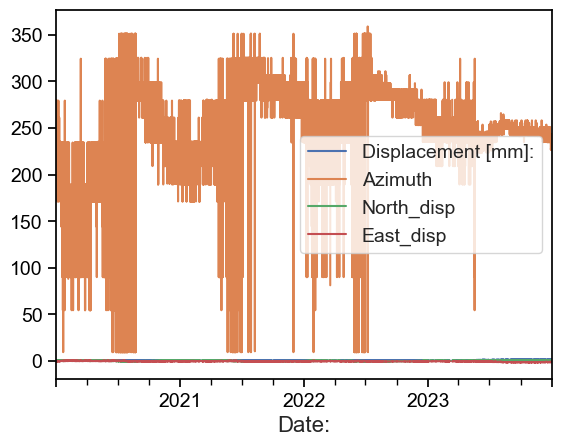

In [24]:
df = JTT1Disp_sub.copy()
moduleMask = df['Module ID:'].isin([110])
df = sub_sample_df_old(file, moduleMask)
df.plot()
np.nanmedian(df['Azimuth'])

# lots of noise in azimuth readings seems like

81.0273733851036

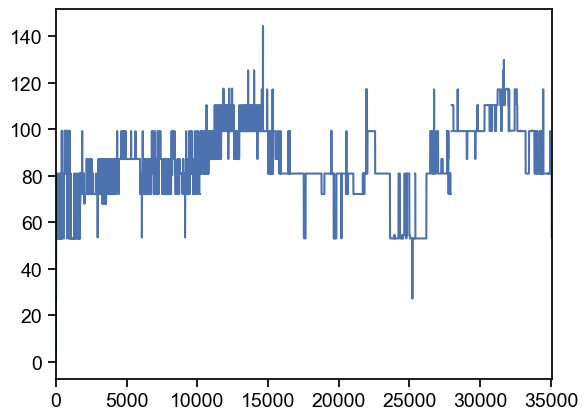

In [152]:
from scipy.signal import medfilt
test = medfilt(df['Azimuth'], kernel_size=25*7)
plt.plot(test)
np.nanmedian(test) # df['Azimuth']

In [202]:
file = JTT1Disp_sub.copy()

df = file.copy()
moduleMask = df['Module ID:'].isin([74])
df = sub_sample_df_old(file, moduleMask)
df.tail()

,Displacement [mm]:,Azimuth,North_disp,East_disp
Date:,,,,
2024-02-21 21:00:00,53.5496,264.577927,-5.06,-53.31
2024-02-21 22:00:00,53.5496,264.577927,-5.06,-53.31
2024-02-21 23:00:00,53.5496,264.577927,-5.06,-53.31
2024-02-22 00:00:00,53.5496,264.577927,-5.06,-53.31
2024-02-22 01:00:00,53.5496,264.577927,-5.06,-53.31


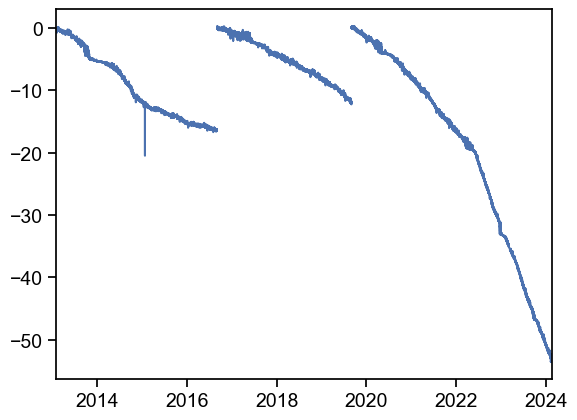

In [204]:
plt.plot(df.loc[:, 'East_disp'])

In [220]:
df.loc[df.last_valid_index(), 'East_disp']

-53.31

In [222]:
angle_degrees = np.degrees(np.arctan2(df.loc[df.last_valid_index(), 'East_disp'], df.loc[df.last_valid_index(), 'North_disp']))
if angle_degrees < 0:
    angle_degrees += 360
angle_degrees

264.57792746982784

In [36]:
def signed_displacement(magnitude, azimuth, positive_direction=90):
    """
    Calculate signed displacement based on a custom positive direction.

    Parameters:
    - magnitude: The displacement magnitude.
    - azimuth: The azimuth angle in degrees.
    - positive_direction: The azimuth angle that should correspond to +1. Defaults to 90 (east).

    Returns:
    - Signed displacement, where the direction is positive toward the specified angle.
    """
    # Convert angles to radians
    azimuth_rad = np.deg2rad(azimuth)
    positive_direction_rad = np.deg2rad(positive_direction)
    
    # Calculate signed displacement
    sign_factor = np.cos(azimuth_rad - positive_direction_rad)
    return magnitude * sign_factor

def combined_displacement(magnitude, azimuth, positive_direction=90):
    """
    Calculate displacement projected onto a specified positive direction.

    Parameters:
    - magnitude: The displacement magnitude.
    - azimuth: The azimuth angle in degrees.
    - positive_direction: The direction to project towards, in degrees.

    Returns:
    - Displacement in the specified direction.
    """
    azimuth_rad = np.deg2rad(azimuth)
    positive_direction_rad = np.deg2rad(positive_direction)

    # North and East component calculations
    north_displacement = magnitude * np.cos(azimuth_rad)
    east_displacement = magnitude * np.sin(azimuth_rad)

    # Project onto the desired positive direction
    displacement = (north_displacement * np.cos(positive_direction_rad) +
                    east_displacement * np.sin(positive_direction_rad))
    return displacement

def total_azi(df):    
    # Calculate overall azimuth
    angle_degrees = np.degrees(np.arctan2(df.loc[df.last_valid_index(), 'East_disp'], df.loc[df.last_valid_index(), 'North_disp'])) # Use last value of disp to calculate total direction of azi
    if angle_degrees < 0:
        angle_degrees += 360
    return angle_degrees

from scipy import stats # for the mode calculation

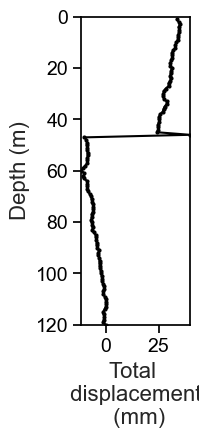

In [46]:
# JTT1

def signed_displacement(magnitude, azimuth, positive_direction=90):
    """
    Calculate signed displacement based on a custom positive direction.

    Parameters:
    - magnitude: The displacement magnitude.
    - azimuth: The azimuth angle in degrees.
    - positive_direction: The azimuth angle that should correspond to +1. Defaults to 90 (east).

    Returns:
    - Signed displacement, where the direction is positive toward the specified angle.
    """
    # Convert angles to radians
    azimuth_rad = np.deg2rad(azimuth)
    positive_direction_rad = np.deg2rad(positive_direction)
    
    # Calculate signed displacement
    sign_factor = np.cos(azimuth_rad - positive_direction_rad)
    return magnitude * sign_factor

def combined_displacement(magnitude, azimuth, positive_direction=90):
    """
    Calculate displacement projected onto a specified positive direction.

    Parameters:
    - magnitude: The displacement magnitude.
    - azimuth: The azimuth angle in degrees.
    - positive_direction: The direction to project towards, in degrees.

    Returns:
    - Displacement in the specified direction.
    """
    azimuth_rad = np.deg2rad(azimuth)
    positive_direction_rad = np.deg2rad(positive_direction)

    # North and East component calculations
    north_displacement = magnitude * np.cos(azimuth_rad)
    east_displacement = magnitude * np.sin(azimuth_rad)

    # Project onto the desired positive direction
    displacement = (north_displacement * np.cos(positive_direction_rad) +
                    east_displacement * np.sin(positive_direction_rad))
    return displacement

def total_azi(df):    
    # Calculate overall azimuth
    angle_degrees = np.degrees(np.arctan2(df.loc[df.last_valid_index(), 'East_disp'], df.loc[df.last_valid_index(), 'North_disp'])) # Use last value of disp to calculate total direction of azi
    if angle_degrees < 0:
        angle_degrees += 360
    return angle_degrees

from scipy import stats # for the mode calculation

file = JTT1Disp_sub.copy()
time_mask = ((file['Date:'] > pd.Timestamp('2020-01-01')) & (file['Date:'] < pd.Timestamp('2024-01-01'))) # used 2020 to 2024 before
file = file[time_mask] # subsetting to timewindow
n = 120 #  # depth
sliding_direction = 261 # Calculated from north east magnitudes

## To check against gps data
# sliding_direction = 90 # east
# sliding_direction = 0 # north

bottom = [] # if modules with gaps
top = (np.linspace(n, 0, num=n+1, endpoint=True)).tolist()
depth = bottom + top
index = (np.linspace(n, 0, num=n+1, endpoint=True)).tolist()

# creating df to see displacement in borehole
modules = file['Module ID:'].unique()

x = []
y = []
z = []
f = []
df = []
for i, d in enumerate(modules):
    df = file.copy()
    moduleMask = df['Module ID:'].isin([d])
    df = sub_sample_df_old(file, moduleMask)
    
    # # fixing zero resets if there are any (not for data from 2020 to 2024..)
    # df2 = df.copy()
    # time_start = '2024-02-22 01:00:00'
    # time_to = df.index < pd.Timestamp(time_start)
    # time_from = df2.index > pd.Timestamp('2024-02-22 02:00:00')
    # df = df[time_to]
    # df2 = df2[time_from]
    # df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
    # gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
    # df2.iloc[:,0] = df2.iloc[:,0] + gap
    # df = pd.concat([df, df2])
    # df2 = df.copy()
    # time_start = '2019-08-31 11:00:00'
    # time_to = df.index < pd.Timestamp(time_start)
    # time_from = df2.index > pd.Timestamp('2019-09-01 08:00:00')
    # df = df[time_to]
    # df2 = df2[time_from]
    # df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
    # gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
    # df2.iloc[:,0] = df2.iloc[:,0] + gap
    # df = pd.concat([df, df2])
    # df2 = df.copy()
    # time_start = '2016-09-01 00:00:00'
    # time_to = df.index < pd.Timestamp(time_start)
    # time_from = df2.index > pd.Timestamp('2016-09-01 19:00:00')
    # df = df[time_to]
    # df2 = df2[time_from]
    # df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
    # gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
    # df2.iloc[:,0] = df2.iloc[:,0] + gap
    # df = pd.concat([df, df2])

# setting zero for chosen time
    if df['Displacement [mm]:'].iloc[0] < 0:
        df['Displacement [mm]:'] = df['Displacement [mm]:']+abs(df['Displacement [mm]:'].iloc[0]) # starting from 0 since chosen start time
    else:
        df['Displacement [mm]:'] = df['Displacement [mm]:']-df['Displacement [mm]:'].iloc[0] # starting from 0 since chosen start time

    ### Ordinary displacement
    # df['Displacement [mm]:'] = df.apply(lambda row: signed_displacement(row['Displacement [mm]:'], row['Azimuth'], positive_direction=sliding_direction), axis=1) # Use this as it works and is simpler
    df['Displacement [mm]:'] = df.apply(lambda row: combined_displacement(row['Displacement [mm]:'], row['Azimuth'], positive_direction=sliding_direction), axis=1)
    mod = i
    mod_depth = depth[i]

    # azi = np.nanmedian(df['Azimuth']) # mean or median give correct azi # 260 for 45-46 depth JTT1, 230 24-26 depth, and 300 48-50 depth JTT2, and 330 at 79-81 depth JTT3.
    azi = total_azi(df)

    disp = df['Displacement [mm]:'].iloc[-1] # total displacement

    x.append(mod_depth)
    y.append(mod)
    z.append(disp)
    f.append(azi)

df = pd.DataFrame(list(zip(x,y,z,f)), columns=['Depth [m]:','Module ID:','Displacement [mm]:','Azimuth (total)'])
df['Cumulated displacement [mm]:'] = df['Displacement [mm]:'].cumsum() # cumulate displacement to see shear zone

#     ### Testing north and east direction
#     mod = i
#     mod_depth = depth[i]
#     dir = 'North_disp'
#     # dir = 'East_disp'
#     disp = df[dir][-1] # total displacement
    
#     x.append(mod_depth)
#     y.append(mod)
#     z.append(disp)

# df = pd.DataFrame(list(zip(x,y,z)), columns=['Depth [m]:','Module ID:','Displacement [mm]:'])
# df['Cumulated displacement [mm]:'] = df['Displacement [mm]:'].cumsum() # cumulate displacement to see shear zone

### Differential calculation
# change = []
# for i in range(0, len(df.index)-1):
#     change.append(df['Displacement [mm]:'][i+1]-df['Displacement [mm]:'][i]) # calculating difference from bottom up
# change.insert(0, np.nan) # add nan to first row as I am doing difference
# df['Differential displacment [mm]:'] = change

# # adjusting entire df to zero based on module 0
# if df.iloc[0,4] < 0:
#     df.iloc[:,4] = df.iloc[:,4]+abs(df.iloc[0,4]) # starting from 0 since chosen start time
# elif df.iloc[0,4] > 0:
#     df.iloc[:,4] = df.iloc[:,4]-df.iloc[0,4] # starting from 0 since chosen start time

df.set_index('Depth [m]:', inplace=True)
df = df.reindex(index, fill_value=np.inf) # adding inf to meters without modules

# plotting
fig, ax = plt.subplots(figsize=figsize)

## disp plot
# ax.plot(df['Differential displacment [mm]:'], df.index, color='black', marker='.', label='')
ax.plot(df['Cumulated displacement [mm]:'], df.index, color='black', marker='.', markersize=markersize, label='')
# ax.plot(df['Displacement [mm]:'], df.index, color='black', marker='.', label='')
# ax.set_title('highest number is closest to the top of borehole')
ax.set_xlabel('Total \n displacement \n (mm)')
ax.set_ylabel('Depth (m)')
ax.set_ylim(0,n)
plt.yticks(np.arange(0, n+1, 20))
# plt.xticks(np.arange(-20, 40+1, 20))

# ### checking azimuth plot
# ax.plot(df['Azimuth (median)'], df.index, color='black', marker='.', markersize=markersize, label='')
# ax.set_xlabel('Azimuth (deg)')
# ax.set_ylabel('Depth (m)')
# ax.set_ylim(0,n)
# plt.yticks(np.arange(0, n+1, 20))
# plt.xticks(np.arange(0, 360+1, 60))

# n = 7  # Keeps every 7th label
# [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
plt.gca().invert_yaxis() # inverting so looking down in borehole


# fig.tight_layout()
plt.show()

# saving
path = 'plots\\'
# save_name = f'{path}KH0218_allmodules_differential.png'
save_name = f'{path}JTT1_allmodules_cumulated'
fig.savefig(save_name+'.eps', dpi=600, bbox_inches='tight', transparent=True)

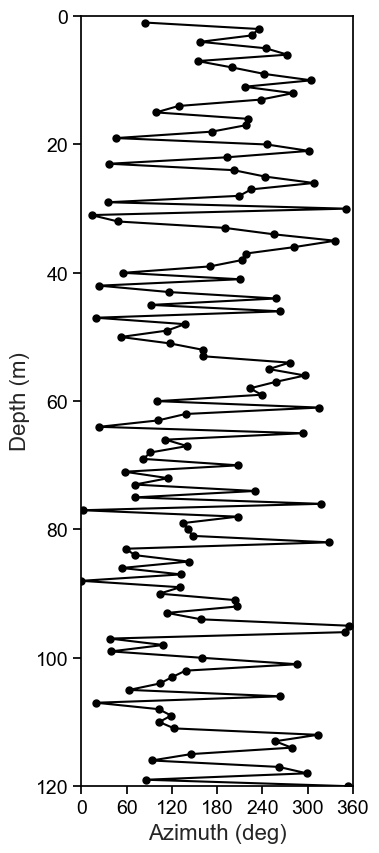

In [225]:
# plotting
fig, ax = plt.subplots(figsize=figsize)

# # disp plot
# # ax.plot(df['Differential displacment [mm]:'], df.index, color='black', marker='.', label='')
# ax.plot(df['Cumulated displacement [mm]:'], df.index, color='black', marker='.', markersize=markersize, label='')
# # ax.plot(df['Displacement [mm]:'], df.index, color='black', marker='.', label='')

# # ax.set_title('highest number is closest to the top of borehole')
# ax.set_xlabel('Total \n displacement \n (mm)')
# ax.set_ylabel('Depth (m)')
# ax.set_ylim(0,n)
# plt.yticks(np.arange(0, n+1, 20))
# plt.gca().invert_yaxis() # inverting so looking down in borehole

### checking azimuth plot
ax.plot(df['Azimuth (total)'], df.index, color='black', marker='.', markersize=markersize, label='')
ax.set_xlabel('Azimuth (deg)')
ax.set_ylabel('Depth (m)')
ax.set_ylim(0,n)
plt.yticks(np.arange(0, n+1, 20))
plt.xticks(np.arange(0, 360+1, 60))
plt.gca().invert_yaxis() # inverting so looking down in borehole
# fig.tight_layout()
plt.show()

In [41]:
check_modules = df.iloc[::-1]
check_modules.iloc[40:51] # meters depth # mode gives correct value for azimuth of shear zone module 74

,Module ID:,Displacement [mm]:,Azimuth (total),Cumulated displacement [mm]:
Depth [m]:,,,,
40.0,80.0,-2.100307,128.157227,45.984191
41.0,79.0,-1.645931,30.963757,48.084498
42.0,78.0,0.851145,293.629378,49.730429
43.0,77.0,1.317195,296.565051,48.879285
44.0,76.0,-3.080160,90.000000,47.562090
45.0,75.0,-22.161128,98.656754,50.642250
46.0,74.0,80.443861,269.800016,72.803378
47.0,73.0,-4.208681,23.629378,-7.640483
48.0,72.0,-0.220322,0.000000,-3.431803


In [43]:
df.tail()

,Module ID:,Displacement [mm]:,Azimuth (total),Cumulated displacement [mm]:
Depth [m]:,,,,
4.0,116.0,3.767367,306.430858,54.892106
3.0,117.0,-0.998873,38.157227,53.893233
2.0,118.0,-4.351284,23.470993,49.541949
1.0,119.0,7.212946,260.713072,56.754894
0.0,inf,inf,inf,inf


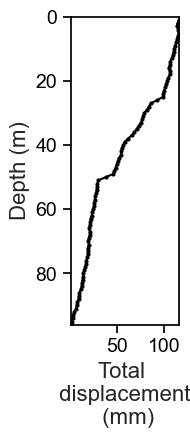

In [48]:
# JTT2
file = JTT2Disp_sub.copy()
time_mask = ((file['Date:'] > pd.Timestamp('2020-01-01')) & (file['Date:'] < pd.Timestamp('2024-01-01')))
file = file[time_mask] # subsetting to timewindow
n = 96 #  # depth
bottom = [] # if modules with gaps
top = (np.linspace(n, 0, num=n+1, endpoint=True)).tolist()
depth = bottom + top
index = (np.linspace(n, 0, num=n+1, endpoint=True)).tolist()

sliding_direction = 275 # the upper goes almost 350 and about lower 120 deg. Do downslope instead

# creating df to see displacement in borehole
modules = file['Module ID:'].unique()

x = []
y = []
z = []
f = []
df = []
for i, d in enumerate(modules):
    df = file.copy()
    moduleMask = df['Module ID:'].isin([d])
    df = sub_sample_df_old(file, moduleMask)

    # # fixing zero resets if there are any (not for data from 2020 to 2024..)
    # df2 = df.copy()
    # time_start = '2024-02-22 01:00:00'
    # time_to = df.index < pd.Timestamp(time_start)
    # time_from = df2.index > pd.Timestamp('2024-02-22 02:00:00')
    # df = df[time_to]
    # df2 = df2[time_from]
    # df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
    # gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
    # df2.iloc[:,0] = df2.iloc[:,0] + gap
    # df = pd.concat([df, df2])
    # df2 = df.copy()
    # time_start = '2019-08-31 11:00:00'
    # time_to = df.index < pd.Timestamp(time_start)
    # time_from = df2.index > pd.Timestamp('2019-09-01 08:00:00')
    # df = df[time_to]
    # df2 = df2[time_from]
    # df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
    # gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
    # df2.iloc[:,0] = df2.iloc[:,0] + gap
    # df = pd.concat([df, df2])
    # df2 = df.copy()
    # time_start = '2016-09-01 00:00:00'
    # time_to = df.index < pd.Timestamp(time_start)
    # time_from = df2.index > pd.Timestamp('2016-09-01 19:00:00')
    # df = df[time_to]
    # df2 = df2[time_from]
    # df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
    # gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
    # df2.iloc[:,0] = df2.iloc[:,0] + gap
    # df = pd.concat([df, df2])

# setting zero for chosen time
    if df['Displacement [mm]:'].iloc[0] < 0:
        df['Displacement [mm]:'] = df['Displacement [mm]:']+abs(df['Displacement [mm]:'].iloc[0]) # starting from 0 since chosen start time
    else:
        df['Displacement [mm]:'] = df['Displacement [mm]:']-df['Displacement [mm]:'].iloc[0] # starting from 0 since chosen start time


    ### Ordinary displacement
    df['Displacement [mm]:'] = df.apply(lambda row: signed_displacement(row['Displacement [mm]:'], row['Azimuth'], positive_direction=sliding_direction), axis=1)
    # df['Displacement [mm]:'] = df.apply(lambda row: combined_displacement(row['Displacement [mm]:'], row['Azimuth'], positive_direction=sliding_direction), axis=1)
    mod = i
    mod_depth = depth[i]

    # azi = np.nanmedian(df['Azimuth']) # mean or median give correct azi # 260 for 45-46 depth JTT1, 230 24-26 depth, and 300 48-50 depth JTT2, and 330 at 79-81 depth JTT3.
    azi = total_azi(df)

    disp = df['Displacement [mm]:'].iloc[-1] # total displacement

    x.append(mod_depth)
    y.append(mod)
    z.append(disp)
    f.append(azi)

df = pd.DataFrame(list(zip(x,y,z,f)), columns=['Depth [m]:','Module ID:','Displacement [mm]:','Azimuth (total)'])
df['Cumulated displacement [mm]:'] = df['Displacement [mm]:'].cumsum() # cumulate displacement to see shear zone

#     ### Testing north and east direction
#     mod = i
#     mod_depth = depth[i]
#     dir = 'North_disp'
#     # dir = 'East_disp'
#     disp = df[dir][-1] # total displacement
    
#     x.append(mod_depth)
#     y.append(mod)
#     z.append(disp)

# df = pd.DataFrame(list(zip(x,y,z)), columns=['Depth [m]:','Module ID:','Displacement [mm]:'])
# df['Cumulated displacement [mm]:'] = df['Displacement [mm]:'].cumsum() # cumulate displacement to see shear zone

### Differential calculation
# change = []
# for i in range(0, len(df.index)-1):
#     change.append(df['Displacement [mm]:'][i+1]-df['Displacement [mm]:'][i]) # calculating difference from bottom up
# change.insert(0, np.nan) # add nan to first row as I am doing difference
# df['Differential displacment [mm]:'] = change

# # adjusting entire df to zero based on module 0
# if df.iloc[0,4] < 0:
#     df.iloc[:,4] = df.iloc[:,4]+abs(df.iloc[0,4]) # starting from 0 since chosen start time
# elif df.iloc[0,4] > 0:
#     df.iloc[:,4] = df.iloc[:,4]-df.iloc[0,4] # starting from 0 since chosen start time

df.set_index('Depth [m]:', inplace=True)
df = df.reindex(index, fill_value=np.inf) # adding inf to meters without modules

# plotting
fig, ax = plt.subplots(figsize=figsize)
# ax.plot(df['Differential displacment [mm]:'], df.index, color='black', marker='.', label='')
ax.plot(df['Cumulated displacement [mm]:'], df.index, color='black', marker='.', markersize=markersize, label='')
# ax.plot(df['Displacement [mm]:'], df.index, color='black', marker='.', label='')

# ax.set_title('highest number is closest to the top of borehole')
ax.set_xlabel('Total \n displacement \n (mm)')
ax.set_ylabel('Depth (m)')
ax.set_ylim(0,n)
plt.yticks(np.arange(0, n+1, 20))

# n = 7  # Keeps every 7th label
# [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
plt.gca().invert_yaxis() # inverting so looking down in borehole


# fig.tight_layout()
plt.show()

# saving
path = 'plots\\'
# save_name = f'{path}KH0218_allmodules_differential.png'
save_name = f'{path}JTT2_allmodules_cumulated'
fig.savefig(save_name+'.eps', dpi=600, bbox_inches='tight', transparent=True)

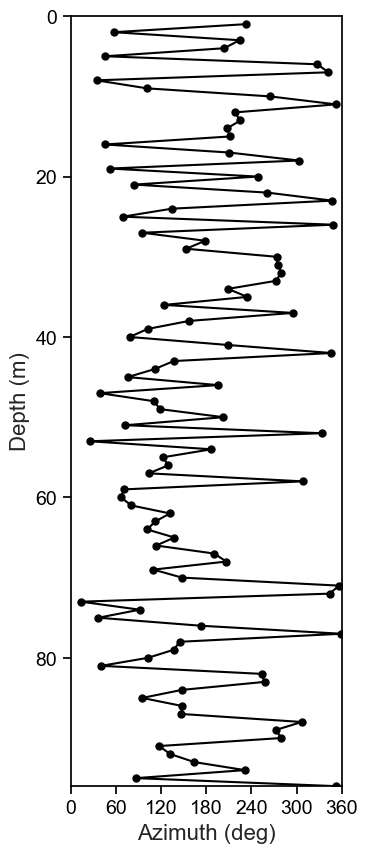

In [187]:
# plotting
fig, ax = plt.subplots(figsize=figsize)

# # disp plot
# # ax.plot(df['Differential displacment [mm]:'], df.index, color='black', marker='.', label='')
# ax.plot(df['Cumulated displacement [mm]:'], df.index, color='black', marker='.', markersize=markersize, label='')
# # ax.plot(df['Displacement [mm]:'], df.index, color='black', marker='.', label='')

# # ax.set_title('highest number is closest to the top of borehole')
# ax.set_xlabel('Total \n displacement \n (mm)')
# ax.set_ylabel('Depth (m)')
# ax.set_ylim(0,n)
# plt.yticks(np.arange(0, n+1, 20))
# plt.gca().invert_yaxis() # inverting so looking down in borehole

### checking azimuth plot
ax.plot(df['Azimuth (total)'], df.index, color='black', marker='.', markersize=markersize, label='')
ax.set_xlabel('Azimuth (deg)')
ax.set_ylabel('Depth (m)')
ax.set_ylim(0,n)
plt.yticks(np.arange(0, n+1, 20))
plt.xticks(np.arange(0, 360+1, 60))
plt.gca().invert_yaxis() # inverting so looking down in borehole
# fig.tight_layout()
plt.show()

In [45]:
check_modules = df.iloc[::-1]
check_modules.iloc[20:30] # meters depth

,Module ID:,Displacement [mm]:,Azimuth (total),Cumulated displacement [mm]:
Depth [m]:,,,,
20.0,76.0,1.152876,207.589606,118.932632
21.0,75.0,1.283759,205.383146,117.779756
22.0,74.0,1.462428,230.988148,116.495997
23.0,73.0,0.932711,208.072487,115.033569
24.0,72.0,0.555430,191.788183,114.100858
25.0,71.0,6.313088,225.207142,113.545427
26.0,70.0,7.263212,227.765945,107.232339
27.0,69.0,2.481685,218.421491,99.969127
28.0,68.0,2.161657,215.758288,97.487441


In [47]:
df.tail()

,Module ID:,Displacement [mm]:,Azimuth (total),Cumulated displacement [mm]:
Depth [m]:,,,,
4.0,92.0,-1.217502,178.854237,97.466394
3.0,93.0,-2.690568,139.217283,94.775826
2.0,94.0,0.532657,119.931512,95.308483
1.0,95.0,-0.343871,198.970408,94.964612
0.0,inf,inf,inf,inf


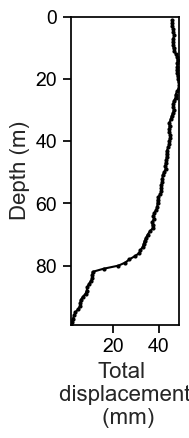

In [49]:
# JTT3
file = JTT3Disp_sub.copy()
time_mask = ((file['Date:'] > pd.Timestamp('2020-01-01')) & (file['Date:'] < pd.Timestamp('2024-01-01')))
file = file[time_mask] # subsetting to timewindow
n = 99 #  # depth
bottom = [] # if modules with gaps
top = (np.linspace(n, 0, num=n+1, endpoint=True)).tolist()
depth = bottom + top
index = (np.linspace(n, 0, num=n+1, endpoint=True)).tolist()

sliding_direction = 359 

# creating df to see displacement in borehole
modules = file['Module ID:'].unique()

x = []
y = []
z = []
f = []
df = []
for i, d in enumerate(modules):
    df = file.copy()
    moduleMask = df['Module ID:'].isin([d])
    df = sub_sample_df_old(file, moduleMask)
    # # fixing zero resets if there are any (not for data from 2020 to 2024..)
    # df2 = df.copy()
    # time_start = '2024-03-13 01:00:00'
    # time_to = df.index < pd.Timestamp(time_start)
    # time_from = df2.index > pd.Timestamp('2024-03-13 02:00:00')
    # df = df[time_to]
    # df2 = df2[time_from]
    # df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
    # gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
    # df2.iloc[:,0] = df2.iloc[:,0] + gap
    # df = pd.concat([df, df2])
    
    # df2 = df.copy()
    # time_start = '2019-08-31 11:00:00'
    # time_to = df.index < pd.Timestamp(time_start)
    # time_from = df2.index > pd.Timestamp('2019-09-01 08:00:00')
    # df = df[time_to]
    # df2 = df2[time_from]
    # df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
    # gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
    # df2.iloc[:,0] = df2.iloc[:,0] + gap
    # df = pd.concat([df, df2])
    
    # df2 = df.copy()
    # time_start = '2016-08-23 06:00:00' # was a lot of missing data at this gap
    # time_to = df.index < pd.Timestamp(time_start)
    # time_from = df2.index > pd.Timestamp('2016-09-01 19:00:00')
    # df = df[time_to]
    # df2 = df2[time_from]
    # df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
    # gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
    # df2.iloc[:,0] = df2.iloc[:,0] + gap
    # df = pd.concat([df, df2])


# setting zero for chosen time
    if df['Displacement [mm]:'].iloc[0] < 0:
        df['Displacement [mm]:'] = df['Displacement [mm]:']+abs(df['Displacement [mm]:'].iloc[0]) # starting from 0 since chosen start time
    else:
        df['Displacement [mm]:'] = df['Displacement [mm]:']-df['Displacement [mm]:'].iloc[0] # starting from 0 since chosen start time


 ### Ordinary displacement
    df['Displacement [mm]:'] = df.apply(lambda row: signed_displacement(row['Displacement [mm]:'], row['Azimuth'], positive_direction=sliding_direction), axis=1)
    # df['Displacement [mm]:'] = df.apply(lambda row: combined_displacement(row['Displacement [mm]:'], row['Azimuth'], positive_direction=sliding_direction), axis=1)
    mod = i
    mod_depth = depth[i]

    # azi = np.nanmedian(df['Azimuth']) # mean or median give correct azi # 260 for 45-46 depth JTT1, 230 24-26 depth, and 300 48-50 depth JTT2, and 330 at 79-81 depth JTT3.
    azi = total_azi(df)

    disp = df['Displacement [mm]:'].iloc[-1] # total displacement

    x.append(mod_depth)
    y.append(mod)
    z.append(disp)
    f.append(azi)

df = pd.DataFrame(list(zip(x,y,z,f)), columns=['Depth [m]:','Module ID:','Displacement [mm]:','Azimuth (total)'])
df['Cumulated displacement [mm]:'] = df['Displacement [mm]:'].cumsum() # cumulate displacement to see shear zone

#     ### Testing north and east direction
#     mod = i
#     mod_depth = depth[i]
#     dir = 'North_disp'
#     # dir = 'East_disp'
#     disp = df[dir][-1] # total displacement
    
#     x.append(mod_depth)
#     y.append(mod)
#     z.append(disp)

# df = pd.DataFrame(list(zip(x,y,z)), columns=['Depth [m]:','Module ID:','Displacement [mm]:'])
# df['Cumulated displacement [mm]:'] = df['Displacement [mm]:'].cumsum() # cumulate displacement to see shear zone

### Differential calculation
# change = []
# for i in range(0, len(df.index)-1):
#     change.append(df['Displacement [mm]:'][i+1]-df['Displacement [mm]:'][i]) # calculating difference from bottom up
# change.insert(0, np.nan) # add nan to first row as I am doing difference
# df['Differential displacment [mm]:'] = change

# # adjusting entire df to zero based on module 0
# if df.iloc[0,4] < 0:
#     df.iloc[:,4] = df.iloc[:,4]+abs(df.iloc[0,4]) # starting from 0 since chosen start time
# elif df.iloc[0,4] > 0:
#     df.iloc[:,4] = df.iloc[:,4]-df.iloc[0,4] # starting from 0 since chosen start time

df.set_index('Depth [m]:', inplace=True)
df = df.reindex(index, fill_value=np.inf) # adding inf to meters without modules

# plotting
fig, ax = plt.subplots(figsize=figsize)
# ax.plot(df['Differential displacment [mm]:'], df.index, color='black', marker='.', label='')
ax.plot(df['Cumulated displacement [mm]:'], df.index, color='black', marker='.', markersize=markersize, label='')
# ax.plot(df['Displacement [mm]:'], df.index, color='black', marker='.', label='')

# ax.set_title('highest number is closest to the top of borehole')
ax.set_xlabel('Total \n displacement \n (mm)')
ax.set_ylabel('Depth (m)')
ax.set_ylim(0,n)
plt.yticks(np.arange(0, n+1, 20))

# n = 7  # Keeps every 7th label
# [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
plt.gca().invert_yaxis() # inverting so looking down in borehole


# fig.tight_layout()
plt.show()

# saving
path = 'plots\\'
# save_name = f'{path}KH0218_allmodules_differential.png'
save_name = f'{path}JTT3_allmodules_cumulated'
fig.savefig(save_name+'.eps', dpi=600, bbox_inches='tight', transparent=True)

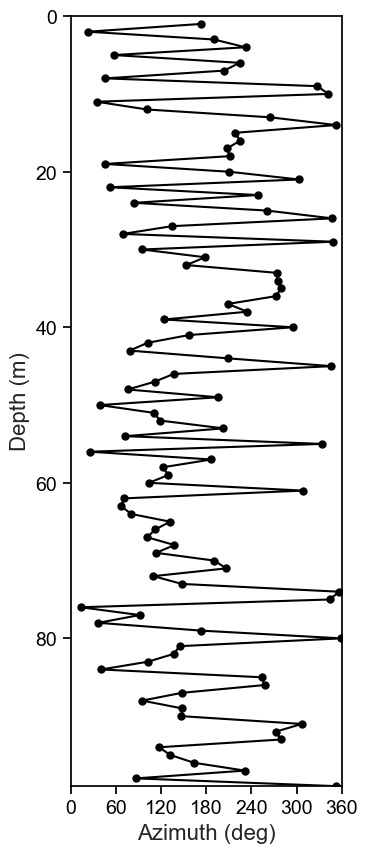

In [191]:
# plotting
fig, ax = plt.subplots(figsize=figsize)

# # disp plot
# # ax.plot(df['Differential displacment [mm]:'], df.index, color='black', marker='.', label='')
# ax.plot(df['Cumulated displacement [mm]:'], df.index, color='black', marker='.', markersize=markersize, label='')
# # ax.plot(df['Displacement [mm]:'], df.index, color='black', marker='.', label='')

# # ax.set_title('highest number is closest to the top of borehole')
# ax.set_xlabel('Total \n displacement \n (mm)')
# ax.set_ylabel('Depth (m)')
# ax.set_ylim(0,n)
# plt.yticks(np.arange(0, n+1, 20))
# plt.gca().invert_yaxis() # inverting so looking down in borehole

### checking azimuth plot
ax.plot(df['Azimuth (total)'], df.index, color='black', marker='.', markersize=markersize, label='')
ax.set_xlabel('Azimuth (deg)')
ax.set_ylabel('Depth (m)')
ax.set_ylim(0,n)
plt.yticks(np.arange(0, n+1, 20))
plt.xticks(np.arange(0, 360+1, 60))
plt.gca().invert_yaxis() # inverting so looking down in borehole
# fig.tight_layout()
plt.show()

In [56]:
check_modules = df.iloc[::-1]
check_modules.iloc[70:90] # meters depth

,Module ID:,Displacement [mm]:,Azimuth (total),Cumulated displacement [mm]:
Depth [m]:,,,,
70.0,29.0,0.683277,16.389540,35.131595
71.0,28.0,0.654737,306.977596,34.448318
72.0,27.0,0.421728,289.078695,33.793581
73.0,26.0,0.431218,295.301379,33.371852
74.0,25.0,1.001930,340.096250,32.940634
75.0,24.0,0.550341,300.089686,31.938704
76.0,23.0,2.023657,334.786504,31.388363
77.0,22.0,2.350197,308.809071,29.364706
78.0,21.0,1.744580,292.551864,27.014509


In [20]:
df.tail()

,Module ID:,Displacement [mm]:,Azimuth (total),Cumulated displacement [mm]:
Depth [m]:,,,,
4.0,95.0,-2.172730,154.653824,164.901654
3.0,96.0,-11.096037,159.021399,153.805618
2.0,97.0,-2.972924,110.480357,150.832693
1.0,98.0,-1.681382,99.001755,149.151312
0.0,inf,inf,inf,inf


In [27]:
# meadian disp of all boreholes from 2020-01-01 to now
np.median([122.69, 200.63, 87.19])

122.69

In [ ]:
file = KH0306Disp_sub.copy()
time_mask = ((file['Date:'] > pd.Timestamp('2022-07-01')) & (file['Date:'] < pd.Timestamp('2023-02-28'))) # set to date of latest installation and end of time series of the other plots..
file = file[time_mask] # subsetting to timewindow
file = file.sort_values(by=['Module ID:'], ascending=True)
file.reset_index(drop=True,inplace=True)
n = 120 # depth
bottom = [] # if modules with gaps
top = (np.linspace(n, 0, num=n+1, endpoint=True)).tolist()
depth = bottom + top
index = (np.linspace(n, 0, num=n+1, endpoint=True)).tolist()

# creating df to see displacement in borehole
modules = file['Module ID:'].unique()

x = []
y = []
z = []
df = []
for i,d in enumerate(modules):
    df = file.copy()
    moduleMask = df['Module ID:'].isin([i])
    df = sub_sample_df_old(file, moduleMask)
    df = df.resample('1D').median() # perhaps make it more reliable?

# setting zero for chosen time
    if df.iloc[0,0] < 0:
        df.iloc[:,0] = df.iloc[:,0]+abs(df.iloc[0,0]) # starting from 0 since chosen start time
    elif df.iloc[0,0] > 0:
        df.iloc[:,0] = df.iloc[:,0]-df.iloc[0,0] # starting from 0 since chosen start time
    mod = d
    mod_depth = depth[i]
    disp = df.iloc[-1,0] # total displacement
    x.append(mod_depth)
    y.append(mod)
    z.append(disp)

df = pd.DataFrame(list(zip(x,y,z)), columns=['Depth [m]:','Module ID:','Displacement [mm]:'])

change = []
for i in range(0, len(df.index)-1):
    change.append(df['Displacement [mm]:'][i+1]-df['Displacement [mm]:'][i]) # calculating difference from bottom up
change.insert(0, np.nan) # add nan to first row as I am doing difference
df['Differential displacment [mm]:'] = change
df['Cumulated displacement [mm]:'] = df['Displacement [mm]:'].cumsum() # cumulate displacement to see shear zone

# adjusting entire df to zero based on module 0
if df.iloc[0,4] < 0:
    df.iloc[:,4] = df.iloc[:,4]+abs(df.iloc[0,4]) # starting from 0 since chosen start time
elif df.iloc[0,4] > 0:
    df.iloc[:,4] = df.iloc[:,4]-df.iloc[0,4] # starting from 0 since chosen start time

df.set_index('Depth [m]:', inplace=True)
df = df.reindex(index, fill_value=np.inf) # adding inf to meters without modules

# plotting
fig, ax = plt.subplots(figsize=figsize)
# ax.plot(df['Differential displacment [mm]:'], df.index, color='black', marker='.', label='')
ax.plot(df['Cumulated displacement [mm]:'], df.index, color='black', marker='.', markersize=markersize, label='')
# ax.plot(df['Displacement [mm]:'], df.index, color='black', marker='.', label='')

# ax.set_title('highest number is closest to the top of borehole')
ax.set_xlabel('Total \n displacement \n (mm)')
ax.set_ylabel('Depth (m)')
ax.set_ylim(0,n)
plt.yticks(np.arange(0, n+1, 20))
plt.gca().invert_yaxis() # inverting so looking down in borehole

plt.show()

# saving
path = 'plots\\'
# save_name = f'{path}KH0118_allmodules_differential.png'
save_name = f'{path}KH0306_allmodules_cumulated'
fig.savefig(save_name+'.eps', dpi=600, bbox_inches='tight', transparent=True)

#### Summed modules over shear zone

In [ ]:
KH0306Disp.tail()

In [ ]:
# # CUMULATE MODULES IN SHEAR ZONE    ! NEEDS TO BE DONE! WHEN THIS IS DONE THE WHOLE FIXING NOISE NEEDS TO BE RE-DONE FOR BIG AND MINOR JUMPS !

# Make sure I still am able to just switch back to having one module!!

# # KH0206
# moduleMask = KH0206Disp['Module ID:'].isin([85])
# KH0206Disp_sub_1 = sub_sample_df_old(KH0206Disp, moduleMask)
# moduleMask = KH0206Disp['Module ID:'].isin([86])
# KH0206Disp_sub_2 = sub_sample_df_old(KH0206Disp, moduleMask)
# moduleMask = KH0206Disp['Module ID:'].isin([87])
# KH0206Disp_sub_3 = sub_sample_df_old(KH0206Disp, moduleMask)

# # KH0306
# moduleMask = KH0306Disp['Module ID:'].isin([119])
# KH0306Disp_sub_1 = sub_sample_df_old(KH0306Disp, moduleMask)
# moduleMask = KH0306Disp['Module ID:'].isin([118])
# KH0306Disp_sub_2 = sub_sample_df_old(KH0306Disp, moduleMask)
# moduleMask = KH0306Disp['Module ID:'].isin([31])
# KH0306Disp_sub_3 = sub_sample_df_old(KH0306Disp, moduleMask)
# moduleMask = KH0306Disp['Module ID:'].isin([30])
# KH0306Disp_sub_4 = sub_sample_df_old(KH0306Disp, moduleMask)
# moduleMask = KH0306Disp['Module ID:'].isin([29])
# KH0306Disp_sub_5 = sub_sample_df_old(KH0306Disp, moduleMask)

# # KH0112 upper
# moduleMask = KH0112Disp['Module ID:'].isin([124])
# KH0112Disp_sub_1 = sub_sample_df_old(KH0112Disp, moduleMask)
# moduleMask = KH0112Disp['Module ID:'].isin([125])
# KH0112Disp_sub_2 = sub_sample_df_old(KH0112Disp, moduleMask)
# moduleMask = KH0112Disp['Module ID:'].isin([126])
# KH0112Disp_sub_3 = sub_sample_df_old(KH0112Disp, moduleMask)

# # KH0112 lower
# moduleMask = KH0112Disp['Module ID:'].isin([86])
# KH0112Disp_sub_1 = sub_sample_df_old(KH0112Disp, moduleMask)
# moduleMask = KH0112Disp['Module ID:'].isin([87])
# KH0112Disp_sub_2 = sub_sample_df_old(KH0112Disp, moduleMask)
# moduleMask = KH0112Disp['Module ID:'].isin([88])
# KH0112Disp_sub_3 = sub_sample_df_old(KH0112Disp, moduleMask)

# # KH0117
# moduleMask = KH0117Disp['Module ID:'].isin([64])
# KH0117Disp_sub_1 = sub_sample_df_old(KH0117Disp, moduleMask)
# moduleMask = KH0117Disp['Module ID:'].isin([65])
# KH0117Disp_sub_2 = sub_sample_df_old(KH0117Disp, moduleMask)
# moduleMask = KH0117Disp['Module ID:'].isin([66])
# KH0117Disp_sub_3 = sub_sample_df_old(KH0117Disp, moduleMask)
# moduleMask = KH0117Disp['Module ID:'].isin([67])
# KH0117Disp_sub_4 = sub_sample_df_old(KH0117Disp, moduleMask)
# moduleMask = KH0117Disp['Module ID:'].isin([68])
# KH0117Disp_sub_5 = sub_sample_df_old(KH0117Disp, moduleMask)
# moduleMask = KH0117Disp['Module ID:'].isin([69])
# KH0117Disp_sub_6 = sub_sample_df_old(KH0117Disp, moduleMask)


# # KH0217 Upper
# moduleMask = KH0217Disp['Module ID:'].isin([96])
# KH0217DispUpperZone_sub_1 = sub_sample_df_old(KH0217Disp, moduleMask)
# moduleMask = KH0217Disp['Module ID:'].isin([97])
# KH0217DispUpperZone_sub_2 = sub_sample_df_old(KH0217Disp, moduleMask)
# moduleMask = KH0217Disp['Module ID:'].isin([98])
# KH0217DispUpperZone_sub_3 = sub_sample_df_old(KH0217Disp, moduleMask)
# moduleMask = KH0217Disp['Module ID:'].isin([99])
# KH0217DispUpperZone_sub_4 = sub_sample_df_old(KH0217Disp, moduleMask)

# # KH0217 Lower
# moduleMask = KH0217Disp['Module ID:'].isin([60])
# KH0217DispLowerZone_sub_1 = sub_sample_df_old(KH0217Disp, moduleMask)
# moduleMask = KH0217Disp['Module ID:'].isin([61])
# KH0217DispLowerZone_sub_2 = sub_sample_df_old(KH0217Disp, moduleMask)
# moduleMask = KH0217Disp['Module ID:'].isin([62])
# KH0217DispLowerZone_sub_3 = sub_sample_df_old(KH0217Disp, moduleMask)
# moduleMask = KH0217Disp['Module ID:'].isin([63])
# KH0217DispLowerZone_sub_4 = sub_sample_df_old(KH0217Disp, moduleMask)

# # KH0118
# moduleMask = KH0118Disp_sub['Module ID:'].isin([69])
# KH0118Disp_sub_1 = sub_sample_df_old(KH0118Disp_sub , moduleMask)
# moduleMask = KH0118Disp_sub['Module ID:'].isin([70])
# KH0118Disp_sub_2 = sub_sample_df_old(KH0118Disp_sub , moduleMask) 
# moduleMask = KH0118Disp_sub['Module ID:'].isin([71])  
# KH0118Disp_sub_3 = sub_sample_df_old(KH0118Disp_sub , moduleMask)  # The normal data
# moduleMask = KH0118Disp_sub['Module ID:'].isin([72])
# KH0118Disp_sub_4 = sub_sample_df_old(KH0118Disp_sub , moduleMask)
# moduleMask = KH0118Disp_sub['Module ID:'].isin([73])
# KH0118Disp_sub_5 = sub_sample_df_old(KH0118Disp_sub , moduleMask)

# KH0218
# time window
file = KH0218Disp_sub
time_mask = ((file['Date:'] > file['Date:'][0]) & (file['Date:'] < pd.Timestamp('2022-01-10 00:00:00')))
file = file[time_mask]
KH0218Disp_sub = file

moduleMask = KH0218Disp_sub['Module ID:'].isin([136])    # Outside of zone
KH0218Disp_sub_1 = sub_sample_df_old(KH0218Disp_sub , moduleMask)
moduleMask = KH0218Disp_sub['Module ID:'].isin([137])    # above normal data
KH0218Disp_sub_2 = sub_sample_df_old(KH0218Disp_sub , moduleMask)
moduleMask = KH0218Disp_sub['Module ID:'].isin([138])    # The normal data
KH0218Disp_sub_3 = sub_sample_df_old(KH0218Disp_sub , moduleMask)
moduleMask = KH0218Disp_sub['Module ID:'].isin([139])    # below normal data
KH0218Disp_sub_4 = sub_sample_df_old(KH0218Disp_sub , moduleMask)
moduleMask = KH0218Disp_sub['Module ID:'].isin([140])    # Outside of zone
KH0218Disp_sub_5 = sub_sample_df_old(KH0218Disp_sub , moduleMask)


In [ ]:
# # PLOTTING MODULES TO CHECK THE CUMULATED PLOTS

fig, ax = plt.subplots(figsize=((10), (10)))

# KH0306
file1 = KH0306Disp_sub_1
file2 = KH0306Disp_sub_2
file3 = KH0306Disp_sub_3
file4 = KH0306Disp_sub_4
file5 = KH0306Disp_sub_5

file1 = file1.replace(np.nan,np.inf)
file2 = file2.replace(np.nan,np.inf)
file3 = file3.replace(np.nan,np.inf)
file4 = file4.replace(np.nan,np.inf)
file5 = file5.replace(np.nan,np.inf)
# file6 = file6.replace(np.nan,np.inf)
sns.lineplot(x=file1.index, y=file1['Displacement [mm]:'], color='darkorange', ax = ax, label='lower upper')
sns.lineplot(x=file2.index, y=file2['Displacement [mm]:'], color='dodgerblue', ax = ax, label='upper center')
sns.lineplot(x=file3.index, y=file3['Displacement [mm]:'], color='magenta', ax = ax, label='upper upper')
sns.lineplot(x=file4.index, y=file4['Displacement [mm]:'], color='forestgreen', ax = ax, label='lower lower')
sns.lineplot(x=file5.index, y=file5['Displacement [mm]:'], color='black', ax = ax, label='lower center')
# sns.lineplot(x=file6.index, y=file6['Displacement [mm]:'], color='red', ax = ax, label='lower upper zone')


# KH0118Disp_cum = KH0118Disp_cum.resample('1h').median().replace(np.nan,np.inf)
# sns.lineplot(x=KH0118Disp_cum.index, y=KH0118Disp_cum.values, color='darkviolet', ax = ax, label='Cumulated shear zone')

# ax.set_title('highest number is closest to the top of borehole')
ax.set_xlabel('Years')
ax.set_ylabel('Displacement (mm)')

# generate legend
lines, labels = ax.get_legend_handles_labels()
lines = lines[::-1]
labels = labels[::-1]
ax.legend(lines, labels, loc='upper left')

# # removing tick labels from the xaxis
# n = 2  # keeps every n row
# [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

# ax.set_xlim([pd.Timestamp('01-01-2022'),pd.Timestamp('01-01-2023')])
# ax.set_ylim([0,25])
fig.tight_layout()
plt.show()

# # saving
# path = 'plots\\'
# save_name = f'{path}KH0118_additional_modules.png'
# fig.savefig(save_name, dpi=300, bbox_inches='tight')

In [ ]:
time_mask = ((file1.index > pd.Timestamp('2022-05-01 00:00:00')) & (file1.index < pd.Timestamp('2022-10-01 00:00:00')))
file = file1[time_mask]
file.plot()

In [ ]:
# # PLOTTING MODULES TO CHECK THE CUMULATED PLOTS

fig, ax = plt.subplots(figsize=((10), (10)))

# file1 = KH0118Disp_sub_1
# file2 = KH0118Disp_sub_2
# file3 = KH0118Disp_sub_3
# file4 = KH0118Disp_sub_4
# file5 = KH0118Disp_sub_5

# KH0112
file1 = KH0112Disp_sub_1
df = file1.copy()
# fixing zero resets
df2 = df.copy()
time_start = '2021-04-22 02:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp(time_start)
df = df[time_to]
df2 = df2[time_from]
df2 = df2[5:]
gap = np.nanmedian(df['Displacement [mm]:'][-24:])+np.nanmedian(df2['Displacement [mm]:'][:24]) # adding 24 hour mean to the gap
df2['Displacement [mm]:'] = df2['Displacement [mm]:'] + gap
file1 = pd.concat([df, df2])

file2 = KH0112Disp_sub_2
df = file2.copy()
# fixing zero resets
df2 = df.copy()
time_start = '2021-04-22 02:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp(time_start)
df = df[time_to]
df2 = df2[time_from]
df2 = df2[5:]
gap = np.nanmedian(df['Displacement [mm]:'][-24:])+np.nanmedian(df2['Displacement [mm]:'][:24]) # adding 24 hour mean to the gap
df2['Displacement [mm]:'] = df2['Displacement [mm]:'] + gap
file2 = pd.concat([df, df2])

file3 = KH0112Disp_sub_3
df = file3.copy()
# fixing zero resets
df2 = df.copy()
time_start = '2021-04-22 02:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp(time_start)
df = df[time_to]
df2 = df2[time_from]
df2 = df2[5:]
gap = np.nanmedian(df['Displacement [mm]:'][-24:])+np.nanmedian(df2['Displacement [mm]:'][:24]) # adding 24 hour mean to the gap
df2['Displacement [mm]:'] = df2['Displacement [mm]:'] + gap
file3 = pd.concat([df, df2])




file1 = file1.replace(np.nan,np.inf)
file2 = file2.replace(np.nan,np.inf)
file3 = file3.replace(np.nan,np.inf)
file4 = file4.replace(np.nan,np.inf)
file5 = file5.replace(np.nan,np.inf)
file6 = file6.replace(np.nan,np.inf)
sns.lineplot(x=file1.index, y=file1['Displacement [mm]:'], color='darkorange', ax = ax, label='lower upper')
sns.lineplot(x=file2.index, y=file2['Displacement [mm]:'], color='dodgerblue', ax = ax, label='upper center')
sns.lineplot(x=file3.index, y=file3['Displacement [mm]:'], color='magenta', ax = ax, label='upper upper')
# sns.lineplot(x=file4.index, y=file4['Displacement [mm]:'], color='forestgreen', ax = ax, label='lower lower')
# sns.lineplot(x=file5.index, y=file5['Displacement [mm]:'], color='black', ax = ax, label='lower center')
# sns.lineplot(x=file6.index, y=file6['Displacement [mm]:'], color='red', ax = ax, label='lower upper zone')


# KH0118Disp_cum = KH0118Disp_cum.resample('1h').median().replace(np.nan,np.inf)
# sns.lineplot(x=KH0118Disp_cum.index, y=KH0118Disp_cum.values, color='darkviolet', ax = ax, label='Cumulated shear zone')

# ax.set_title('highest number is closest to the top of borehole')
ax.set_xlabel('Years')
ax.set_ylabel('Displacement (mm)')

# generate legend
lines, labels = ax.get_legend_handles_labels()
lines = lines[::-1]
labels = labels[::-1]
ax.legend(lines, labels, loc='upper left')

# removing tick labels from the xaxis
n = 2  # keeps every n row
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

fig.tight_layout()
plt.show()

# # saving
# path = 'plots\\'
# save_name = f'{path}KH0118_additional_modules.png'
# fig.savefig(save_name, dpi=300, bbox_inches='tight')

In [ ]:
# # PLOTTING MODULES THAT IS GOING TO BE CUMULATED

fig, ax = plt.subplots(figsize=((10), (10)))

file1 = KH0118Disp_sub_1
file2 = KH0118Disp_sub_2
file3 = KH0118Disp_sub_3
file4 = KH0118Disp_sub_4
file5 = KH0118Disp_sub_5

file1 = file1.replace(np.nan,np.inf)
file2 = file2.replace(np.nan,np.inf)
file3 = file3.replace(np.nan,np.inf)
file4 = file4.replace(np.nan,np.inf)
file5 = file5.replace(np.nan,np.inf)
sns.lineplot(x=file1.index, y=file1['Displacement [mm]:'], color='darkorange', ax = ax, label='Outside of shear zone')
sns.lineplot(x=file2.index, y=file2['Displacement [mm]:'], color='dodgerblue', ax = ax, label='1 meter below shear zone')
sns.lineplot(x=file3.index, y=file3['Displacement [mm]:'], color='magenta', ax = ax, label='center shear zone')
sns.lineplot(x=file4.index, y=file4['Displacement [mm]:'], color='forestgreen', ax = ax, label='1 meter above shear zone')
sns.lineplot(x=file5.index, y=file5['Displacement [mm]:'], color='black', ax = ax, label='Outside of shear zone')

# KH0118Disp_cum = KH0118Disp_cum.resample('1h').median().replace(np.nan,np.inf)
# sns.lineplot(x=KH0118Disp_cum.index, y=KH0118Disp_cum.values, color='darkviolet', ax = ax, label='Cumulated shear zone')

# ax.set_title('highest number is closest to the top of borehole')
ax.set_xlabel('Years')
ax.set_ylabel('Displacement (mm)')

# generate legend
lines, labels = ax.get_legend_handles_labels()
lines = lines[::-1]
labels = labels[::-1]
ax.legend(lines, labels, loc='upper left')

# removing tick labels from the xaxis
n = 2  # keeps every n row
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

fig.tight_layout()
plt.show()

# saving
path = 'plots\\'
save_name = f'{path}KH0118_additional_modules.png'
fig.savefig(save_name, dpi=300, bbox_inches='tight')

In [ ]:
file1.head()

In [ ]:
# # PLOTTING MODULES THAT IS GOING TO BE CUMULATED

fig, ax = plt.subplots(figsize=((5), (5)))

file1 = KH0218Disp_sub_1
file2 = KH0218Disp_sub_2
file3 = KH0218Disp_sub_3
file4 = KH0218Disp_sub_4
file5 = KH0218Disp_sub_5
# file4 = KH0217DispLowerZone_sub_4
# # file5 = KH0117Disp_sub_5
# # file6 = KH0117Disp_sub_6

file1 = file1.resample('1h').median().replace(np.nan,np.inf)
file2 = file2.resample('1h').median().replace(np.nan,np.inf)
file3 = file3.resample('1h').median().replace(np.nan,np.inf)
file4 = file4.resample('1h').median().replace(np.nan,np.inf)
file5 = file5.resample('1h').median().replace(np.nan,np.inf)
sns.lineplot(x=file1.index, y=file1['Displacement [mm]:'], color='darkorange', ax = ax, label='Outside of shear zone')
sns.lineplot(x=file2.index, y=file2['Displacement [mm]:'], color='dodgerblue', ax = ax, label='1 m below shear zone')
sns.lineplot(x=file3.index, y=file3['Displacement [mm]:'], color='magenta', ax = ax, label='center shear zone')
sns.lineplot(x=file4.index, y=file4['Displacement [mm]:'], color='forestgreen', ax = ax, label='1 meter above shear zone')
sns.lineplot(x=file5.index, y=file5['Displacement [mm]:'], color='black', ax = ax, label='Outside of shear zone')

# KH0118Disp_cum = KH0118Disp_cum.resample('1h').median().replace(np.nan,np.inf)
# sns.lineplot(x=KH0118Disp_cum.index, y=KH0118Disp_cum.values, color='darkviolet', ax = ax, label='Cumulated shear zone')

# ax.set_title('highest number is closest to the top of borehole')
ax.set_xlabel('Years')
ax.set_ylabel('Displacement (mm)')
ax.set_ylim([-1,4])
ax.set_xlim([pd.Timestamp('2019-11'), pd.Timestamp('2020-01')])

# generate legend
lines, labels = ax.get_legend_handles_labels()
lines = lines[::-1]
labels = labels[::-1]
ax.legend(lines, labels, loc='upper left')

# removing tick labels from the xaxis
n = 4 # keeps every n row
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

fig.tight_layout()
plt.show()

# saving
path = 'plots\\'
save_name = f'{path}KH0218_additional_modules_ISTerre.png'
fig.savefig(save_name, dpi=300, bbox_inches='tight')

In [ ]:
# moduleMask = KH0218Disp_sub['Module ID:'].isin([136])    # Outside of zone
# KH0218Disp_sub_1 = sub_sample_df_old(KH0218Disp_sub , moduleMask)
# moduleMask = KH0218Disp_sub['Module ID:'].isin([137])    # above normal data
# KH0218Disp_sub_2 = sub_sample_df_old(KH0218Disp_sub , moduleMask)
# moduleMask = KH0218Disp_sub['Module ID:'].isin([138])    # The normal data
# KH0218Disp_sub_3 = sub_sample_df_old(KH0218Disp_sub , moduleMask)
# moduleMask = KH0218Disp_sub['Module ID:'].isin([139])    # below normal data
# KH0218Disp_sub_4 = sub_sample_df_old(KH0218Disp_sub , moduleMask)
# moduleMask = KH0218Disp_sub['Module ID:'].isin([140])    # Outside of zone
# KH0218Disp_sub_5 = sub_sample_df_old(KH0218Disp_sub , moduleMask)

In [ ]:
# # PLOTTING MODULES THAT IS GOING TO BE CUMULATED ! with water table!

# ZOOM ON THE

fig, ax = plt.subplots(figsize=((13/2), (7/2))) # making small plot for EGU presentation
ax_y = ax.twinx()

file1 = KH0112Disp_sub_1
file2 = KH0112Disp_sub_2
file3 = KH0112Disp_sub_3
# file4 = KH0218Disp_sub_4
# file5 = KH0218Disp_sub_5
# file4 = KH0217DispLowerZone_sub_4
# # file5 = KH0117Disp_sub_5
# # file6 = KH0117Disp_sub_6

water = KH0112Piez
sns.lineplot(x=water.index, y=water['Water table [m bgl]:'], color='aqua', ax = ax, label='Water table')


file1 = file1.resample('1h').median().replace(np.nan,np.inf)
file2 = file2.resample('1h').median().replace(np.nan,np.inf)
file3 = file3.resample('1h').median().replace(np.nan,np.inf)
# file4 = file4.resample('1h').median().replace(np.nan,np.inf)
# file5 = file5.resample('1h').median().replace(np.nan,np.inf)
# sns.lineplot(x=file1.index, y=file1['Displacement [mm]:'], color='darkorange', ax = ax_y, label='Outside of shear zone')
sns.lineplot(x=file1.index, y=file1['Displacement [mm]:'], color='dodgerblue', ax = ax_y, label='1 m below shear zone')
sns.lineplot(x=file2.index, y=file2['Displacement [mm]:'], color='magenta', ax = ax_y, label='center shear zone')
sns.lineplot(x=file3.index, y=file3['Displacement [mm]:'], color='forestgreen', ax = ax_y, label='1 meter above shear zone')
# sns.lineplot(x=file5.index, y=file5['Displacement [mm]:'], color='black', ax = ax_y, label='Outside of shear zone')


# file4 = file4.resample('1h').median().replace(np.nan,np.inf)
# # file5 = file5.resample('1h').median().replace(np.nan,np.inf)
# # file6 = file6.resample('1h').median().replace(np.nan,np.inf)
# sns.lineplot(x=file4.index, y=file4['Displacement [mm]:'], color='tab:green', ax = ax, label='4')
# # sns.lineplot(x=file5.index, y=file5['Displacement [mm]:'], color='tab:gray', ax = ax, label='5')
# # sns.lineplot(x=file6.index, y=file6['Displacement [mm]:'], color='tab:brown', ax = ax, label='6')

# ax.set_title('highest number is closest to the top of borehole')
ax.set_xlabel('Years')
ax.set_ylabel('Water table (mbgl)')
ax_y.set_ylabel('Displacement (mm)')

# generate legend
lines, labels = ax.get_legend_handles_labels()
lines = lines[::-1]
labels = labels[::-1]
lines2, labels2 = ax_y.get_legend_handles_labels()
ax.legend([],[], frameon=False) # remove legend for ax
ax_y.legend(lines + lines2, labels + labels2, loc='upper left')

# removing tick labels from the xaxis
n = 2  # keeps every n row
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0] # what is this?

# adjusting gridlines
nticks = 5
ax.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_y.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax_y.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax_y.set_xlim([file1.index[0],file1.index[-1]]) # remove space on each side of x-axis
ax_y.set_ylim([min(ax_y.get_ylim()),max(ax_y.get_ylim())]) # remove space on each side of y-axis

fig.tight_layout()
plt.show()

# saving
path = 'plots\\'
save_name = f'{path}KH0112Lower_additional_modules_water.png'
fig.savefig(save_name, dpi=300, bbox_inches='tight')

In [ ]:
# # PLOTTING MODULES THAT IS GOING TO BE CUMULATED

fig, ax = plt.subplots(figsize=((13), (7)))

file1 = KH0306Disp_sub_1
file2 = KH0306Disp_sub_2
file3 = KH0306Disp_sub_3
file4 = KH0306Disp_sub_4
file5 = KH0306Disp_sub_5


file1 = file1.resample('1h').median().replace(np.nan,np.inf)
file2 = file2.resample('1h').median().replace(np.nan,np.inf)
file3 = file3.resample('1h').median().replace(np.nan,np.inf)
file4 = file4.resample('1h').median().replace(np.nan,np.inf)
file5 = file5.resample('1h').median().replace(np.nan,np.inf)
sns.lineplot(x=file1.index, y=file1['Displacement [mm]:'], color='darkorange', ax = ax, label='Outside of shear zone')
sns.lineplot(x=file2.index, y=file2['Displacement [mm]:'], color='dodgerblue', ax = ax, label='1 m below shear zone')
sns.lineplot(x=file3.index, y=file3['Displacement [mm]:'], color='magenta', ax = ax, label='center shear zone')
sns.lineplot(x=file4.index, y=file4['Displacement [mm]:'], color='forestgreen', ax = ax, label='1 meter above shear zone')
sns.lineplot(x=file5.index, y=file5['Displacement [mm]:'], color='black', ax = ax, label='Outside of shear zone')

# KH0118Disp_cum = KH0118Disp_cum.resample('1h').median().replace(np.nan,np.inf)
# sns.lineplot(x=KH0118Disp_cum.index, y=KH0118Disp_cum.values, color='darkviolet', ax = ax, label='Cumulated shear zone')

# ax.set_title('highest number is closest to the top of borehole')
ax.set_xlabel('Years')
ax.set_ylabel('Displacement (mm)')

# generate legend
lines, labels = ax.get_legend_handles_labels()
lines = lines[::-1]
labels = labels[::-1]
ax.legend(lines, labels, loc='upper left')

# removing tick labels from the xaxis
n = 2  # keeps every n row
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

fig.tight_layout()
plt.show()

# saving
path = 'plots\\'
save_name = f'{path}KH0218_additional_modules_new.png'
fig.savefig(save_name, dpi=300, bbox_inches='tight')

#### Cumulated modules

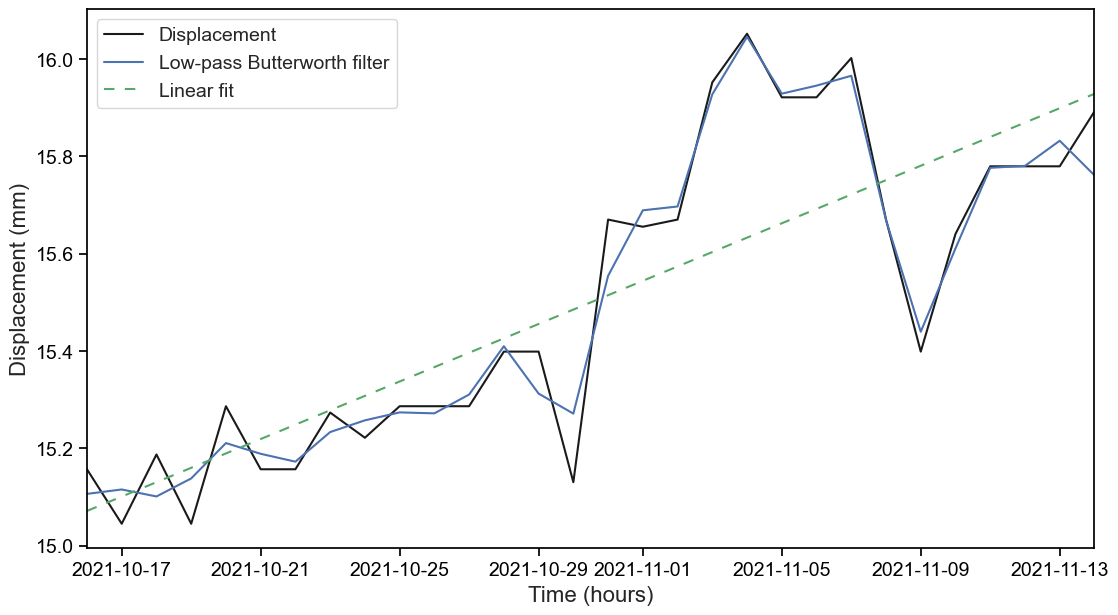

In [229]:
# concluding that the butterworth filter is not influenced by short term fluctuations (noise)

# I think either 1 or 3 day cut off

from statsmodels.graphics.regressionplots import abline_plot
from fractions import Fraction

# for the function
n = 1 # number of days cut off
fs = 1/24 # sample rate in hours 
cutoff = 1/(24*n) # 1/24 means cutoff at 1 day, but times nyquist frequncey so twice
order = 2 # line from 1 to 0, second order is perfect function

#### Data #####
df = JTT1Disp.copy()
module = 74,75 # module number 
file = sub_sample_df(df, module, interval='1D')
col = 0 # 0 if first module, 1 if second module ++
file['disp_interpolated'] = file.iloc[:,col].interpolate(method='linear', limit_direction ='forward') # 0 if first module, 1 if second module ++
################

# n = 1 # number of days cut off
# cutoff = 1/(24*n) # 1/24 means cutoff at 1 day, but times nyquist frequncey so twice
# file['displacement_butterfilt'] = butter_lowpass_filter(file.loc[:,'disp_interpolated'], cutoff, fs, order) # EMA (lowpass filter)

# n = 2 # number of days cut off
# cutoff = 1/(24*n) # 1/24 means cutoff at 1 day, but times nyquist frequncey so twice
# file[f'displacement_butterfilt_{n}'] = butter_lowpass_filter(file.loc[:,'disp_interpolated'], cutoff, fs, order) # EMA (lowpass filter)

n = 3 # number of days cut off
cutoff = 1/(24*n) # 1/24 means cutoff at 1 day, but times nyquist frequncey so twice
file[f'displacement_butterfilt_{n}'] = butter_lowpass_filter(file.loc[:,'disp_interpolated'], cutoff, fs, order) # EMA (lowpass filter)

# plotting                               
df = file.copy()
plot_df = df[((df.index > pd.Timestamp('2021-10-15')) & (df.index < pd.Timestamp('2021-11-15')))]
plot_df_reg = plot_df.reset_index()

mod = ols(formula = f'displacement_butterfilt_{n} ~ plot_df_reg.index', data = plot_df_reg) # model
fit = mod.fit() # model fit
regline = fit.params[0] + fit.params[1] * plot_df_reg.index

fig, ax = plt.subplots(figsize=(13,7))
ax.plot(plot_df.index, plot_df.iloc[:,col], color='k', label='Displacement')
# ax.plot(plot_df.index, plot_df.loc[:,'displacement_butterfilt'], color='r', label='Low-pass Butterworth filter')

# ax.plot(plot_df.index, plot_df.loc[:,'displacement_butterfilt_2'], color='g', label='Low-pass Butterworth filter')
ax.plot(plot_df.index, plot_df.loc[:,f'displacement_butterfilt_{n}'], color='b', label='Low-pass Butterworth filter')
                               
# sns.lineplot(x=plot_df.index, y=fit.fittedvalues, color='g', linestyle = (0,(5, 5)), ax=ax, label='linear fit' )
# abline_plot(model_results=mod.fit(), ax=ax)
ax.plot(plot_df.index, regline, color='g', linestyle = (0,(5, 5)),label='Linear fit' )

# text boxes
# ax.text(pd.Timestamp('2021-03-01'), 37.95, f'fs = {fs} \ncutoff = 1/24 \norder = {order}', horizontalalignment='left', size='medium', color='r', fontsize=medium_size)
# ax.text(pd.Timestamp('2021-03-12'), 37.56, f'Average slope {fit.params[1]*24:.3f} mm/day \nY = {fit.params[0]:.3f} + {fit.params[1]:.3f} * X', horizontalalignment='left', size='medium', color='green', fontsize=large_size)
# ax.text(pd.Timestamp('2021-03-13'), 22.12, f'Y = {fit.params[0]:.3f} + {fit.params[1]:.3f} * X', horizontalalignment='left', size='medium', color='green', fontsize=medium_size)

ax.set_xlabel('Time (hours)')
ax.set_ylabel('Displacement (mm)')
ax.legend() # fontsize=medium_size
plt.show()
# # saving
# path = 'plots\\'
# save_name = f'{path}validation_butterfilt_kh0118_cummulatedmodules.png'
# fig.savefig(save_name, dpi=300, bbox_inches='tight')

In [6]:
# SUBSETING BOREHOLES
JTT1Disp_sub = JTT1Disp.copy()
JTT1Wp_sub = JTT1Wp.copy()
JTT2Disp_sub = JTT2Disp.copy()
JTT2Wp_sub = JTT2Wp.copy()
JTT3Disp_sub = JTT3Disp.copy()
JTT3Wp_sub = JTT3Wp.copy()

# NOISE FILTERING, LOW-PASS FILTERING (BUTTERFILTER)
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, order):
    data = data.values # values to filter
    nyq = 0.5 * fs # Nyquist Frequency, assumes regular time intervals
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low')
    y = filtfilt(b, a, data)
    return y


def clean_lowpassfilt(file, colnmbr=0, name='Water table [m bgl]:'): # colnmbr is the column chosen to lowpass filter
    if isinstance(file,pd.DataFrame) == False:
        file = file.to_frame()
    file['interpolated'] = file.iloc[:,colnmbr].interpolate(method='linear', limit_direction ='forward')
    file['lowpass'] = butter_lowpass_filter(file.iloc[:,-1], cutoff, fs, order) # replace original by lowpass filtered
    file = file.dropna().reindex(file.index) # remove interpolated rows from df
    file = file.drop(file.columns[[0,1]], axis=1) # drop interpolated and original data column
    file.rename(columns={'lowpass':name}, inplace=True) # I call it the same as original if it was dependent on name in scripts lower down
    return file

def extract_data(df_disp, module_disp, module_azi, shearzone_depth, df_wp, module_wp, module_wp_depth, mod, masl_surface):
    modules = module_disp
    df_disp = sub_sample_df(df_disp, modules)
    disp_azi = df_disp.iloc[:,len(module_disp)+module_azi] # need to do this manually to pick azimuth for module with dominant displacement..
    df_disp.drop(columns=['Azimuth'], inplace=True)
    df_disp['Disp_summed [mm]:'] = df_disp.sum(axis=1, min_count=1) # so that nans show and not get 0 values
    df_disp = df_disp[['Disp_summed [mm]:']] # comment to look at the cumulated modules
    # # cleaning disp data
    # df_disp['Disp_summed [mm]:'] = clean_lowpassfilt(df_disp['Disp_summed [mm]:'], colnmbr=0, name='Disp_summed [mm]:')
    
    df_disp['Azimuth'] = disp_azi
    modules = module_wp 
    df_wp = sub_sample_df(df_wp, modules)
    df = df_wp.loc[:,'Water table [m bgl]:'].copy() # gw
    
    # # cleaning Wp data
    # df = clean_lowpassfilt(df, colnmbr=0, name='Water table [m bgl]:')
    
    # cleaned and continues
    df1 = df.copy() # gw copy
    df2 = df_wp.loc[:,'Temperature [°C]:'].copy() # temp
    df += shearzone_depth
    df *=9.81  # change unites from meters of water to kPa by multiplying with gravity (density is 1000 but in kPa)
    df.values[df.values < 0] = 0 # replace values less than 0 with 0 to avoid negative values
    df3 = df1.copy()
    if isinstance(df3,pd.DataFrame) == False:
        df3= df3.to_frame()
    name_columns(df3, modules, name_water='Hydraulic head [masl]:')
    df3 += masl_surface
    if isinstance(df1,pd.DataFrame) == False:
        df1= df1.to_frame()
    name_columns(df1, modules, name_water='Water pressure [m]:')
    # if len(module_wp) > 1 == True: # for wp with more than one module, NB need to fix if more than 2 modules!
    #     df1.iloc[:,0] += module_wp_depth # adding the depth of last piezometer
    #     df1.iloc[:,1] += module_wp_depth # adding the depth of last piezometer
    #     name_columns(df, modules, name_water='Water pressure in shear zone [kPa]:')
    #     name_columns(df2, modules, name_water='Temperature [°C]:')
    #     file = pd.concat([df1,df,df2,df3], axis=1)
    #     #tidying
    #     col1 = file.iloc[:,0].dropna()
    #     col2 = file.iloc[:,1].dropna()
    #     a = pd.concat([col1, col2])
    #     col1 = file.iloc[:,2].dropna()
    #     col2 = file.iloc[:,3].dropna()
    #     b = pd.concat([col1, col2])
    #     col1 = file.iloc[:,4].dropna() # temp
    #     col2 = file.iloc[:,5].dropna()
    #     c = pd.concat([col1, col2])
    #     col1 = file.iloc[:,6].dropna() # hydraulic head
    #     col2 = file.iloc[:,7].dropna()
    #     d = pd.concat([col1, col2])
    #     df = pd.DataFrame({f'Mod{mod}_Water pressure [m]:': a, f'Mod{mod}_Water pressure in shear zone [kPa]:': b, f'Mod{mod}_Temperature [°C]:': c, f'Mod{mod}_Hydraulic head [masl]:': d})
    # else:
    df1.iloc[:,0] += module_wp_depth # adding the depth of each piezometer
    if isinstance(df,pd.DataFrame) == False:
        df= df.to_frame()
    name_columns(df, modules, name_water='Water pressure in shear zone [kPa]:')
    if isinstance(df2,pd.DataFrame) == False:
        df2= df2.to_frame()
    name_columns(df2, modules, name_water='Temperature [°C]:')
    df = pd.concat([df1,df,df2,df3], axis=1)
    
    df_wp = df.copy()
    return df_disp, df_wp
    
# JTT1
JTT1Disp_sub = JTT1Disp.copy()
JTT1Wp_sub = JTT1Wp.copy()

# input parameters
df_disp = JTT1Disp_sub.copy() # displacement file
module_disp = [74,75] # module number  # 44 and 45 meters below surface
module_azi = 0 # picking module from 0 to n modules based on manually looking
shearzone_depth = 45 # add depth of inclinometers in shear zone to get meters of water above shear zone
df_wp = JTT1Wp_sub.copy() # water pressure file
module_wp = [4]  # module number 24 removed, it looked like it was only operative in the start and it is strange. Need to ask about it # piezometer is 115 and 95 meters below surface.
module_wp_depth = 116  # is 116 more correct?? Probably. It is the lowest value. Depth of wp sensor
mod = 4 # which module name to show in file
masl_surface = 610.0 # add height of borehole to get masl

# sorting files based on input parameters
JTT1Disp_sub, JTT1Wp_sub = extract_data(df_disp, module_disp, module_azi, shearzone_depth, df_wp, module_wp, module_wp_depth, mod, masl_surface) # function in top of cell

# cleaning
df = JTT1Disp_sub.iloc[:,[0]]
df.head()

KeyboardInterrupt: 

<Axes: xlabel='Date:'>

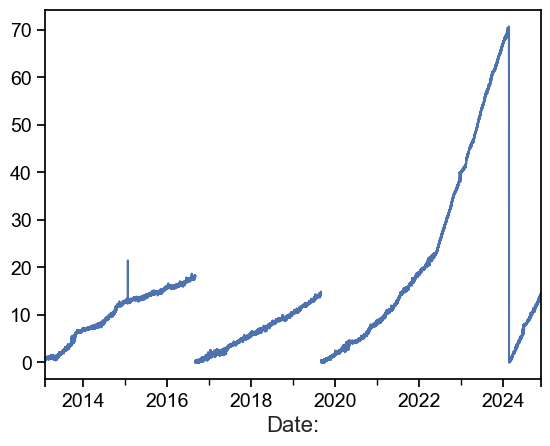

In [19]:
df.iloc[:,0].plot()

In [8]:
# SUBSETING BOREHOLES
JTT1Disp_sub = JTT1Disp.copy()
JTT1Wp_sub = JTT1Wp.copy()
JTT2Disp_sub = JTT2Disp.copy()
JTT2Wp_sub = JTT2Wp.copy()
JTT3Disp_sub = JTT3Disp.copy()
JTT3Wp_sub = JTT3Wp.copy()

# doing the cleaning of data later as I do some manual cleaning below and did not implement this before I did the manual cleaning..

# NOISE FILTERING, LOW-PASS FILTERING (BUTTERFILTER)
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, order):
    data = data.values # values to filter
    nyq = 0.5 * fs # Nyquist Frequency, assumes regular time intervals
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low')
    y = filtfilt(b, a, data)
    return y


def clean_lowpassfilt(file, colnmbr=0, name='Water table [m bgl]:'): # colnmbr is the column chosen to lowpass filter
    if isinstance(file,pd.DataFrame) == False:
        file = file.to_frame()
    file['interpolated'] = file.iloc[:,colnmbr].interpolate(method='linear', limit_direction ='forward')
    file['lowpass'] = butter_lowpass_filter(file.iloc[:,-1], cutoff, fs, order) # replace original by lowpass filtered
    file = file.dropna().reindex(file.index) # remove interpolated rows from df
    file = file.drop(file.columns[[0,1]], axis=1) # drop interpolated and original data column
    file.rename(columns={'lowpass':name}, inplace=True) # I call it the same as original if it was dependent on name in scripts lower down
    return file

def extract_data(df_disp, module_disp, module_azi, shearzone_depth, df_wp, module_wp, module_wp_depth, mod, masl_surface):
    modules = module_disp
    df_disp = sub_sample_df(df_disp, modules)
    disp_azi = df_disp.iloc[:,len(module_disp)+module_azi] # need to do this manually to pick azimuth for module with dominant displacement..
    df_disp.drop(columns=['Azimuth'], inplace=True)
    df_disp['Disp_summed [mm]:'] = df_disp.sum(axis=1, min_count=1) # so that nans show and not get 0 values
    df_disp = df_disp[['Disp_summed [mm]:']] # comment to look at the cumulated modules
    # # cleaning disp data
    # df_disp['Disp_summed [mm]:'] = clean_lowpassfilt(df_disp['Disp_summed [mm]:'], colnmbr=0, name='Disp_summed [mm]:')
    
    df_disp['Azimuth'] = disp_azi
    modules = module_wp 
    df_wp = sub_sample_df(df_wp, modules)
    df = df_wp.loc[:,'Water table [m bgl]:'].copy() # gw
    
    # # cleaning Wp data
    # df = clean_lowpassfilt(df, colnmbr=0, name='Water table [m bgl]:')
    
    # cleaned and continues
    df1 = df.copy() # gw copy
    df2 = df_wp.loc[:,'Temperature [°C]:'].copy() # temp
    df += shearzone_depth
    df *=9.81  # change unites from meters of water to kPa by multiplying with gravity (density is 1000 but in kPa)
    df.values[df.values < 0] = 0 # replace values less than 0 with 0 to avoid negative values
    df3 = df1.copy()
    if isinstance(df3,pd.DataFrame) == False:
        df3= df3.to_frame()
    name_columns(df3, modules, name_water='Hydraulic head [masl]:')
    df3 += masl_surface
    if isinstance(df1,pd.DataFrame) == False:
        df1= df1.to_frame()
    name_columns(df1, modules, name_water='Water pressure [m]:')
    # if len(module_wp) > 1 == True: # for wp with more than one module, NB need to fix if more than 2 modules!
    #     df1.iloc[:,0] += module_wp_depth # adding the depth of last piezometer
    #     df1.iloc[:,1] += module_wp_depth # adding the depth of last piezometer
    #     name_columns(df, modules, name_water='Water pressure in shear zone [kPa]:')
    #     name_columns(df2, modules, name_water='Temperature [°C]:')
    #     file = pd.concat([df1,df,df2,df3], axis=1)
    #     #tidying
    #     col1 = file.iloc[:,0].dropna()
    #     col2 = file.iloc[:,1].dropna()
    #     a = pd.concat([col1, col2])
    #     col1 = file.iloc[:,2].dropna()
    #     col2 = file.iloc[:,3].dropna()
    #     b = pd.concat([col1, col2])
    #     col1 = file.iloc[:,4].dropna() # temp
    #     col2 = file.iloc[:,5].dropna()
    #     c = pd.concat([col1, col2])
    #     col1 = file.iloc[:,6].dropna() # hydraulic head
    #     col2 = file.iloc[:,7].dropna()
    #     d = pd.concat([col1, col2])
    #     df = pd.DataFrame({f'Mod{mod}_Water pressure [m]:': a, f'Mod{mod}_Water pressure in shear zone [kPa]:': b, f'Mod{mod}_Temperature [°C]:': c, f'Mod{mod}_Hydraulic head [masl]:': d})
    # else:
    df1.iloc[:,0] += module_wp_depth # adding the depth of each piezometer
    if isinstance(df,pd.DataFrame) == False:
        df= df.to_frame()
    name_columns(df, modules, name_water='Water pressure in shear zone [kPa]:')
    if isinstance(df2,pd.DataFrame) == False:
        df2= df2.to_frame()
    name_columns(df2, modules, name_water='Temperature [°C]:')
    df = pd.concat([df1,df,df2,df3], axis=1)
    
    df_wp = df.copy()
    return df_disp, df_wp

# # creating folder and deleting previous processed data
# folder_name = 'pre_plotting\\'
# shutil.rmtree(folder_name, ignore_errors=True)
# shutil.rmtree(folder_name, ignore_errors=True)
    
# os.mkdir(folder_name)


# low pass filter inputs for the Wp cleaning, same as for disp in loading data file..
n = 3 # number of days cut off
fs = 1 # sample rate in hours 
cutoff = 1/(24*n) # 1/24 means cutoff at 1 day, but times nyquist frequncey so twice
order = 2 # line from 1 to 0, second order is perfect function


# JTT1
# input parameters
df_disp = JTT1Disp_sub.copy() # displacement file
module_disp = [74,75] # module number  # 44 and 45 meters below surface
module_azi = 0 # picking module from 0 to n modules based on manually looking
shearzone_depth = 45 # add depth of inclinometers in shear zone to get meters of water above shear zone
df_wp = JTT1Wp_sub.copy() # water pressure file
module_wp = [4]  # module number 24 removed, it looked like it was only operative in the start and it is strange. Need to ask about it # piezometer is 115 and 95 meters below surface.
module_wp_depth = 116  # is 116 more correct?? Probably. It is the lowest value. Depth of wp sensor
mod = 4 # which module name to show in file
masl_surface = 610.0 # add height of borehole to get masl

# sorting files based on input parameters
JTT1Disp_sub, JTT1Wp_sub = extract_data(df_disp, module_disp, module_azi, shearzone_depth, df_wp, module_wp, module_wp_depth, mod, masl_surface) # function in top of cell

# cleaning
df = JTT1Disp_sub.iloc[:,[0]]
df2 = df.copy()
time_start = '2024-02-22 01:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2024-02-22 02:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
df2 = df.copy()
time_start = '2019-08-31 11:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2019-09-01 08:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
df2 = df.copy()
time_start = '2016-09-01 00:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2016-09-01 19:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
# outlier different for the modules
time_mask = ((df.index > pd.Timestamp('2015-01-20')) & (df.index < pd.Timestamp('2015-01-29')))
disp_mask = (df.iloc[:,0] > 14.0)  # remove all above, meaning remove everything as it is just noise
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask
JTT1Disp_sub.iloc[:,0] = df.copy()

# saving raw data
JTT1Disp_sub.to_pickle('pre_plotting/JTT1Disp_raw.pkl')
JTT1Wp_sub.to_pickle('pre_plotting/JTT1Wp_raw.pkl')


# # JTT2
# input parameters
# Upper zone
df_disp = JTT2Disp_sub.copy() # displacement file
module_disp = [70,71] # module number  # 24-26 meters below surface
module_azi = 1 # picking module from 0 to n modules based on manually looking
shearzone_depth = 26 # add depth of inclinometers in shear zone to get meters of water above shear zone
df_wp = JTT2Wp_sub.copy() # water pressure file
module_wp = [4]  # module number  # piezometer is 115 and 95 meters below surface.
module_wp_depth = 92 # depth of wp sensor
mod = 4 # which module name to show in file
masl_surface = 656.0 # add height of borehole to get masl

# sorting files based on input parameters
JTT2DispUpperZone_sub, JTT2WpUpperZone_sub = extract_data(df_disp, module_disp, module_azi, shearzone_depth, df_wp, module_wp, module_wp_depth, mod, masl_surface) # function in top of cell

# cleaning
df = JTT2DispUpperZone_sub.iloc[:,[0]]
df2 = df.copy()
time_start = '2024-03-04 01:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2024-03-04 03:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
df2 = df.copy()
time_start = '2019-08-31 11:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2019-09-01 08:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
df2 = df.copy()
time_start = '2016-09-01 00:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2016-09-01 19:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
# outlier different for the modules
time_mask = ((df.index > pd.Timestamp('2021-01-22')) & (df.index < pd.Timestamp('2021-01-25')))
disp_mask = (df.iloc[:,0] < 27.5)  # remove all below 
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask
disp_mask = (df.iloc[:,0] > 29.0)  # remove all below 
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask
# outlier different for the modules
time_mask = ((df.index > pd.Timestamp('2019-03-27')) & (df.index < pd.Timestamp('2019-04-08')))
disp_mask = (df.iloc[:,0] > 19.0)  # remove all above 
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask

JTT2DispUpperZone_sub.iloc[:,0] = df.copy()

# saving raw data
JTT2DispUpperZone_sub.to_pickle('pre_plotting/JTT2DispUpperZone_raw.pkl')
JTT2WpUpperZone_sub.to_pickle('pre_plotting/JTT2WpUpperZone_raw.pkl')

# Lower zone
df_disp = JTT2Disp_sub.copy() # displacement file
module_disp = [46,47] # module number  # 48-50 meters below surface
module_azi = 0 # picking module from 0 to n modules..
shearzone_depth = 48 # add depth of inclinometers in shear zone to get meters of water above shear zone
df_wp = JTT2Wp_sub.copy() # water pressure file

# sorting files based on input parameters
JTT2DispLowerZone_sub, JTT2WpLowerZone_sub = extract_data(df_disp, module_disp, module_azi, shearzone_depth, df_wp, module_wp, module_wp_depth, mod, masl_surface) # function in top of cell

# cleaning
df = JTT2DispLowerZone_sub.iloc[:,[0]]
df2 = df.copy()
time_start = '2024-03-04 01:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2024-03-04 03:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
df2 = df.copy()
time_start = '2019-08-31 11:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2019-09-01 08:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
df2 = df.copy()
time_start = '2016-09-01 00:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2016-09-01 19:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
# outlier different for the modules
# 2021
time_mask = ((df.index > pd.Timestamp('2021-01-22')) & (df.index < pd.Timestamp('2021-01-25')))
disp_mask = (df.iloc[:,0] < 30.5)  # remove all below 
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask
disp_mask = (df.iloc[:,0] > 32.0)  # remove all below 
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask
JTT2DispLowerZone_sub.iloc[:,0] = df.copy()

# saving raw data
JTT2DispLowerZone_sub.to_pickle('pre_plotting/JTT2DispLowerZone_raw.pkl')
JTT2WpLowerZone_sub.to_pickle('pre_plotting/JTT2WpLowerZone_raw.pkl')


# # JTT3
# input parameters
df_disp = JTT3Disp_sub.copy() # displacement file
module_disp = [18,19] # module number  # 79-81 meters below surface # everything happens in this one module!
module_azi = 1 # picking module from 0 to n modules based on manually looking
shearzone_depth = 81 # add depth of inclinometers in shear zone to get meters of water above shear zone
df_wp = JTT3Wp_sub.copy() # water pressure file
module_wp = [4]  # module number  # piezometer is 115 and 95 meters below surface.
module_wp_depth = 95  # depth of wp sensor
mod = 4 # which module name to show in file
masl_surface = 522.0 # add height of borehole to get masl

# sorting files based on input parameters
JTT3Disp_sub, JTT3Wp_sub = extract_data(df_disp, module_disp, module_azi, shearzone_depth, df_wp, module_wp, module_wp_depth, mod, masl_surface) # function in top of cell

# cleaning
df = JTT3Disp_sub.iloc[:,[0]]
df2 = df.copy()
time_start = '2024-03-13 01:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2024-03-13 02:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])

df2 = df.copy()
time_start = '2019-08-31 11:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2019-09-01 08:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])

df2 = df.copy()
time_start = '2016-08-23 06:00:00' # was a lot of missing data at this gap
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2016-09-01 19:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])

# outlier different for the modules, removing large jumps
time_mask = ((df.index > pd.Timestamp('2020-12-13 06:00')) & (df.index < pd.Timestamp('2020-12-15 18:00')))
disp_mask = (df.iloc[:,0] > 0)  # remove all above, meaning remove everything as it is just noise
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask

time_mask = ((df.index > pd.Timestamp('2023-06-20 12:00')) & (df.index < pd.Timestamp('2023-06-22 18:00')))
disp_mask = (df.iloc[:,0] > 0)  # remove all above, meaning remove everything as it is just noise
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask

time_mask = ((df.index > pd.Timestamp('2019-08-30 12:00')) & (df.index < pd.Timestamp('2019-09-02 00:00')))
disp_mask = (df.iloc[:,0] > 0)  # remove all above, meaning remove everything as it is just noise
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask

JTT3Disp_sub.iloc[:,0] = df.copy()

# saving raw data
JTT3Disp_sub.to_pickle('pre_plotting/JTT3Disp_raw.pkl')
JTT3Wp_sub.to_pickle('pre_plotting/JTT3Wp_raw.pkl')

C:\Users\andregas\AppData\Local\Temp\ipykernel_668\187260493.py:165: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Date:
2013-02-01 02:00:00      0.178885
2013-02-01 03:00:00      0.178885
2013-02-01 04:00:00      0.178885
2013-02-01 05:00:00      0.178885
2013-02-01 06:00:00      0.344384
                          ...    
2024-11-26 08:00:00    117.330150
2024-11-26 09:00:00    117.120284
2024-11-26 10:00:00    117.120284
2024-11-26 11:00:00    117.330150
2024-11-26 12:00:00    117.120284
Name: Disp_summed [mm]:, Length: 103550, dtype: float64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  JTT1Disp_sub.iloc[:,0] = df.copy()
C:\Users\andregas\AppData\Local\Temp\ipykernel_668\187260493.py:234: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Date:
2014-07-17 17:00:00     0.000000
2014-07-17 18:00:00     

In [ ]:
fig, ax = plt.subplots(figsize=((10), (10)))

df = JTT1Disp_sub.copy()

df = JTT1Disp.copy() # displacement file
modules = [71,72,73,74,75,76]
df = sub_sample_df(df, modules)

ax.plot(df.index, df.iloc[:,0], color='red', label='2 m below shear zone')
ax.plot(df.index, df.iloc[:,1], color='darkorange', label='1 m below shear zone')
ax.plot(df.index, df.iloc[:,3], color='dodgerblue', label='center shear zone')
ax.plot(df.index, df.iloc[:,2], color='magenta', label='1 meter above shear zone')
ax.plot(df.index, df.iloc[:,4], color='violet', label='2 meter above shear zone')
ax.plot(df.index, df.iloc[:,5], color='slategray', label='3 meters above shear zone')
# ax.plot(df.index, df.iloc[:,6], color='forestgreen', label='Cumulated shear zone')

# ax.set_title('highest number is closest to the top of borehole')
ax.set_xlabel('Years')
ax.set_ylabel('Displacement (mm)')
ax.set_ylim(-20,20)
# ax.set_xlim(pd.Timestamp('2019-11-15'),pd.Timestamp('2020-01-15'))

# generate legend
lines, labels = ax.get_legend_handles_labels()
lines = lines[::-1]
labels = labels[::-1]
ax.legend(lines, labels, loc='upper left')

# removing tick labels from the xaxis
n = 2  # keeps every n row
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

fig.tight_layout()
plt.show()

##### Manual cleaning of cumulated modules

In [6]:
# cumulate and see if I do not have to do these minor adjustments

# JTT1
df = JTT1Disp_sub.iloc[:,[0]]
df2 = df.copy()
time_start = '2024-02-22 01:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2024-02-22 02:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
df2 = df.copy()
time_start = '2019-08-31 11:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2019-09-01 08:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
df2 = df.copy()
time_start = '2016-09-01 00:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2016-09-01 19:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
# outlier different for the modules
time_mask = ((df.index > pd.Timestamp('2015-01-20')) & (df.index < pd.Timestamp('2015-01-29')))
disp_mask = (df.iloc[:,0] > 14.0)  # remove all above, meaning remove everything as it is just noise
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask
JTT1Disp_sub.iloc[:,0] = df.copy()

# JETT2 Upper zone
df = JTT2DispUpperZone_sub.iloc[:,[0]]
df2 = df.copy()
time_start = '2024-03-04 01:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2024-03-04 03:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
df2 = df.copy()
time_start = '2019-08-31 11:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2019-09-01 08:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
df2 = df.copy()
time_start = '2016-09-01 00:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2016-09-01 19:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
# outlier different for the modules
time_mask = ((df.index > pd.Timestamp('2021-01-22')) & (df.index < pd.Timestamp('2021-01-25')))
disp_mask = (df.iloc[:,0] < 27.5)  # remove all below 
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask
disp_mask = (df.iloc[:,0] > 29.0)  # remove all below 
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask
# outlier different for the modules
time_mask = ((df.index > pd.Timestamp('2019-03-27')) & (df.index < pd.Timestamp('2019-04-08')))
disp_mask = (df.iloc[:,0] > 19.0)  # remove all above 
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask

JTT2DispUpperZone_sub.iloc[:,0] = df.copy()

# JTT2 Lower zone
df = JTT2DispLowerZone_sub.iloc[:,[0]]
df2 = df.copy()
time_start = '2024-03-04 01:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2024-03-04 03:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
df2 = df.copy()
time_start = '2019-08-31 11:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2019-09-01 08:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
df2 = df.copy()
time_start = '2016-09-01 00:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2016-09-01 19:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])
# outlier different for the modules
# 2021
time_mask = ((df.index > pd.Timestamp('2021-01-22')) & (df.index < pd.Timestamp('2021-01-25')))
disp_mask = (df.iloc[:,0] < 30.5)  # remove all below 
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask
disp_mask = (df.iloc[:,0] > 32.0)  # remove all below 
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask
JTT2DispLowerZone_sub.iloc[:,0] = df.copy()

# JTT3
df = JTT3Disp_sub.iloc[:,[0]]
df2 = df.copy()
time_start = '2024-03-13 01:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2024-03-13 02:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])

df2 = df.copy()
time_start = '2019-08-31 11:00:00'
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2019-09-01 08:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])

df2 = df.copy()
time_start = '2016-08-23 06:00:00' # was a lot of missing data at this gap
time_to = df.index < pd.Timestamp(time_start)
time_from = df2.index > pd.Timestamp('2016-09-01 19:00:00')
df = df[time_to]
df2 = df2[time_from]
df2 = df2[df2.first_valid_index():] # starting from first real value as there is some gap before data is collecting again
gap = np.nanmedian(df.iloc[:,0][-24:])-np.nanmedian(df2.iloc[:,0][:24]) # adding 24 hour mean to the gap
df2.iloc[:,0] = df2.iloc[:,0] + gap
df = pd.concat([df, df2])

# outlier different for the modules, removing large jumps
time_mask = ((df.index > pd.Timestamp('2020-12-13 06:00')) & (df.index < pd.Timestamp('2020-12-15 18:00')))
disp_mask = (df.iloc[:,0] > 0)  # remove all above, meaning remove everything as it is just noise
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask

time_mask = ((df.index > pd.Timestamp('2023-06-20 12:00')) & (df.index < pd.Timestamp('2023-06-22 18:00')))
disp_mask = (df.iloc[:,0] > 0)  # remove all above, meaning remove everything as it is just noise
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask

time_mask = ((df.index > pd.Timestamp('2019-08-30 12:00')) & (df.index < pd.Timestamp('2019-09-02 00:00')))
disp_mask = (df.iloc[:,0] > 0)  # remove all above, meaning remove everything as it is just noise
outlier_mask = time_mask & disp_mask
df = df[~outlier_mask] # inverse of mask

JTT3Disp_sub.iloc[:,0] = df.copy()

##### To see how it looks now

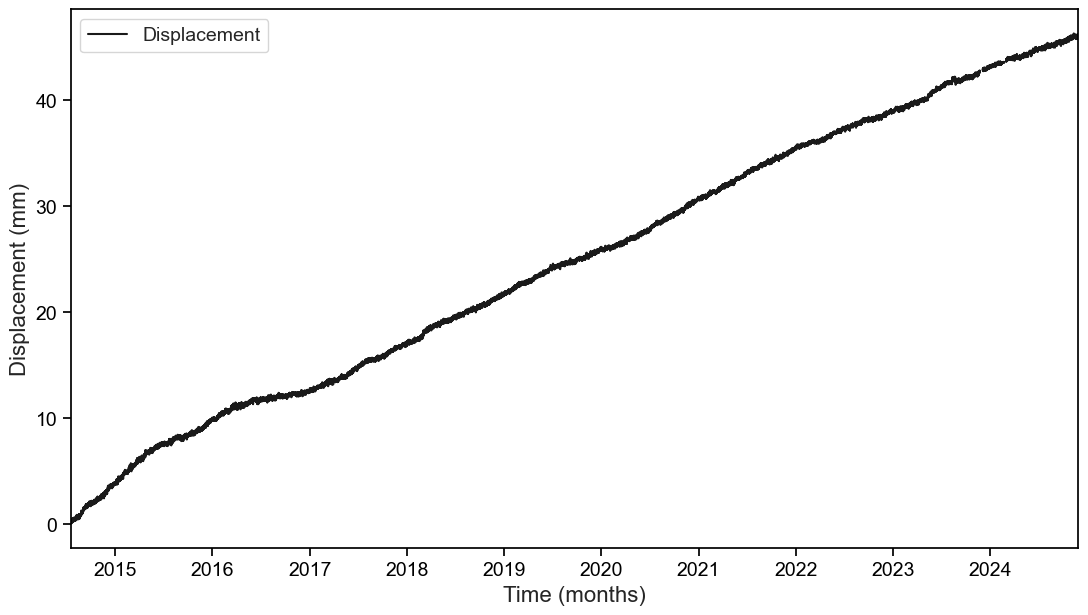

,Disp_summed [mm]:
Date:,
2024-11-26 07:00:00,46.152284
2024-11-26 08:00:00,46.155713
2024-11-26 09:00:00,46.168260
2024-11-26 10:00:00,46.191880
2024-11-26 11:00:00,46.228533


In [106]:
plot_df = JTT2DispLowerZone_sub.iloc[:,[0]].copy()
# plot_df = JTT1Disp_sub.iloc[:,[0]].copy()
# time_mask = ((plot_df.index > pd.Timestamp('2024-03-03')) & (plot_df.index < pd.Timestamp('2024-03-13 04')))
# plot_df = plot_df[time_mask]
fig, ax = plt.subplots(figsize=(13,7))
ax.plot(plot_df.index, plot_df.iloc[:,0], color='k', label='Displacement')
# ax.set_ylim(0,8)
ax.set_xlabel('Time (months)')
ax.set_ylabel('Displacement (mm)')
ax.legend(loc='upper left') # fontsize=medium_size
plt.show()
plot_df.tail()

##### Continued automatic cleaning of timeseries

In [10]:
from scipy.signal import savgol_filter
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, order):
    data = data.values # values to filter
    nyq = 0.5 * fs # Nyquist Frequency, assumes regular time intervals
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low')
    y = filtfilt(b, a, data)
    return y


# values for the low pass filter
n = 3 # number of days cut off
fs = 1 # sample rate in hours 
cutoff = 1/(24*n) # 1/24 means cutoff at 1 day, but times nyquist frequncey so twice
order = 2 # line from 1 to 0, second order is perfect function

# median filter window
window_median = 15 # 7 might be okay and 29 is smooth, tried with 15 as a middle way to keep temp stationary

# rolling mean filter window
window_mean = 7 # 7 is enough to keep temp stationary

# savgol parameters
window_size = 11
poly_order = 3

# # cleaned data
# def clean_df(df,start_time,end_time, interval):
#     df = df[df.index.slice_indexer(start_time,end_time)]
#     for i, col in enumerate(df.columns):
#         df.loc[:,col] = clean_filt(df.loc[:,col]).values # filtered data
#         # df.loc[:,col] = medfilt(df.loc[:,col], window_median) # median filter
#         df.loc[:, col] = df.loc[:, col].rolling(window=window_mean, center=True).mean() # rolling mean
#         df = df.resample(interval).median() # downsampling with median value after cleaning
#         df.dropna(inplace=True)
#     return df
# First I do a savgol filter, then I do a rolling mean after that again. And then downsampling the smoothed data.

# low pass filter for disp 
n = 3 # number of days cut off
fs = 1 # sample rate in hours 
cutoff = 1/(24*n) # 1/24 means cutoff at 1 day, but times nyquist frequncey so twice
order = 2 # line from 1 to 0, second order is perfect function

def clean_lowpassfilt(file, colnmbr=0, name='Water table [m bgl]:'): # colnmbr is the column chosen to lowpass filter
    if isinstance(file,pd.DataFrame) == False:
        file = file.to_frame()
    file['Interpolated'] = file.iloc[:,colnmbr].interpolate(method='linear', limit_direction ='forward')
    # file['filt'] = butter_lowpass_filter(file.iloc[:,-1], cutoff, fs, order) # replace original by lowpass filtered
    file['filt'] = savgol_filter(file.iloc[:,-1], window_size, poly_order) # savitzky-golay filter
    file = file.dropna().reindex(file.index) # remove interpolated rows from df
    file = file.drop(file.columns[[0]], axis=1) # drop interpolated and original data column
    file.rename(columns={'filt':name}, inplace=True) # I call it the same as original if it was dependent on name in scripts lower down
    return file.iloc[:,0], file.iloc[:,1]

JTT1Disp_sub['Interpolated'], JTT1Disp_sub['Disp_summed [mm]:'] = clean_lowpassfilt(JTT1Disp_sub['Disp_summed [mm]:'], colnmbr=0, name='Disp_summed [mm]:')
JTT2DispUpperZone_sub['Interpolated'], JTT2DispUpperZone_sub['Disp_summed [mm]:'] = clean_lowpassfilt(JTT2DispUpperZone_sub['Disp_summed [mm]:'], colnmbr=0, name='Disp_summed [mm]:')
JTT2DispLowerZone_sub['Interpolated'], JTT2DispLowerZone_sub['Disp_summed [mm]:'] = clean_lowpassfilt(JTT2DispLowerZone_sub['Disp_summed [mm]:'], colnmbr=0, name='Disp_summed [mm]:')
JTT3Disp_sub['Interpolated'], JTT3Disp_sub['Disp_summed [mm]:'] = clean_lowpassfilt(JTT3Disp_sub['Disp_summed [mm]:'], colnmbr=0, name='Disp_summed [mm]:')

In [88]:
from statsmodels.formula.api import ols
def linearfit(volume, window_days=0.5, results = False, gps=False): # added gps= to get rows that fit gps days velocity
    volume = volume.to_frame()
    df = volume.copy()
    df = df.reset_index(drop=True) # due to LinearRgression is not able to calculate with dateformat as x-axis
    if gps is True:
        window_hours = 2*window_days
    else:
        window_hours = 24*window_days 
    cutoff_start = df.index.values[0]
    cutoff_end = cutoff_start + window_hours
    reg_res = []
    data_left = True # starts loop

    # Slicing timeseries by window_hours calculating linear regression with slope, intercept and r^2                                                                           
    while data_left:
        if cutoff_end > df.index.values[-1]:
            data_left = False # stops loop
            cutoff_end = df.index.values[-1]
            break   
        start = df.index.values >= cutoff_start
        end = df.index.values <= cutoff_end
        current_data = df[start & end]
        current_data = current_data.squeeze()
        # added part so no need of interpolation, but perhaps for boreholes?
        if max(current_data.isnull().astype(int).groupby(current_data.notnull().astype(int).cumsum()).cumsum()) > window_hours/4: # True if more than consecutive nans
            current_data = current_data.dropna(axis=0) # deletes nan so df is to small to get true in next if statement
        
        if len(current_data) > window_hours-1:
            mod = ols(formula = 'current_data.values ~ current_data.index', data = current_data) # model
            fit = mod.fit() # model fit
            if results is True:
                reg_res += [(cutoff_start+window_hours//2, fit.params[1], fit.params[0], fit.rsquared)]  # returns intercept and r^2 in addition to index and slope
            else:
                reg_res += [(cutoff_start+window_hours//2, fit.params[1])]  # returns index and slope
        cutoff_start += 1
        cutoff_end = cutoff_start + window_hours

    # Merging df and reg_res to obtain correct index and storing output from linear regression and calculating error of fit
    df.index.name = 'index'
    df[volume.index.name] = volume.index
    slopedf = pd.DataFrame(reg_res)
    if results is True:
        slopedf.columns = ['index',f'{window_days}_days_velocity', 'intercept', 'r^2'] # NB velocity is the slope of the fit
        slopedf['y_fit'] = slopedf[f'{window_days}_days_velocity']*slopedf.index+slopedf['intercept']
        df_merged = pd.merge_asof(df,slopedf, on=df.index.name, tolerance=0)
        df_merged.set_index(volume.index.name,inplace=True, drop=True)
        df_merged['residuals'] = (df_merged.iloc[:,[1]].values-df_merged.iloc[:,[5]].values) # y-y_hat = resuduals
        df_merged['error_of_fit'] = ((np.mean(df_merged['residuals']**2))**(1/2))
        df_merged.drop(df_merged.columns[[0,1]], axis=1, inplace=True)
#         return df_merged.dropna() # this might be a problem in the future.. But I will comment it and get data with nans
        return df_merged
    else:
        slopedf.columns = ['index',f'{window_days}_days_velocity']
        df_merged = pd.merge_asof(df,slopedf, on=df.index.name, tolerance=0)
        df_merged.set_index(volume.index.name,inplace=True, drop=True)
        df_merged.drop(df_merged.columns[[0,1]], axis=1, inplace=True)
#         return df_merged.dropna() # this might be a problem in the future.. But I will comment it and get data with nans
        return df_merged

In [112]:
###### Checking which sta and lta fits ########
# Strive for positive values, but look for creep burst detection to choose.
# For JTT1 8 days is the first with 25 % quartile positive values, min() show still negative values for the 16 days
# 

# df = JTT1Disp_sub.copy()
# df = JTT2DispUpperZone_sub.copy()
# df = JTT2DispLowerZone_sub.copy()
df = JTT3Disp_sub.copy()
col_name='Disp_summed [mm]:'

test1 = linearfit(df[f'{col_name}'], window_days=4)
test2 = linearfit(df[f'{col_name}'], window_days=8)
test3 = linearfit(df[f'{col_name}'], window_days=16)
test4 = linearfit(df[f'{col_name}'], window_days=32)

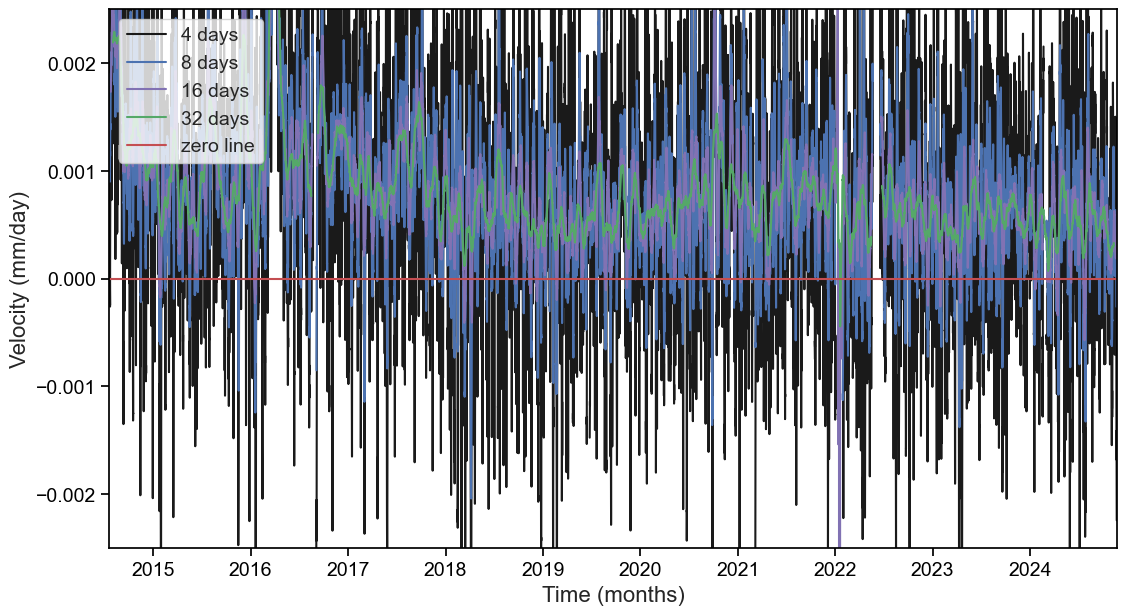

In [113]:
fig, ax = plt.subplots(figsize=(13,7))
ax.plot(test1.index, test1.iloc[:,0], color='k', label='4 days')
ax.plot(test2.index, test2.iloc[:,0], color='b', label='8 days')
ax.plot(test3.index, test3.iloc[:,0], color='m', label='16 days')
ax.plot(test4.index, test4.iloc[:,0], color='g', label='32 days')
ax.axhline(y = 0, color = 'r', linestyle = '-', label='zero line') 

ax.set_ylim(-0.0025,0.0025)
ax.set_xlabel('Time (months)')
ax.set_ylabel('Velocity (mm/day)')
ax.legend(loc='upper left') # fontsize=medium_size

In [114]:
# see which has less negatives in df
test1.iloc[:,0].describe(), test2.iloc[:,0].describe(), test3.iloc[:,0].describe(), test4.iloc[:,0].describe()

(count    87597.000000
 mean         0.000813
 std          0.001316
 min         -0.003986
 25%         -0.000018
 50%          0.000753
 75%          0.001568
 max          0.015523
 Name: 4_days_velocity, dtype: float64,
 count    87456.000000
 mean         0.000816
 std          0.000848
 min         -0.002039
 25%          0.000289
 50%          0.000752
 75%          0.001228
 max          0.011221
 Name: 8_days_velocity, dtype: float64,
 count    88562.000000
 mean         0.000809
 std          0.000657
 min         -0.003657
 25%          0.000460
 50%          0.000735
 75%          0.001051
 max          0.007822
 Name: 16_days_velocity, dtype: float64,
 count    88482.000000
 mean         0.000809
 std          0.000524
 min         -0.000443
 25%          0.000526
 50%          0.000701
 75%          0.000947
 max          0.005895
 Name: 32_days_velocity, dtype: float64)

In [32]:
# STA/LTA FILTER WITH CREEP BURST THRESHOLD 
def sta_lta(df, col_name, STA=2, LTA=60, detrigg_on=True, trigg=2, detrigg=1, threshold_dynamic=True):
    # add LTA if it is not in the df
    if not f'{LTA}_days_velocity' in df.columns:
        df = pd.merge_asof(df, linearfit(df[f'{col_name}'], window_days=LTA), on=df.index.name, tolerance=pd.Timedelta(hours=0))
    
    # add STA if it is not in the df
    if not f'{STA}_days_velocity' in df.columns:
        df.set_index(df.columns[0], drop=True, inplace=True)
        df = pd.merge_asof(df, linearfit(df[f'{col_name}'], window_days=STA), on=df.index.name, tolerance=pd.Timedelta(hours=0))
    
    # setting STA and LTA 
    df['sta'] = df[f'{STA}_days_velocity'].values # use 1_day or 2_days ?
    df['lta'] = df[f'{LTA}_days_velocity'].values
#     df.loc[:, 'lta'] = df[f'{LTA}_days_velocity'].shift(LTA*24//2) # shifts lta to start at end of window, not middle. This was used in seismology but did not seam to work as well on our time series
    df['sta-lta'] = df['sta']-df['lta'] # changed from sta/lta to sta-lta as that worked better for the detection
    
    # creep burst threshold
    df['trigger'] = np.nan
    df['detrigger'] = np.nan
    
    if threshold_dynamic is True:
        # dynamic threshold
        window_length = LTA*24 # the start of mean calculation
        for i,d in enumerate(df['sta-lta'][window_length+window_length//2:-window_length//2]):
            # window from start to end of sta/lta
            window = df.loc[i+window_length:i+window_length*2, 'sta-lta']
            sigma = np.sqrt((np.sum(np.square(window-np.mean(window))))/len(window-1))
            # inserting mean + sigma in center of window
            df.loc[i+window_length+window_length//2, 'trigger'] = np.mean(window)+sigma*trigg # 2 x SD centered 
            df.loc[i+window_length+window_length//2, 'detrigger'] = np.mean(window)+sigma*detrigg # 1 x SD centered
    else:
        # static threshold
        sigma = np.sqrt((np.sum(np.square(df['sta-lta']-np.mean(df['sta-lta']))))/len(df['sta-lta']-1))
        df['trigger'] = np.mean(df['sta-lta'])+sigma*trigg
        df['detrigger'] = np.mean(df['sta-lta'])+sigma*detrigg
    
    # selecting creep bursts
    df['nBursts'] = 0
    prev_d = 0
    prev_burst_idx = 0
    indexes = []
    above_trigg = False
    
    if detrigg_on is True:
        for i, d in enumerate(df['sta-lta']):
            # trigger threshold
            if d > df.loc[i, 'detrigger']:
                indexes += [i]
                if d > df.loc[i, 'trigger']:
                    above_trigg = True
            else:
                if above_trigg:
                    df.loc[indexes, 'nBursts'] = 1
                indexes = []
                above_trigg = False
    df.set_index(df.columns[0], drop=True, inplace=True)
    return df

###### Setting algorithm

col_name = 'Disp_summed [mm]:'
LTA= 120 # days of long term average to threshold creep bursts
trigg = 1.5 # I used 1.25 when testing, maybe change to that?? But seems like I have enough bursts.. # trigg*SD (number of standard deviations to trigger recording of creep bursts)
detrigg = trigg//2

# I have allready all bursts for jtt2 upper. what about jtt3?

plot_df = velocity(JTT3Disp_sub, col_name, window_days=STA)
plot_df = sta_lta(plot_df, col_name, STA=STA, LTA=LTA, detrigg_on=True, trigg=trigg, detrigg=detrigg, threshold_dynamic=False)

C:\Users\andregas\AppData\Local\Temp\ipykernel_668\3849911332.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].plot(plot_df.index, plot_df.iloc[:,0]-plot_df.iloc[:,0][0], color='black', label='Displacement')


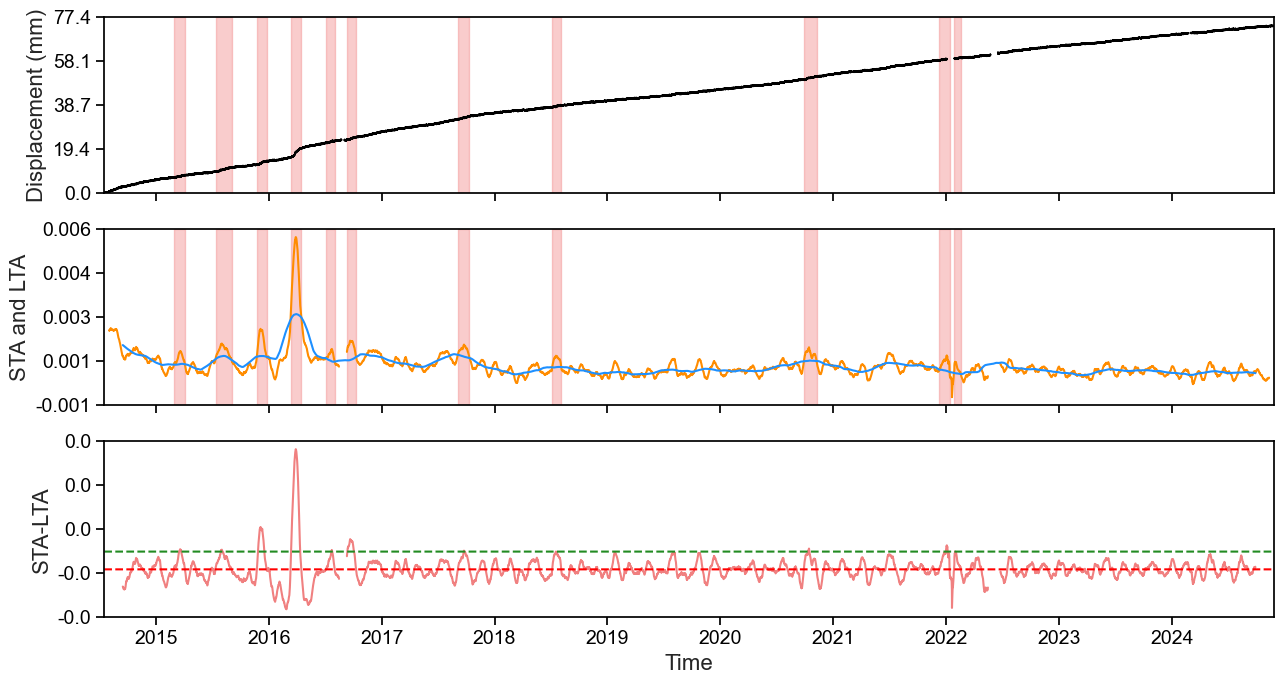

Number of creep bursts: 11


In [33]:
fig, ax = plt.subplots(nrows=3, figsize=(13,7), sharex=True)

# ax.set_xlim(plot_df.index[0], plot_df.index[-1])

# df of start and end of bursts
window = []
previous_d = 0
for i, d in enumerate(plot_df['nBursts']):
    if d != previous_d:
        previous_d = d
        window.append(plot_df[i:i+1].index)
        
idx = np.arange(0, len(window), 2)  # index to slice at even numbers
for start in idx:
    st = [pd.Timestamp(i) for i in window[start]]
    end = [pd.Timestamp(i) for i in window[start+1]]
    ax[0].axvspan(xmin=st[0], xmax=end[0], ymin=0, ymax=1, facecolor='lightcoral', edgecolor='lightcoral', label='Creep burst', zorder=1, alpha=0.4)

# ax_yy.bar(plot_df.index, plot_df['nBursts'], width = 1*10**(-6*4), color='lightcoral', ec='lightcoral', label='Creep burst', alpha=0.4)
# ax[0].plot(plot_df.index, plot_df['2_days_velocity'], color='red', label='2 days velocity')
ax[0].plot(plot_df.index, plot_df.iloc[:,0]-plot_df.iloc[:,0][0], color='black', label='Displacement')

nticks = 5
ax[0].yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# ax_y.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
# ax_y.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        
for start in idx:
    st = [pd.Timestamp(i) for i in window[start]]
    end = [pd.Timestamp(i) for i in window[start+1]]
    ax[1].axvspan(xmin=st[0], xmax=end[0], ymin=0, ymax=1, facecolor='lightcoral', edgecolor='lightcoral', label='Creep burst', zorder=1, alpha=0.4)

ax[1].plot(plot_df.index, plot_df['sta'], color='darkorange', label='STA') # linestyle = (0,(5, 10))
ax[1].plot(plot_df.index, plot_df['lta'], color='dodgerblue', label='LTA' )

nticks = 5
ax[1].yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

# for start in idx:
#     st = [pd.Timestamp(i) for i in window[start]]
#     end = [pd.Timestamp(i) for i in window[start+1]]
#     ax[2].axvspan(xmin=st[0], xmax=end[0], ymin=0, ymax=1, facecolor='lightcoral', edgecolor='lightcoral', label='Creep burst', zorder=1, alpha=0.4)
ax[2].plot(plot_df.index, plot_df['sta-lta'], color='lightcoral', label='STA-LTA' ) # linestyle = (0,(5, 1))
ax[2].plot(plot_df.index, plot_df['trigger'], color='forestgreen', linestyle='--',label=r'mean LTA + 1.5$ \times \sigma$') # trigger
ax[2].plot(plot_df.index, plot_df['detrigger'], color='red', linestyle='--',label=r'mean LTA + 0.75$ \times \sigma$') # detrigger
# ax[2].axhline(threshold[0], color='forestgreen', linestyle='--',label='mean + 2$\sigma$') # trigger
# ax[2].axhline(threshold[1], color='red', linestyle='--',label='mean + $\sigma$') # detrigger

# ax[2].set_ylim(0,400)

nticks = 5
ax[2].yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax[2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# ax[0].set_ylabel('Velocity (mm/h)')
ax[0].set_ylabel('Displacement (mm)')
ax[1].set_ylabel('STA and LTA')
ax[2].set_ylabel('STA-LTA')
ax[2].set_xlabel('Time')

# generate legend

### THIS NEEDS A FIX ###

# to solve many creep burst legends
def unique(list1):
    unique_list = []
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

# # setting position of legend
# loc = 'lower right'
# bbox = (1.3, .15)

# lines, labels = ax[0].get_legend_handles_labels()
# lines = unique(lines)
# labels = unique(labels)
# ax[0].legend(lines, labels, loc=loc, bbox_to_anchor=bbox)

# lines, labels = ax[1].get_legend_handles_labels()
# lines = unique(lines)
# labels = unique(labels)
# ax[1].legend(lines, labels, loc=loc, bbox_to_anchor=bbox)

# lines, labels = ax[2].get_legend_handles_labels()
# lines = unique(lines)
# labels = unique(labels)
# ax[2].legend(lines, labels, loc=loc, bbox_to_anchor=bbox)

# ax_y.set_ylim(0, max(ax_y.get_ylim()))
# yabs_max = abs(max(ax[0].get_ylim(), key=abs))
# ax[0].set_ylim(ymin=-yabs_max, ymax=yabs_max)

ax[0].set_ylim(0, max(ax[0].get_ylim()))
ax[2].set_xlim(plot_df.index[0],plot_df.index[-1]) # remove space on each side of x-axis apearing when using sharex=True
fig.tight_layout()
plt.show()

# number of creep bursts
print(f'Number of creep bursts: {len(idx)}')

# # # saving
# path = 'plots\\'
# save_name = f'{path}STA_LTA_filt_entire_STA4LTA60days_Static.png'
# fig.savefig(save_name, dpi=300, bbox_inches='tight')

In [20]:
# Velocity by linear fit (this function should be better written, takes forever!)
# Window days had to be set induvidually for all boreholes based on n'non' negative velocity (threshold -0.002)

# Detection of creep bursts


col_name = 'Disp_summed [mm]:'
LTA= 120 # days of long term average to threshold creep bursts
trigg = 1.5 # I used 1.25 when testing, maybe change to that?? But seems like I have enough bursts.. # trigg*SD (number of standard deviations to trigger recording of creep bursts)
detrigg = trigg//2

STA = 32
JTT1Disp_sub =  velocity(JTT1Disp_sub, col_name, window_days=STA)
JTT1Disp_sub = sta_lta(JTT1Disp_sub, col_name, STA=STA, LTA=LTA, trigg=trigg, detrigg=detrigg, threshold_dynamic=False)

STA = 32
JTT2DispUpperZone_sub =  velocity(JTT2DispUpperZone_sub, col_name, window_days=STA)
JTT2DispUpperZone_sub = sta_lta(JTT2DispUpperZone_sub, col_name, STA=STA, LTA=LTA, trigg=trigg, detrigg=detrigg, threshold_dynamic=False)

STA = 32
JTT2DispLowerZone_sub =  velocity(JTT2DispLowerZone_sub, col_name, window_days=STA)
JTT2DispLowerZone_sub = sta_lta(JTT2DispLowerZone_sub, col_name, STA=STA, LTA=LTA, trigg=trigg, detrigg=detrigg, threshold_dynamic=False)

STA = 32
JTT3Disp_sub =  velocity(JTT3Disp_sub, col_name, window_days=STA)
JTT3Disp_sub = sta_lta(JTT3Disp_sub, col_name, STA=STA, LTA=LTA, trigg=trigg, detrigg=detrigg, threshold_dynamic=False)

# # Figure 2 long term trends
# n = 60 # velocity over n days
# JTT1Disp_sub =  velocity(JTT1Disp_sub, col_name, window_days=n, results=False)
# JTT2DispUpperZone_sub =  velocity(JTT2DispUpperZone_sub, col_name, window_days=n, results=False)
# JTT2DispLowerZone_sub =  velocity(JTT2DispLowerZone_sub, col_name, window_days=n, results=False)
# JTT3Disp_sub =  velocity(JTT3Disp_sub, col_name, window_days=n, results=False)

In [30]:
# changing velocity from mm/hour to mm/day
t = 24 # multiply by 24 to get mm/day
JTT1Disp_sub[f'{STA}_days_velocity [mm/day]:'] = JTT1Disp_sub[f'{STA}_days_velocity']*t
JTT2DispUpperZone_sub[f'{STA}_days_velocity [mm/day]:'] = JTT2DispUpperZone_sub[f'{STA}_days_velocity']*t
JTT2DispLowerZone_sub[f'{STA}_days_velocity [mm/day]:'] = JTT2DispLowerZone_sub[f'{STA}_days_velocity']*t
JTT3Disp_sub[f'{STA}_days_velocity [mm/day]:'] = JTT3Disp_sub[f'{STA}_days_velocity']*t
JTT1Disp_sub[f'{LTA}_days_velocity [mm/day]:'] = JTT1Disp_sub[f'{LTA}_days_velocity']*t
JTT2DispUpperZone_sub[f'{LTA}_days_velocity [mm/day]:'] = JTT2DispUpperZone_sub[f'{LTA}_days_velocity']*t
JTT2DispLowerZone_sub[f'{LTA}_days_velocity [mm/day]:'] = JTT2DispLowerZone_sub[f'{LTA}_days_velocity']*t
JTT3Disp_sub[f'{LTA}_days_velocity [mm/day]:'] = JTT3Disp_sub[f'{LTA}_days_velocity']*t

# # Figure 2
# JTT1Disp_sub[f'{n}_days_velocity [mm/day]:'] = JTT1Disp_sub[f'{n}_days_velocity']*t
# JTT2DispUpperZone_sub[f'{n}_days_velocity [mm/day]:'] = JTT2DispUpperZone_sub[f'{n}_days_velocity']*t
# JTT2DispLowerZone_sub[f'{n}_days_velocity [mm/day]:'] = JTT2DispLowerZone_sub[f'{n}_days_velocity']*t
# JTT3Disp_sub[f'{n}_days_velocity [mm/day]:'] = JTT3Disp_sub[f'{n}_days_velocity']*t

# dropping old velocity columns
JTT1Disp_sub.drop(columns=[f'{STA}_days_velocity',f'{LTA}_days_velocity'], inplace=True)
JTT2DispUpperZone_sub.drop(columns=[f'{STA}_days_velocity',f'{LTA}_days_velocity'], inplace=True)
JTT2DispLowerZone_sub.drop(columns=[f'{STA}_days_velocity',f'{LTA}_days_velocity'], inplace=True)
JTT3Disp_sub.drop(columns=[f'{STA}_days_velocity',f'{LTA}_days_velocity'], inplace=True)

In [36]:
# saving
JTT1Disp_sub.to_pickle('pre_plotting/JTT1Disp.pkl')
# JTT1Wp_sub.to_pickle('pre_plotting/JTTWp.pkl')

JTT2DispUpperZone_sub.to_pickle('pre_plotting/JTT2DispUpperZone.pkl')
# JTT2WpUpperZone_sub.to_pickle('pre_plotting/JTT2WpUpperZone.pkl')

JTT2DispLowerZone_sub.to_pickle('pre_plotting/JTT2DispLowerZone.pkl')
# JTT2DWpLowerZone_sub.to_pickle('pre_plotting/JTT2WpLowerZone.pkl')

JTT3Disp_sub.to_pickle('pre_plotting/JTT3Disp.pkl')
# JTT3Wp_sub.to_pickle('pre_plotting/JTT3Wp.pkl')

### GPS

In [13]:
###### Functions ######
## 12 hour mean data resolution !
import math as m
# def azimuth(row, north='Northing_medfilt', east='Easting_medfilt'): # row north dir and row east dir
#     degrees_offset = 0
#     sign = 1
#     if row[north] < 0:
#         if row[east] < 0:
#             degrees_offset = 180
#         else:
#             sign = -1
#     elif row[north] > 0:
#         if row[east] < 0:
#             degrees_offset = 180
#             sign = -1
#     if row[north] == 0 and row[east] == 0:
#         return 0
#     return (sign * m.degrees(m.atan2(abs(row[north]),abs(row[east])))+degrees_offset)+90 # bearings version of degrees

def azimuth(row, north='Northing_medfilt', east='Easting_medfilt'): # new version from chatgpt that explaines that it is better than my previous as arctan2 solves all the quadrant logic I tried to do correctly
    # row[0] is north, row[1] is east
    north = row[north]
    east = row[east]
    
    # Calculate the angle in radians, converting to degrees and adjusting to compass bearing
    angle_degrees = np.degrees(np.arctan2(east, north))
    
    # Normalize to [0, 360] degrees
    if angle_degrees < 0:
        angle_degrees += 360
    
    return angle_degrees

def subset(df, set_startingpoint=None, period=None):
    '''  
    Variables: 
    
    set_startingpoint: can be set to 'start' strings similar to dateformate
    
    period: can be set to 'start', 'end' strings similar to dateformate
    '''

    # df = df[['Northing','Easting','Height']] # components
    df = df.resample('12h').median()# reindex and making sure every timestamp is included
    
    # slicing df
    if set_startingpoint is not None:
        time_from = df.index > pd.Timestamp(set_startingpoint)
        df = df[time_from]
    if period is not None: # slicing df according to period
        df2 = df.copy()
        time_to = df.index < pd.Timestamp(period[0])
        time_from = df2.index > pd.Timestamp(period[1])
        df = df[time_to]
        df2 = df2[time_from]
        df = pd.concat([df, df2])      

    # coarse outlier removal with 3 std
    def outlier_remove(data):
        upper_threshold = data.mean()+data.std()*3
        lower_threshold = data.mean()-data.std()*3
        data = data[(data >= lower_threshold) & (data <= upper_threshold)].dropna()
        return data
    df['dN'] = outlier_remove(df['dN'])
    df['dE'] = outlier_remove(df['dE'])
    df['dH'] = outlier_remove(df['dH'])
    df = df.dropna() # make sure all nans are gone before lowpass filter
    
    # # median filtering
    # d = 7 # used two days first. Too noisy!
    # n = 2*d+1 # 2 rows per day, + 1 row (12h) due to odd numbers
    # df['Northing_medfilt'] = medfilt(df.iloc[:,2], kernel_size=n) 
    # df['Easting_medfilt'] = medfilt(df.iloc[:,0], kernel_size=n)

    # # butterworth filter
    # from scipy.signal import butter,filtfilt
    # def butter_lowpass_filter(data, cutoff, fs, order):
    #     data = data.values # values to filter
    #     nyq = 0.5 * fs # Nyquist Frequency, assumes regular time intervals
    #     normal_cutoff = cutoff / nyq
    #     # Get the filter coefficients 
    #     b, a = butter(order, normal_cutoff, btype='low')
    #     y = filtfilt(b, a, data)
    #     return y
    
    # # low pass filter input
    # n = 3 # number of days cut off
    # fs = 1/24 # sample rate in hours 
    # cutoff = 1/(24*n) # 1/24 means cutoff at 1 day, but times nyquist frequncey so twice
    # order = 2 # line from 1 to 0, second order is perfect function
    # # cutoff / nyq  # Must be more than 0 and less than 1 due to the resolution. For Boreholes we have 0.0833 
    
    # df['Northing_filt'] = butter_lowpass_filter(df.loc[:,'dN'],cutoff, fs, order) 
    # df['Easting_filt'] = butter_lowpass_filter(df.loc[:,'dE'], cutoff, fs, order)

    
    # create 2d vector
    # df['2d'] = df.loc[:, 'Northing_filt']**2 + df.loc[:, 'Easting_filt']**2  # Yes, correct. There is no direction in length.
    df['2d'] = df.loc[:, 'dN']**2 + df.loc[:, 'dE']**2  # No smoothing. Do it in the correlations script
    df['2d'] = df.loc[:,'2d']**(1/2)
    
    # azimut for 2d data
    # df['2d_azimuth'] = df.apply(azimuth, north='Northing_filt', east='Easting_filt', axis=1) # calculating azimuth for each row
    df['2d_azimuth'] = df.apply(azimuth, north='dN', east='dE', axis=1) # calculating azimuth for each row

    #     # create 3d vector
#     df['3d'] = df['Northing']**2 + df['Easting']**2 + df['Height']**2  # Yes, correct. There is no direction in length.
#     df['3d'] = df['3d']**(1/2) 
#     # calculating velocity (mm/day)
#     n = 60 # linear fit over n days
#     data = 'Northing_medfilt'
#     df =  pd.merge_asof(df, linearfit(df[data], window_days=n, results=False, gps=True), on=df.index.name, tolerance=pd.Timedelta(hours=0))
#     df.set_index(df.columns[0], drop=True, inplace=True)
#     df[f'{n}_days_velocity'] = df[f'{n}_days_velocity']*2 # velocity = mm per day
#     df['2d_interpolated'] = df['2d'].interpolate(method='linear', limit_direction='both')
#     df['2d_medfilt'] = medfilt(df['2d_interpolated'], kernel_size=15) # median filter 1 or 2 weeks
#     df = df.dropna()
    return df

def velocity(df):
    # calculating velocity (mm/day)    
    data = '2d'
    n = 12 # linear fit over n days
    df =  pd.merge_asof(df, linearfit(df.loc[:,data], window_days=n, results=False, gps=True), on=df.index.name, tolerance=pd.Timedelta(hours=0))
    df.set_index(df.columns[0], drop=True, inplace=True)
    df[f'{data}_{n}_days_velocity [mm/day]:'] = df.loc[:,f'{n}_days_velocity']*2 # velocity = mm per day
    df.drop(f'{n}_days_velocity', axis=1, inplace=True)
    
    n = 60 # linear fit over n days
    df =  pd.merge_asof(df, linearfit(df.loc[:,data], window_days=n, results=False, gps=True), on=df.index.name, tolerance=pd.Timedelta(hours=0))
    df.set_index(df.columns[0], drop=True, inplace=True)
    df[f'{data}_{n}_days_velocity [mm/day]:'] = df.loc[:,f'{n}_days_velocity']*2 # velocity = mm per day
    df.drop(f'{n}_days_velocity', axis=1, inplace=True)
    return df

In [19]:
## testing function
gps=jett_gnss.copy()
gps.set_index('time', inplace=True)
site = 'jett_'
n = 11 # number of gnss at jettan in df
n =n-2 # column lenght


# GPS4
k=3 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']

<Axes: xlabel='time'>

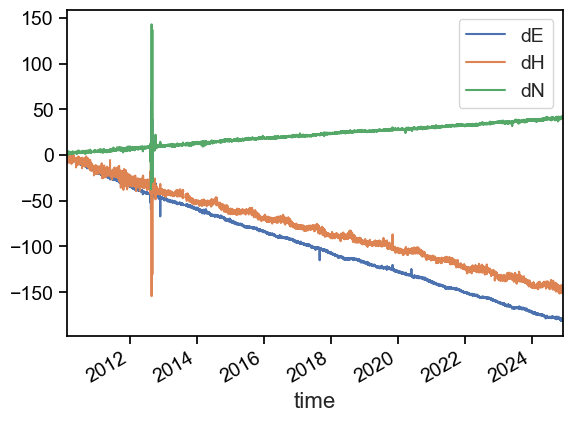

In [21]:
df.plot()

C:\Users\andregas\AppData\Local\Temp\ipykernel_5800\3571705774.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dN'] = outlier_remove(df['dN'])
C:\Users\andregas\AppData\Local\Temp\ipykernel_5800\3571705774.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dE'] = outlier_remove(df['dE'])
C:\Users\andregas\AppData\Local\Temp\ipykernel_5800\3571705774.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

<Axes: xlabel='time'>

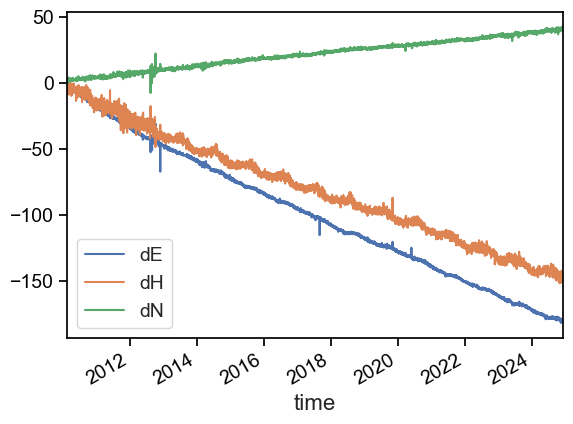

In [23]:
# coarse outlier removal with 3 std
def outlier_remove(data):
    upper_threshold = data.mean()+data.std()*3
    lower_threshold = data.mean()-data.std()*3
    data = data[(data >= lower_threshold) & (data <= upper_threshold)].dropna()
    return data
df['dN'] = outlier_remove(df['dN'])
df['dE'] = outlier_remove(df['dE'])
df['dH'] = outlier_remove(df['dH'])
df = df.dropna() # make sure all nans are gone before lowpass filter

df.plot()

In [25]:
df.head()

,dE,dH,dN
time,,,
2010-02-19 06:00:00,0.00,0.00,0.00
2010-02-19 18:00:00,-0.34,1.99,-0.03
2010-02-20 06:00:00,-0.20,0.50,0.53
2010-02-20 18:00:00,-0.34,0.61,0.41
2010-02-21 06:00:00,-0.08,1.69,0.53


In [ ]:
# savgol parameters
window_size = 2 # so that it is the same as 
poly_order = 3

def clean_lowpassfilt(file, colnmbr=0, name='Water table [m bgl]:'): # colnmbr is the column chosen to lowpass filter, name is wanted name for filtered column
    if isinstance(file,pd.DataFrame) == False:
        file = file.to_frame()
    file = file.resample('1D').median() # matching interval of cleaning parameters
    file = file.dropna()
    file['interpolated'] = file.iloc[:,colnmbr].interpolate(method='linear', limit_direction ='forward')
    # file['filt'] = butter_lowpass_filter(file.iloc[:,-1], cutoff, fs, order) # replace original by lowpass filtered
    file['filt'] = savgol_filter(file.iloc[:,-1], window_size, poly_order) # savitzky-golay filter
    # file['filt'] = file['filt'].rolling(window=window_mean, center=True).mean() # rolling mean
    file = file.dropna().reindex(file.index) # remove interpolated rows from df
    file = file.drop(file.columns[[0,1]], axis=1) # drop interpolated and original data column
    file.rename(columns={'filt':name}, inplace=True) # I call it the same as original if it was dependent on name in scripts lower down
    return file

data = 'dN'
df = df[data].dropna()
df = clean_lowpassfilt(df, colnmbr=0, name=f'{data}')

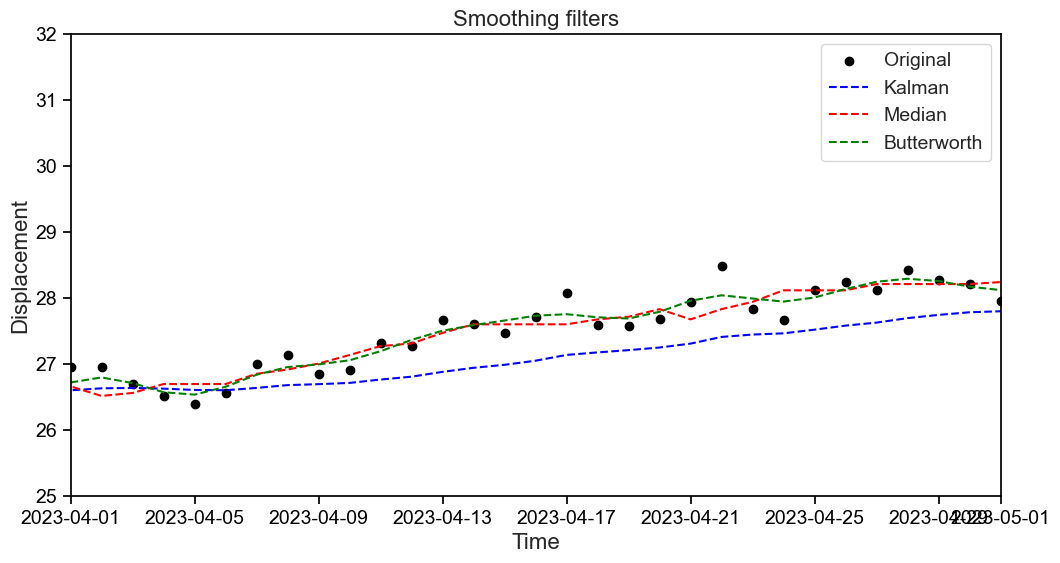

In [205]:
'''
Intro to timeseries analysis: https://www.youtube.com/watch?v=Prpu_U5tKkE
So when checkingfor autocorrelation and all this we end up with random signal = white noise
Statistical filters take percentage of points before and after and then mean/median it centered or something like this
Interested to understand the underlying characteristics of data!, not that interested in predicting.

# Testing Kalman filter vs median filter vs lowpass filter on GNSS and use what is best for both borehole and GNSS data
# Linear and non-linear smoothers. Low-pass filters are linear smoothers. Median filter is non-linear smoother function. Can do double smoother?
# see paper Vellman for signal recovery and stats on if it is a good smoother/filter, do r^2 of signal and observation to see recovery of signal
# https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/08-Designing-Kalman-Filters.ipynb
'''

### Kalman filter

from filterpy.kalman import KalmanFilter
from filterpy.common import Saver
from sklearn.model_selection import ParameterGrid

def ZeroOrderKF(R, Q, P):
    """ Create zero order Kalman filter.
    Specify R and Q as floats."""
    
    kf = KalmanFilter(dim_x=1, dim_z=1)
    kf.x = np.array([0.])
    kf.R *= R
    kf.Q *= Q
    kf.P *= P
    kf.F = np.eye(1)
    kf.H = np.eye(1)
    return kf

def filter_data(kf, zs):
    s = Saver(kf)
    kf.batch_filter(zs, saver=s)
    s.to_array()
    return s

def calculate_rmse(true_values, predicted_values):
    return np.sqrt(np.mean((true_values - predicted_values) ** 2))

# data
zs = df.loc[:,'dN'].dropna()

# coarse outlier removal with 3 std
upper_threshold = zs.mean()+zs.std()*3
lower_threshold = zs.mean()-zs.std()*3
zs = zs[(zs >= lower_threshold) & (zs <= upper_threshold)].dropna()

# adjust parameters based on performance
# over smoothing = too high Q, under smoothing = too high R, actually oposite!
# manually chosen parameters:

R = 25 # measurement noise, variance in measurements, if sd = 2 then set this parameter to 4
Q = 0.2 # process noise
P = 10 # initial uncertainty

# # Define the parameter grid
# param_grid = {
#     'R': [15, 25, 30],
#     'Q': [0.01, 0.1, 1],
#     'P': [10, 20, 50]
# }

# best_params = None
# best_rmse = float('inf')

# for params in ParameterGrid(param_grid):
#     kf = ZeroOrderKF(R=params['R'], Q=params['Q'], P=params['P'])
#     smoothed_data = filter_data(kf, zs)
#     rmse = calculate_rmse(zs, smoothed_data.x[:, 0])
#     if rmse < best_rmse:
#         best_rmse = rmse
#         best_params = params

# print("Best Parameters:", best_params)
# print("Best RMSE:", best_rmse)

# R = best_params['R']
# Q = best_params['Q']
# P = best_params['P']

# Apply the best parameters
kf = ZeroOrderKF(R=R, Q=Q, P=P)
kalman = filter_data(kf, zs)

### median filter

d = 3 # used two days first. Too noisy!
n = 2*d+1 # 2 rows per day, + 1 row (12h) due to odd numbers
median = medfilt(zs, kernel_size=n)

# butterworth filter

from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, order):
    data = data.values # values to filter
    nyq = 0.5 * fs # Nyquist Frequency, assumes regular time intervals
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low')
    y = filtfilt(b, a, data)
    return y

# low pass filter input
n = 3  # number of days cutoff
fs = 1 / 12  # sample rate in samples per hour (1 sample per 12 hours)
cutoff = 1 / (n * 24)  # cutoff frequency in cycles per hour
order = 2 # line from 1 to 0, second order is perfect function
# cutoff / nyq  # Must be more than 0 and less than 1 due to the resolution. For Boreholes we have 0.0833 

butter = butter_lowpass_filter(zs, cutoff, fs, order)

# smoothed spline issues with outliers..
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# remove wights of nans 
w = np.isnan(zs)
zs[w] = 0.

spl = UnivariateSpline(np.arange(len(zs)), zs, w=~w)
spl.set_smoothing_factor(len(zs)/16)
points = np.linspace(0, len(zs)-1, len(zs))
spline = spl(points)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(zs.index, zs.values, label='Original', color='black')
plt.plot(zs.index, kalman.x[:, 0], label='Kalman', linestyle='--', color='blue') # many nans for some reason..
plt.plot(zs.index, median, label='Median', linestyle='--', color='red')
plt.plot(zs.index, butter, label='Butterworth', linestyle='--', color='green')
# plt.plot(zs.index, spline, label='Univariate spline', linestyle='--', color='darkgray')
plt.legend()
plt.xlim(pd.Timestamp('2023-04-01'), pd.Timestamp('2023-05-01'))
plt.ylim(25,32)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Smoothing filters')
plt.show()

# I think I will try with low pass filter, butterworth with same parameters as for all other data, cutoff = 3 days. It looks to fit my data well so stick with it instead of the more complex Kalman filter

In [34]:
gps=ak_gnss.copy()
gps.set_index('time', inplace=True)
site = 'ak_'

gps_mask =gps['host']=='AK_GPS_4'
df = gps[gps_mask]

df = df[['dE','dH','dN']]
# # # massive outlier
# # df = df[(df > -1000) & (df < 1000)] 
df = subset(df)
df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_4.pkl')

gps_mask =gps['host']=='AK_GPS_5'
df = gps[gps_mask]

df = df[['dE','dH','dN']]
# # # massive outlier
# # df = df[(df > -1000) & (df < 1000)] 
df = subset(df)
df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_5.pkl')

In [9]:
gps=jett_gnss.copy()
gps.set_index('time', inplace=True)
site = 'jett_'
n = 11 # number of gnss at jettan in df
n =n-2 # column lenght

# GPS2, Stationary GPS above the back scarp
k=1 # gps2 column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_2.pkl')

# GPS3
k=2 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
# massive outlier
df = df[(df > -1000) & (df < 1000)] 
df = subset(df)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_3.pkl')

# GPS4
k=3 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']

df = subset(df)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_4.pkl')

# GPS5
k=4 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_5.pkl')

# GPS6
k=5 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_6.pkl')

# GPS7
k=6 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_7.pkl')

# GPS8
k=7 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_8.pkl')

# GPS9
k=8 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_9.pkl')

# GPS10
k=9 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_10.pkl')

# GPS11
k=10 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_11.pkl')

In [16]:
# some cleaning to be done on this data!! But how? Atle at Cautus recomended longer median filter window.

gps=gam_gnss.copy()
gps['time'] = pd.to_datetime(gps['time'], format='%Y-%m-%d %H:%M') #2015-09-08 19:00:00
gps.set_index('time', inplace=True)
site = 'gam_'
data = '2d' # for fixing resets
n = 10 # number of gnss at jettan in df
n =n-3 # column lenght    

# slicing dfs due to moving reference and ice on new reference antenna
set_startingpoint = '2020-10-01'
period = '2021-12-28', '2022-02-07'

# GPS3
k=1 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df, set_startingpoint=set_startingpoint, period=period)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_3.pkl')

# GPS4
k=2 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df, set_startingpoint=set_startingpoint, period=period)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_4.pkl')

# GPS5
k=3 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df, set_startingpoint=set_startingpoint, period=period)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_5.pkl')

# GPS6
k=4 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df, set_startingpoint=set_startingpoint, period=period)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_6.pkl')

# GPS7
k=5 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df, set_startingpoint=set_startingpoint, period=period)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_7.pkl')

# GPS8
k=6 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df, set_startingpoint=set_startingpoint, period=period)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_8.pkl')

# GPS9
k=7 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df, set_startingpoint=set_startingpoint, period=period)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_9.pkl')

# GPS10
k=8 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df, set_startingpoint=set_startingpoint, period=period)
# df = velocity(df)
df.to_pickle(f'pre_plotting/{site}gps_10.pkl')

In [16]:
## Testing!
gps=gam_gnss.copy()
gps['time'] = pd.to_datetime(gps['time'], format='%Y-%m-%d %H:%M') #2015-09-08 19:00:00
gps.set_index('time', inplace=True)
site = 'gam_'
data = '2d' # for fixing resets
n = 10 # number of gnss at jettan in df
n =n-3 # column lenght  

# slicing dfs due to moving reference and ice on new reference antenna
set_startingpoint = '2020-10-01'
period = '2021-12-28', '2022-02-07'

# GPS7
k=5 # column number
df =gps.iloc[:,[k-1, n+k, n+n+k+1]]
df.columns.values[[0,1,2]] = ['dE','dH','dN']
df = subset(df, set_startingpoint=set_startingpoint, period=period)

In [18]:
df.head()

,dE,dH,dN,2d,2d_azimuth
time,,,,,
2020-10-01 12:00:00,-198.61,-815.36,503.86,541.591019,338.486784
2020-10-02 00:00:00,-200.09,-817.92,504.11,542.367864,338.351014
2020-10-02 12:00:00,-198.85,-816.53,503.69,541.520949,338.456564
2020-10-03 00:00:00,-200.03,-815.05,503.33,541.620799,338.326473
2020-10-03 12:00:00,-198.93,-814.43,504.10,541.931688,338.464614


<Axes: xlabel='time'>

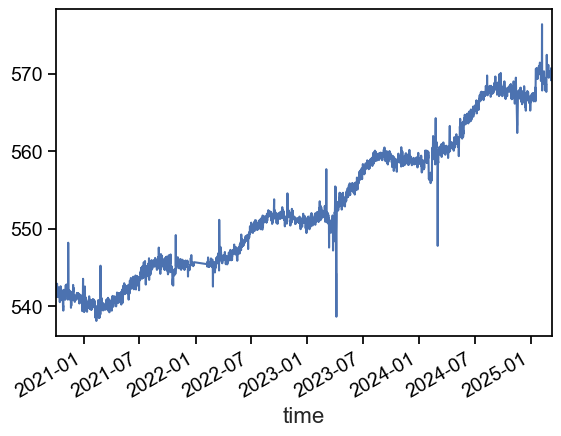

In [24]:
df.loc[:,'2d'].plot()

### Meteorological data

In [10]:
# DO LOWPASS FILTER ON MET DATA AS WELL!!

## seNorge meteorological data
path = 'processed_data\\'  # set folder related to script location
jtt_temp = pd.read_csv(path + 'Temp.csv', sep='\t', parse_dates=['datetime']) # Temp
jtt_precip = pd.read_csv(path + 'Precip.csv', sep='\t', parse_dates=['datetime']) # precip
jtt_snow = pd.read_csv(path + 'Snow.csv', sep='\t', parse_dates=['datetime']) # Snow
xgeo_precip = pd.read_csv(path + 'xgeo_precip.csv', sep='\t', parse_dates = ['datetime'])
xgeo_surfacerunnoff = pd.read_csv(path + 'xgeo_surfacerunnoff.csv', sep='\t', parse_dates = ['datetime'])
# xgeo_snowrainmelt = pd.read_csv(path + 'xgeo_rainsnowmelt.csv', sep='\t', parse_dates = ['datetime'])
xgeo_temp = pd.read_csv(path + 'xgeo_temp.csv', sep='\t', parse_dates = ['datetime'])
xgeo_snow = pd.read_csv(path + 'xgeo_snow.csv', sep='\t', parse_dates = ['datetime'])

JT_CLM_1_2 = pd.read_csv(path + 'JT_CLM_1_2.csv', sep='\t', parse_dates = ['datetime']) # old time series from 2007
ST = pd.read_csv(path + 'ST.csv', sep='\t', parse_dates = ['datetime'])
tlt2_temp = pd.read_csv(path + 'tlt2_temp.csv', sep='\t', parse_dates = ['datetime'])
tlt9_temp = pd.read_csv(path + 'tlt9_temp.csv', sep='\t', parse_dates = ['datetime'])
temp1 = pd.read_csv(path + 'Temp1.csv', sep='\t', parse_dates = ['datetime'])
hobos = pd.read_csv(path + 'hobos.csv', sep='\t', parse_dates = ['datetime'])

# river data measurements
river1 = pd.read_csv('Riverdata1.csv', sep=';', skiprows=1, parse_dates = ['Tidspunkt']) # manndalen bru
river1.rename(columns={'Tidspunkt': 'datetime'}, inplace=True)
river1['datetime'] = river1['datetime'].dt.tz_localize(None)

river2 = pd.read_csv('Riverdata1.csv', sep=';', skiprows=1, parse_dates = ['Tidspunkt']) # skibotn bru
river2.rename(columns={'Tidspunkt': 'datetime'}, inplace=True)
river2['datetime'] = river2['datetime'].dt.tz_localize(None)

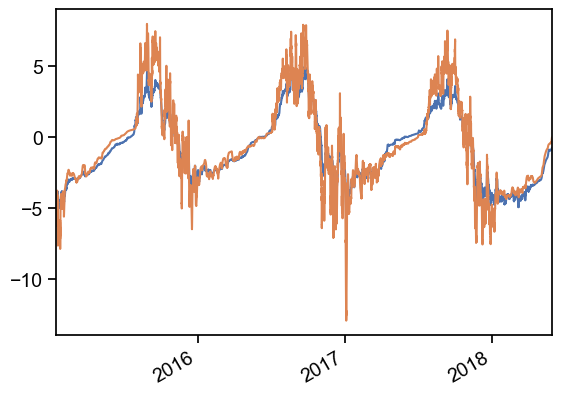

In [197]:
df = ST.copy()
df.set_index('datetime', inplace=True)
plot_df = df[((df.index > pd.Timestamp('2015-01-15')) & (df.index < pd.Timestamp('2024-01-15')))]
plt.plot(plot_df.index, plot_df.iloc[:,0])

plt.plot(plot_df.index, plot_df.iloc[:,1]) # Mye mer støy på denne
# plt.plot(plot_df.index, plot_df.iloc[:,2])

# df = xgeo_temp.copy()
# df.set_index('datetime', inplace=True)
# plot_df = df[((df.index > pd.Timestamp('2015-01-15')) & (df.index < pd.Timestamp('2024-01-15')))]
# plt.plot(plot_df.index, plot_df.iloc[:,0])

# Format the x-axis to show only years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Optionally rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()

In [195]:
ST.head()

,datetime,ST3,ST2,ST1
0,2013-09-17 12:00:00,7.77662,5.41196,13.13289
1,2013-09-17 13:00:00,7.99637,5.43573,13.17688
2,2013-09-17 14:00:00,7.74312,5.47287,13.36558
3,2013-09-17 15:00:00,7.85961,5.47584,13.46770
4,2013-09-17 16:00:00,7.88145,5.49515,13.52017


In [39]:
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, order):
    data = data.values # values to filter
    nyq = 0.5 * fs # Nyquist Frequency, assumes regular time intervals
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low')
    y = filtfilt(b, a, data)
    return y

C:\Users\andregas\AppData\Local\Temp\ipykernel_2108\2218830902.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df[f'butterfilt_{n}'] = butter_lowpass_filter(plot_df.loc[:,'interpolated'], 1/(24*n), fs, order) # EMA (lowpass filter)
C:\Users\andregas\AppData\Local\Temp\ipykernel_2108\2218830902.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df[f'butterfilt_{n}'] = butter_lowpass_filter(plot_df.loc[:,'interpolated'], 1/(24*n), fs, order) # EMA (lowpass filter)
C:\Users\andregas\AppData\Lo

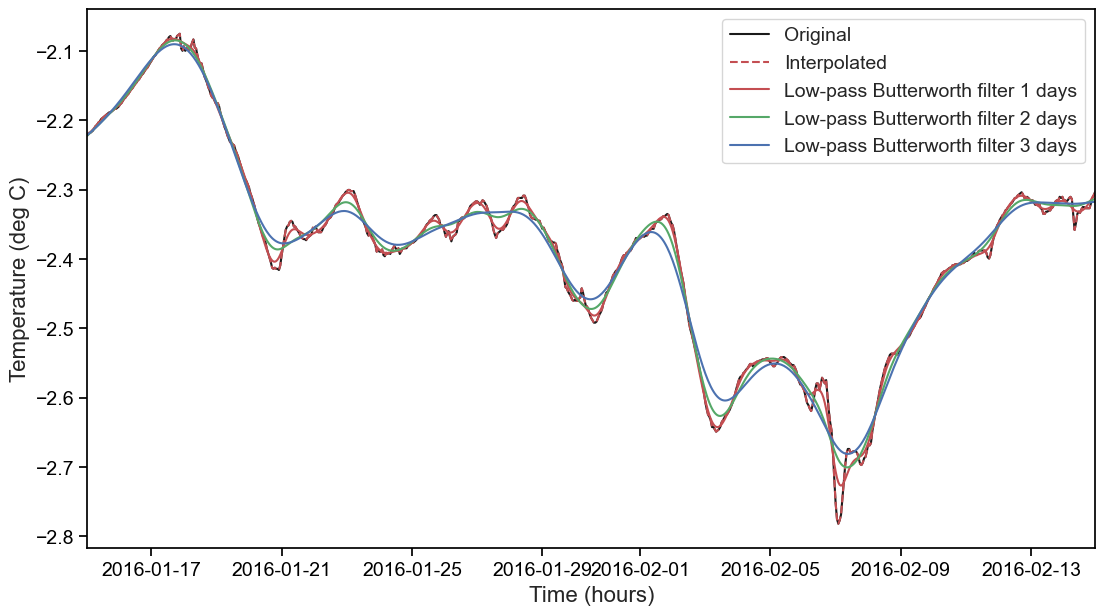

In [193]:
# concluding that the butterworth filter is not influenced by short term fluctuations (noise)

# I think either 1 or 3 day cut off

from statsmodels.graphics.regressionplots import abline_plot
from fractions import Fraction

# for the function
n = 1 # number of days cut off
fs = 1 # sample rate in hours 
cutoff = 1/(24*n) # 1/24 means cutoff at 1 day, but times nyquist frequncey so twice
order = 2 # line from 1 to 0, second order is perfect function

#### Data #####
file = ST.copy()
file.set_index('datetime', inplace=True)
file['interpolated'] = file.iloc[:,0].interpolate(method='linear', limit_direction ='forward') # 0 if first module, 1 if second module ++
################

# plotting                               
df = file.copy()
plot_df = df[((df.index > pd.Timestamp('2016-01-15')) & (df.index < pd.Timestamp('2016-02-15')))]

# plot_df_reg = plot_df.reset_index()
# mod = ols(formula = 'butterfilt ~ plot_df_reg.index', data = plot_df_reg) # model
# fit = mod.fit() # model fit
# regline = fit.params[0] + fit.params[1] * plot_df_reg.index

fig, ax = plt.subplots(figsize=(13,7))
ax.plot(plot_df.index, plot_df.iloc[:,0], color='k', label='Original')
ax.plot(plot_df.index, plot_df.loc[:,'interpolated'], color='r', linestyle='dashed', label='Interpolated')

n = 1 # number of days cut off
plot_df[f'butterfilt_{n}'] = butter_lowpass_filter(plot_df.loc[:,'interpolated'], 1/(24*n), fs, order) # EMA (lowpass filter)
ax.plot(plot_df.index, plot_df.loc[:,f'butterfilt_{n}'], color='r', label=f'Low-pass Butterworth filter {n} days')

n = 2 # number of days cut off
plot_df[f'butterfilt_{n}'] = butter_lowpass_filter(plot_df.loc[:,'interpolated'], 1/(24*n), fs, order) # EMA (lowpass filter)
ax.plot(plot_df.index, plot_df.loc[:,f'butterfilt_{n}'], color='g', label=f'Low-pass Butterworth filter {n} days')

n = 3 # number of days cut off
plot_df[f'butterfilt_{n}'] = butter_lowpass_filter(plot_df.loc[:,'interpolated'], 1/(24*n), fs, order) # EMA (lowpass filter)
ax.plot(plot_df.index, plot_df.loc[:,f'butterfilt_{n}'], color='b', label=f'Low-pass Butterworth filter {n} days')
                               
# sns.lineplot(x=plot_df.index, y=fit.fittedvalues, color='g', linestyle = (0,(5, 5)), ax=ax, label='linear fit' )
# abline_plot(model_results=mod.fit(), ax=ax)
# ax.plot(plot_df.index, regline, color='g', linestyle = (0,(5, 5)),label='Linear fit' )

# text boxes
# ax.text(pd.Timestamp('2021-03-01'), 37.95, f'fs = {fs} \ncutoff = 1/24 \norder = {order}', horizontalalignment='left', size='medium', color='r', fontsize=medium_size)
# ax.text(pd.Timestamp('2021-03-12'), 37.56, f'Average slope {fit.params[1]*24:.3f} mm/day \nY = {fit.params[0]:.3f} + {fit.params[1]:.3f} * X', horizontalalignment='left', size='medium', color='green', fontsize=large_size)
# ax.text(pd.Timestamp('2021-03-13'), 22.12, f'Y = {fit.params[0]:.3f} + {fit.params[1]:.3f} * X', horizontalalignment='left', size='medium', color='green', fontsize=medium_size)

ax.set_xlabel('Time (hours)')
ax.set_ylabel('Temperature (deg C)')
ax.legend() # fontsize=medium_size
plt.show()
# # saving
# path = 'plots\\'
# save_name = f'{path}validation_butterfilt_kh0118_cummulatedmodules.png'
# fig.savefig(save_name, dpi=300, bbox_inches='tight')

In [16]:
df = ST.copy()
# df['interpolated'] = df.loc[:,'ST3'].interpolate(method='linear', limit_direction ='forward') # 0 if first module, 1 if second module ++
# df['butterfilt_ST3'] = butter_lowpass_filter(df.loc[:,'interpolated'], cutoff, fs, order)
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df = df.set_index('datetime')
df.to_pickle('pre_plotting/ST.pkl')

In [16]:
# Quick fix to get met data for gammanjunni
path = '..\\Gamanjunni\\processed_data\\' 
gam_temp = pd.read_csv(path + 'Temp.csv', sep='\t', parse_dates=['datetime']) # Temp
df = gam_temp.copy()
df = df.groupby(df['datetime']).mean() # keeping mean as it looks to make sense when visually inspecting
# adding column to plot seasonality
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df.to_pickle('pre_plotting/gam_temp.pkl')

gam_precip = pd.read_csv(path + 'Precip.csv', sep='\t', parse_dates=['datetime']) # Precip
df = gam_precip.copy()
df = df.groupby(df['datetime']).max() # keeping mean as it looks to make sense when visually inspecting
# adding column to plot seasonality
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df.to_pickle('pre_plotting/gam_precip.pkl')

gam_snow = pd.read_csv(path + 'Snow.csv', sep='\t', parse_dates=['datetime']) # Snow
df = gam_snow.copy()
df = df.set_index('datetime')
# adding column to plot seasonality
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df.to_pickle('pre_plotting/gam_snow.pkl')

xgeo_precip = pd.read_csv(path + 'gam_xgeo_precip.csv', sep='\t', parse_dates = ['datetime'])
df = xgeo_precip.copy()
# #cleaning
# outlier_mask = (df['precip'] > 10000)  # no value larger than 
# df = df[~outlier_mask] # inverse of mask
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df = df.set_index('datetime')
df.to_pickle('pre_plotting/gam_xgeo_precip.pkl')

xgeo_temp = pd.read_csv(path + 'gam_xgeo_temp.csv', sep='\t', parse_dates = ['datetime'])
df = xgeo_temp.copy()
#cleaning temp
outlier_mask = (df['temperature'] > 50)  # temp not larger than 
df = df[~outlier_mask] # inverse of mask
outlier_mask = (df['temperature'] < -50)  # temp not lower than 
df = df[~outlier_mask] # inverse of mask
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df = df.set_index('datetime')
df.to_pickle('pre_plotting/gam_xgeo_temp.pkl')

xgeo_snow = pd.read_csv(path + 'gam_xgeo_snowdepth.csv', sep='\t', parse_dates = ['datetime'])
df = xgeo_snow
#cleaning snow
outlier_mask = (df['depth'] < 0)  #  no negative values
df = df[~outlier_mask] # inverse of mask
outlier_mask = (df['depth'] > 10000)  # no value larger than 
df = df[~outlier_mask] # inverse of mask
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df = df.set_index('datetime')
df.to_pickle('pre_plotting/gam_xgeo_snow.pkl')

xgeo_surfacerunnoff = pd.read_csv(path + 'gam_xgeo_surfacerunoff.csv', sep='\t', parse_dates = ['datetime'])
df = xgeo_surfacerunnoff.copy()
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
#cleaning df
outlier_mask = (df['surfacerunoff'] > 50)  # no value larger than 
df = df[~outlier_mask] # inverse of mask
df = df.set_index('datetime')
df.to_pickle('pre_plotting/gam_xgeo_surfacerunnoff.pkl')

# And for Jettan xgeo
path = 'processed_data\\'  # set folder related to script location
xgeo_precip = pd.read_csv(path + 'jett_xgeo_precip.csv', sep='\t', parse_dates = ['datetime'])
df = xgeo_precip.copy()
# #cleaning
# outlier_mask = (df['precip'] > 10000)  # no value larger than 
# df = df[~outlier_mask] # inverse of mask
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df = df.set_index('datetime')
df.to_pickle('pre_plotting/jett_xgeo_precip.pkl')

xgeo_temp = pd.read_csv(path + 'jett_xgeo_temp.csv', sep='\t', parse_dates = ['datetime'])
df = xgeo_temp.copy()
#cleaning temp
outlier_mask = (df['temperature'] > 50)  # temp not larger than 
df = df[~outlier_mask] # inverse of mask
outlier_mask = (df['temperature'] < -50)  # temp not lower than 
df = df[~outlier_mask] # inverse of mask
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df = df.set_index('datetime')
df.to_pickle('pre_plotting/jett_xgeo_temp.pkl')

xgeo_snow = pd.read_csv(path + 'jett_xgeo_snowdepth.csv', sep='\t', parse_dates = ['datetime'])
df = xgeo_snow
#cleaning snow
outlier_mask = (df['depth'] < 0)  #  no negative values
df = df[~outlier_mask] # inverse of mask
outlier_mask = (df['depth'] > 10000)  # no value larger than 
df = df[~outlier_mask] # inverse of mask
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df = df.set_index('datetime')
df.to_pickle('pre_plotting/jett_xgeo_snow.pkl')

xgeo_surfacerunnoff = pd.read_csv(path + 'jett_xgeo_surfacerunoff.csv', sep='\t', parse_dates = ['datetime'])
df = xgeo_surfacerunnoff.copy()
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
#cleaning df
outlier_mask = (df['surfacerunoff'] > 50)  # no value larger than 
df = df[~outlier_mask] # inverse of mask
df = df.set_index('datetime')
df.to_pickle('pre_plotting/jett_xgeo_surfacerunnoff.pkl')

In [6]:
# for the function
n = 3 # number of days cut off
fs = 1 # sample rate in hours 
cutoff = 1/(24*n) # 1/24 means cutoff at 1 day, but times nyquist frequncey so twice
order = 2 # line from 1 to 0, second order is the perfect function

df = jtt_temp.copy()
# df['interpolated'] = df.iloc[:,0].interpolate(method='linear', limit_direction ='forward') # 0 if first module, 1 if second module ++
# df['butterfilt'] = butter_lowpass_filter(df.loc[:,'interpolated'], cutoff, fs, order)
# duplicate datetime
df = df.groupby(df['datetime']).mean() # keeping mean as it looks to make sense when visually inspecting
# adding column to plot seasonality
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df.to_pickle('pre_plotting/jtt_temp.pkl')

df = jtt_precip.copy()
# duplicate datetime
df = df.groupby(df['datetime']).max() # keeping max as it looks to make sense when visually inspecting
# adding column to plot seasonality
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
# df = df.set_index('datetime')
df.to_pickle('pre_plotting/jtt_precip.pkl')

df = jtt_snow.copy()
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df = df.set_index('datetime')
df.to_pickle('pre_plotting/jtt_snow.pkl')

df = JT_CLM_1_2.copy() # hourly data
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df = df.set_index('datetime')
df.to_pickle('pre_plotting/JT_CLM_1_2.pkl')

df = temp1.copy()
df.iloc[:,1] = df.iloc[:,1].str.replace('°C', '') # remove celsius symbol
df.iloc[:,1] = pd.to_numeric(df.iloc[:,1]) # from object to numeric
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df = df.set_index('datetime')
df.to_pickle('pre_plotting/temp1.pkl')

df = hobos.copy()
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df = df.set_index('datetime')
df.to_pickle('pre_plotting/hobos.pkl')

df = tlt2_temp.copy()
# outliers
disp_mask = (df.iloc[:,1] < -30)  # remove all below 
df = df[~disp_mask] # inverse of mask
disp_mask = (df.iloc[:,1] > 38)
df = df[~disp_mask] # inverse of mask
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df = df.set_index('datetime')
df.to_pickle('pre_plotting/tlt2_temp.pkl')

df = tlt9_temp.copy()
# outliers
disp_mask = (df.iloc[:,1] < -30)  # remove all below 
df = df[~disp_mask] # inverse of mask
mask = df.datetime < pd.Timestamp('2023-11-28') # cut due to large errors in measurements
df = df[mask]
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df = df.set_index('datetime')
df.to_pickle('pre_plotting/tlt9_temp.pkl')

df = ST.copy()
# df['interpolated'] = df.loc[:,'ST3'].interpolate(method='linear', limit_direction ='forward') # 0 if first module, 1 if second module ++
# df['butterfilt_ST3'] = butter_lowpass_filter(df.loc[:,'interpolated'], cutoff, fs, order)
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df = df.set_index('datetime')
df.to_pickle('pre_plotting/ST.pkl')

df = river1.copy()
# df['interpolated'] = df.loc[:,'ST3'].interpolate(method='linear', limit_direction ='forward') # 0 if first module, 1 if second module ++
# df['butterfilt_ST3'] = butter_lowpass_filter(df.loc[:,'interpolated'], cutoff, fs, order)
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df.loc[:,df.columns[1]] = df.loc[:,df.columns[1]].astype(str)
df.loc[:, df.columns[1]] = df.loc[:, df.columns[1]].str.strip()
df.loc[:,df.columns[1]] = df.loc[:,df.columns[1]].str.replace(',', '.')
df.loc[:,df.columns[1]] = pd.to_numeric(df.loc[:,df.columns[1]], errors='coerce')
df = df.set_index('datetime')
df.to_pickle('pre_plotting/river1.pkl')

df = river2.copy()
# df['interpolated'] = df.loc[:,'ST3'].interpolate(method='linear', limit_direction ='forward') # 0 if first module, 1 if second module ++
# df['butterfilt_ST3'] = butter_lowpass_filter(df.loc[:,'interpolated'], cutoff, fs, order)
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df.loc[:,df.columns[1]] = df.loc[:,df.columns[1]].astype(str)
df.loc[:, df.columns[1]] = df.loc[:, df.columns[1]].str.strip()
df.loc[:,df.columns[1]] = df.loc[:,df.columns[1]].str.replace(',', '.')
df.loc[:,df.columns[1]] = pd.to_numeric(df.loc[:,df.columns[1]], errors='coerce') # should change non numeric to nans
df.loc[:,df.columns[1]].dropna(inplace=True)
df = df.set_index('datetime')
df.to_pickle('pre_plotting/river2.pkl')

In [59]:
# XGEO Jettan

ss_precip = xgeo_precip[['datetime', 'precip']]  # hourly data

#cleaning
file = ss_precip
outlier_mask = (file['precip'] > 10000)  # no value larger than 
file = file[~outlier_mask] # inverse of mask
ss_precip = file.copy()

# adding column to plot seasonality
ss_precip['year'] = ss_precip['datetime'].dt.year
ss_precip['month'] = ss_precip['datetime'].dt.month
ss_precip['day'] = ss_precip['datetime'].dt.day

ss_precip = ss_precip.set_index('datetime')

ss_precip.to_pickle('pre_plotting/xgeo_precip.pkl')

# masking
ss_temp = xgeo_temp.copy()

# adding column to plot seasonality
ss_temp['year'] = ss_temp['datetime'].dt.year
ss_temp['month'] = ss_temp['datetime'].dt.month
ss_temp['day'] = ss_temp['datetime'].dt.day

ss_temp = ss_temp.set_index('datetime')

#cleaning temp
file = ss_temp
outlier_mask = (file['temperature'] > 40)  # temp not larger than 
file = file[~outlier_mask] # inverse of mask
outlier_mask = (file['temperature'] < -30)  # temp not lower than 
file = file[~outlier_mask] # inverse of mask
ss_temp = file.copy()

# ss_temp_air['temp_medfilt'] = medfilt(ss_temp_air['temperature'], kernel_size=7) #6 hour

# ss_temp_air = ss_temp_air.resample('1H').mean()

ss_temp.to_pickle('pre_plotting/xgeo_temp.pkl')

# masking
ss_snow = xgeo_snow.copy()
# adding column to plot seasonality
ss_snow['year'] = ss_snow['datetime'].dt.year
ss_snow['month'] = ss_snow['datetime'].dt.month
ss_snow['day'] = ss_snow['datetime'].dt.day

ss_snow = ss_snow.set_index('datetime')

#cleaning snow
file = ss_snow
outlier_mask = (file['depth'] < 0)  #  no negative values
file = file[~outlier_mask] # inverse of mask
outlier_mask = (file['depth'] > 10000)  # no value larger than 
file = file[~outlier_mask] # inverse of mask
ss_snow = file.copy()

ss_snow.to_pickle('pre_plotting/xgeo_snow.pkl')

df = xgeo_surfacerunnoff[['datetime', 'surfacerunoff']]  # hourly data
# adding column to plot seasonality
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

#cleaning df
outlier_mask = (df['surfacerunoff'] > 50)  # no value larger than 
df = df[~outlier_mask] # inverse of mask

df = df.set_index('datetime')

df.to_pickle('pre_plotting/xgeo_surfacerunnoff.pkl')

<Axes: xlabel='datetime'>

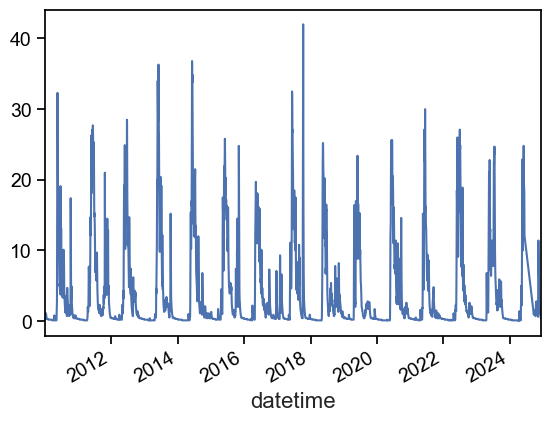

In [34]:
df.loc[:,'surfacerunoff'].plot()

In [37]:
# XGEO Åknes
site = 'ak_'

ss_precip = ak_rain[['datetime', 'rain']]  # hourly data

#cleaning
file = ss_precip
outlier_mask = (file['rain'] > 10000)  # not larger than 
file = file[~outlier_mask] # inverse of mask
ss_precip = file.copy()

# adding column to plot seasonality
ss_precip['year'] = ss_precip['datetime'].dt.year
ss_precip['month'] = ss_precip['datetime'].dt.month
ss_precip['day'] = ss_precip['datetime'].dt.day

ss_precip = ss_precip.set_index('datetime')

ss_precip.to_pickle(f'pre_plotting/{site}xgeo_rain.pkl')

# masking
ss_temp = ak_temp.copy()

# adding column to plot seasonality
ss_temp['year'] = ss_temp['datetime'].dt.year
ss_temp['month'] = ss_temp['datetime'].dt.month
ss_temp['day'] = ss_temp['datetime'].dt.day

ss_temp = ss_temp.set_index('datetime')

#cleaning temp
file = ss_temp
outlier_mask = (file['temperature'] > 40)  # temp not larger than 
file = file[~outlier_mask] # inverse of mask
outlier_mask = (file['temperature'] < -30)  # temp not lower than 
file = file[~outlier_mask] # inverse of mask
ss_temp = file.copy()

# ss_temp_air['temp_medfilt'] = medfilt(ss_temp_air['temperature'], kernel_size=7) #6 hour

# ss_temp_air = ss_temp_air.resample('1H').mean()

ss_temp.to_pickle(f'pre_plotting/{site}xgeo_temp.pkl')

# masking
ss_snow = ak_snow.copy()
# adding column to plot seasonality
ss_snow['year'] = ss_snow['datetime'].dt.year
ss_snow['month'] = ss_snow['datetime'].dt.month
ss_snow['day'] = ss_snow['datetime'].dt.day

ss_snow = ss_snow.set_index('datetime')

#cleaning snow
file = ss_snow
outlier_mask = (file['depth'] < 0)  #  no negative values
file = file[~outlier_mask] # inverse of mask
ss_snow = file.copy()

ss_snow.to_pickle(f'pre_plotting/{site}xgeo_snow.pkl')

# masking
ss_snow = ak_snowrain_melt.copy()
# adding column to plot seasonality
ss_snow['year'] = ss_snow['datetime'].dt.year
ss_snow['month'] = ss_snow['datetime'].dt.month
ss_snow['day'] = ss_snow['datetime'].dt.day

ss_snow = ss_snow.set_index('datetime')

#cleaning snow
file = ss_snow
# outlier_mask = (file['depth'] < 0)  #  no negative values
# file = file[~outlier_mask] # inverse of mask
ss_snow = file.copy()

ss_snow.to_pickle(f'pre_plotting/{site}xgeo_snowrain_melt.pkl')